# Project 2: Ames Housing Data and Kaggle Challenge
> By: Matthew Lio
---


Project notebook organisation:

- 01. EDA (current notebook)
- 02. Preprocessing and Feature Engineering
- 03. Model Tuning and Insights

# 01. EDA
---

## Introduction and Problem Statement

This project examines a housing dataset from Ames, a city in Story County, Iowa, in United States ([source](https://en.wikipedia.org/wiki/Ames,_Iowa)). Often times, it is difficult for real estate agents to predict a price for home owners looking to sell their houses. This is especially so for the houses in United States in general, as there are numerous features that need to be considered. On the other hand, people looking to buy houses want the best house they can afford, yet do not have a reliable way to consider all the factors versus their budget. Investors also need a reliable way to know what kind of features they should look out for a good investment. This project aims to predict the selling prices of houses to address these concerns.

- Which features increase or decrease the value of a house?
- What are some features homeowners can add or improve on to increase the value of their house?
- What features should investors look out for when buying a house for investment?

To predict the selling prices of houses in Ames as accurately as possible, all features will be examined in depth for houses previously sold. Different plots will be used to find out these features correlation with sale price. Those that influenced previous sale prices the most will go through a feature selection process, which would shape the final production model that would be able to accurately predict future selling prices for houses in Ames.

This project is split into 3 notebooks:
- Exploratory Data Analysis
- Preprocessing and Feature Engineering
- Model Tuning and Insights

### Contents:
- [Executive Summary](#Executive-Summary)
- [Library Imports](#Library-Imports)
- [Data import and first look](#Data-import-and-first-look)
- [Functions](#Functions)
- [General House Features](#General-House-Features)
- [Lot and Land Features](#Lot-and-Land-Features)
- [Surrounding Features](#Surrounding-Features)
- [Outer Features](#Outer-Features)
- [Inner Above Grade Features](#Inner-Above-Grade-Features)
- [Basement Features](#Basement-Features)
- [Garage Features](#Garage-Features)
- [Deck and Porch Features](#Deck-and-Porch-Features)
- [Utility Features](#Utility-Features)
- [Extra and Misc Features](#Extra-and-Misc-Features)
- [Date Features](#Date-Features)
- [Sale Price and Type](#Sale-Price-and-Type)
- [Checking for Collinearity](#Checking-for-Collinearity)
- [Final Dataframe](#Final-Dataframe)

## Executive Summary

Our Linear Regression model, scaled with Standard Scaler, had the best predictive performance on housing sale price in Ames, out-performing Ridge and Lasso regression models. We also used Lasso regression to help us feature select the features that affect sale price the most.

From the above coefficient summary table, the top 5 features that determine the sale price are the size (living, basement and total lot area) and quality (overall and external quality) of the house. Neighborhood of the house comes in at a close 6th place. Other important features that affect sale prices include garage and porches areas, and quality of kitchen, basement and garage. In order to maintain the value of a house, quality is very important.

For home-seekers with specific budget, this model tells them what features they need to consider to be able to afford a house. Houses that are smaller in living, basement and lot areas might be ideal for them. They might also need to settle for an older house, at a less desirable neighborhood. They could also look at houses with lesser masonry veneer area.

For investors looking to invest in a house, they should take a look at the top 3 most desirable neighborhoods like Stone Brook, Northridge heights and Northridge. They have the potential to sell for high prices. In order to buy for lower prices and sell high, they could look for houses with little to no masonry veneer, and small porch areas. They could then improve the value of their house by installing those features themselves, installing masonry veneers and building porches. They should also consider selling their house as soon as they can, as the value decreases the older a house is. Lastly, they should maintain the quality of their house as much as possible.

This model is not without its disadvantages. As the model was developed based on data on houses sold between 2006 - 2010 in Ames, the small time frame limits the annual patterns in sale price that could arise from external factors, like economy or policy changes. The sale prices most likely were not adjusted based on inflation, which could have given us a variation in price through the years. Right now at the beginning of 2022, after 12 years, this model may not be as accurate present day. To improve the applicability of the model, we need to consider more data from a wider time frame.

In reality, house prices are difficult to predict as it may also be affected by factors hard to include in a dataset, for example like buyer's or seller's psychology, how everyone place different emphasis on different features, and also the economic climate. This model therefore does not give perfect predictions, but should rather be used as just a guide for a more informed decision.

## Library Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import patsy

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.dummy import DummyRegressor
from scipy.stats.mstats import winsorize

import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('fivethirtyeight')

# %config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

## Data import and first look

In [2]:
train = pd.read_csv('../datasets/train.csv')

In [3]:
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
# make columns lowercase and replacing spaces with underscores
train.columns = train.columns.str.lower()
train.columns = train.columns.str.replace(' ', '_')

In [6]:
# check to see if successfully lowercased and replaced
train.head(1)

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   

  lot_shape land_contour utilities lot_config land_slope neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            GLQ         533.0            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0           0.0        192.0          725.0    GasA         Ex           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      SBrkr         725         754                0         1479   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0             0.0          2          1              3   

   kitchen_abvgr kitchen_qual  totrms_abvgrd functional  fireplaces  \
0              1           Gd              6        Typ           0   

  fireplace_qu garage_type  garage_yr_blt garage_finish  garage_cars  \
0          NaN      Attchd         1976.0           RFn          2.0   

   garage_area garage_qual garage_cond paved_drive  wood_deck_sf  \
0        475.0          TA          TA           Y             0   

   open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area pool_qc  \
0             44               0           0             0          0     NaN   

  fence misc_feature  misc_val  mo_sold  yr_sold sale_type  saleprice  
0   NaN          NaN         0        3     2010       WD      130500

### Summary Statistics ([data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt))

The 2051 houses recorded in this dataset were built from 1872 to 2010. The transactions recorded were from 2006 to 2010.

Firstly, let us take a look at the sale price we are dealing with. The average price (`saleprice`) for the houses sold in this period was \\$181470 (presumably in USD), with standard deviation (SD) of $7926. The cheapest house sold was \\$12789, while the most expensive was \\$611657.

Next, we look at the areas of different parts of the property as well as number of rooms.

The average lot area (`lot_area`), or total area of the property, was 10,065 square feet (sf), with SD of 6742 sf. The smallest property area was 1300 sf, while the largest property area was 159,000 sf.

The average living area (`gr_liv_area`) was 1499 sf, with SD of 500 sf. The smallest house had 334 sf and the largest had 5642 sf. More than 50% of houses did not have a second floor, as shown in the 50% percentile.

The mean total basement area (`total_bsmt_sf`) was 1058 sf, with SD of 449 sf. However, the mean is affected by houses with no basement, represented as 0 sf. The largest basement was 6110 sf.

The average garage area (`garage_area`) was 474 sf, with SD of 216. Again, the mean is affected by houses with no garage represented as 0 sf. The largest garage was 1418 sf.

The average total number of rooms in a house (`totrms_abvgrd`) was 6.44. The smallest house had 2 rooms, while the largest had 15.

In [7]:
train.describe().T

count          mean           std          min          25%  \
id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
pid              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
ms_subclass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
lot_frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
lot_area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
overall_qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
overall_cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
year_built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
year_remod/add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
mas_vnr_area     2029.0  9.969591e+01  1.749631e+02          0.0          0.0   
bsmtfin_sf_1     2050.0  4.423005e+02  4.612041e+02          0.0          0.0   
bsmtfin_sf_2     2050.0  4.795902e+01  1.650009e+02          0.0          0.0   
bsmt_unf_sf      2050.0  5.677283e+02  4.449548e+02          0.0        220.0   
total_bsmt_sf    2050.0  1.057988e+03  4.494107e+02          0.0        793.0   
1st_flr_sf       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd_flr_sf       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
low_qual_fin_sf  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
gr_liv_area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
bsmt_full_bath   2049.0  4.275256e-01  5.226732e-01          0.0          0.0   
bsmt_half_bath   2049.0  6.344558e-02  2.517052e-01          0.0          0.0   
full_bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
half_bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
bedroom_abvgr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
kitchen_abvgr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
totrms_abvgrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
garage_yr_blt    1937.0  1.978708e+03  2.544109e+01       1895.0       1961.0   
garage_cars      2050.0  1.776585e+00  7.645374e-01          0.0          1.0   
garage_area      2050.0  4.736717e+02  2.159346e+02          0.0        319.0   
wood_deck_sf     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
open_porch_sf    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
enclosed_porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3ssn_porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
screen_porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
pool_area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
misc_val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
mo_sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
yr_sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
saleprice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%           75%          max  
id                    1486.0  2.198000e+03       2930.0  
pid              535453200.0  9.071801e+08  924152030.0  
ms_subclass             50.0  7.000000e+01        190.0  
lot_frontage            68.0  8.000000e+01        313.0  
lot_area              9430.0  1.151350e+04     159000.0  
overall_qual             6.0  7.000000e+00         10.0  
overall_cond             5.0  6.000000e+00          9.0  
year_built            1974.0  2.001000e+03       2010.0  
year_remod/add        1993.0  2.004000e+03       2010.0  
mas_vnr_area             0.0  1.610000e+02       1600.0  
bsmtfin_sf_1           368.0  7.337500e+02       5644.0  
bsmtfin_sf_2             0.0  0.000000e+00       1474.0  
bsmt_unf_sf            

### Null values

There are 26 columns with null values. With reference to the data dictionary, some of the null values for categorical columns with unique values most likely represent houses without those features (e.g. no basement, garage or fireplace). Some of these null values correspond to numerical columns showing the area of those features, like houses without masonry veneer also have null values for masonry veneer area.

We will further explore the data to see what we can fill these null values with.

In [8]:
# showing null value counts and percentage of null values for each column
nulldf = pd.DataFrame(train.isnull().sum(), columns = ['null_count'])
nulldf['null_pct'] = train.isnull().sum()/2051*100
nulldf = nulldf[nulldf['null_count'] != 0]

print(nulldf.shape)
nulldf

(26, 2)


null_count   null_pct
lot_frontage           330  16.089712
alley                 1911  93.174061
mas_vnr_type            22   1.072647
mas_vnr_area            22   1.072647
bsmt_qual               55   2.681619
bsmt_cond               55   2.681619
bsmt_exposure           58   2.827889
bsmtfin_type_1          55   2.681619
bsmtfin_sf_1             1   0.048757
bsmtfin_type_2          56   2.730375
bsmtfin_sf_2             1   0.048757
bsmt_unf_sf              1   0.048757
total_bsmt_sf            1   0.048757
bsmt_full_bath           2   0.097513
bsmt_half_bath           2   0.097513
fireplace_qu          1000  48.756704
garage_type            113   5.509508
garage_yr_blt          114   5.558264
garage_finish          114   5.558264
garage_cars              1   0.048757
garage_area              1   0.048757
garage_qual            114   5.558264
garage_cond            114   5.558264
pool_qc               2042  99.561190
fence                 1651  80.497318
misc_feature          1986  96.830814

### Sale Price

Since sale price is the value we want to predict, let us take a quick look at it first.

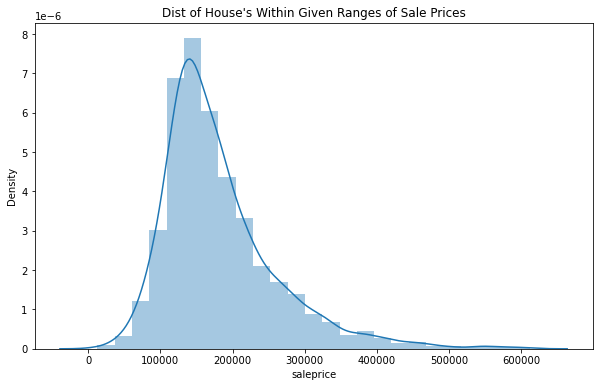

In [9]:
# histogram of saleprice
plt.figure(figsize=(10,6))
sns.distplot(train['saleprice'], bins = 25)
plt.title('Dist of House\'s Within Given Ranges of Sale Prices');

The distribution of sale price is right skewed and cannot be negative. We would likely improve the model if we use log(saleprice) to create a more normal distribution.

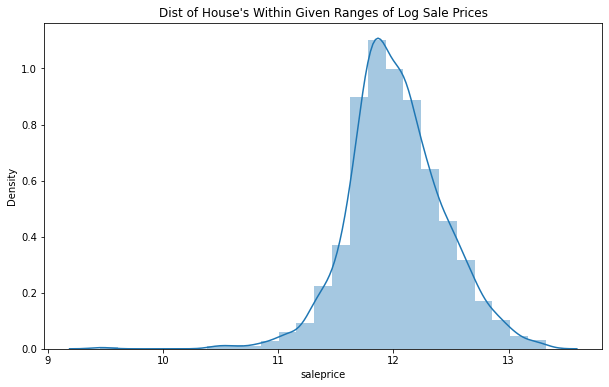

In [10]:
# histogram of saleprice
plt.figure(figsize=(10,6))
sns.distplot(np.log(train['saleprice']), bins = 25)
plt.title('Dist of House\'s Within Given Ranges of Log Sale Prices');

Sale price looks more left skewed now, thus we will use original saleprice and not change.

## Functions

In [11]:
# function to plot histogram, boxplot and scatterplot for all numerical variables
def numeric_col_plots(df, col_list):
    nrows = len(col_list)
    fig, ax = plt.subplots(nrows = nrows, ncols = 3, figsize=(20, nrows*5))
    ax = ax.ravel()
    for i, col in enumerate(col_list):
        sns.distplot(df[col], ax = ax[i*3-3], fit = stats.norm)
        ax[i*3-3].set_title(f'{col} distribution',fontsize=14)
        ax[i*3-3].tick_params(labelsize=12)
        ax[i*3-3].set_xlabel(col, fontsize=14)
        
        sns.boxplot(df[col], width = 0.2, ax = ax[i*3-2])
        ax[i*3-2].set_title(f'{col} boxplot',fontsize=14)
        ax[i*3-2].tick_params(labelsize=12)
        ax[i*3-2].set_xlabel(col, fontsize=14)
        
        sns.regplot(data=df, x=df[col], y=df['saleprice'],ax = ax[i*3-1],
                    scatter_kws={'edgecolor':'white'}, line_kws = {'color':'grey'})
        ax[i*3-1].set_title(f'{col} vs saleprice', fontsize=14)
        ax[i*3-1].tick_params(labelsize=12)
        ax[i*3-1].set_xlabel(col, fontsize=14)
        
    plt.tight_layout()

In [12]:
# function to plot histogram and boxplot for all categorical variables
def categorical_col_plots(df, col_list):
    nrows = len(col_list)
    fig, ax = plt.subplots(nrows = nrows, ncols = 2, figsize=(20, nrows*5))
    ax = ax.ravel()
    for i, col in enumerate(col_list):
        sns.histplot(df[col], ax = ax[i*2-2])
        ax[i*2-2].set_title(f'{col} distribution',fontsize=14)
        ax[i*2-2].tick_params(labelsize=12)
        ax[i*2-2].set_xlabel(col, fontsize=14)
        
        sns.boxplot(x = df[col], y = df['saleprice'], ax = ax[i*2-1])
        ax[i*2-1].set_title(f'{col} vs saleprice',fontsize=14)
        ax[i*2-1].tick_params(labelsize=12)
        ax[i*2-1].set_xlabel(col, fontsize=14)
        
    plt.tight_layout()

In [13]:
# function to plot the correlation between all features
def heatmap_all_cols(df, width=18, height=16):
    mask = np.zeros_like(df.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True

    f, ax = plt.subplots(figsize=(width, height))
    sns.heatmap(df.corr(),
                mask = mask,
                square=True,
                linewidth=0.1,
                cbar_kws = {'shrink':0.5},
                cmap=sns.color_palette("RdBu_r", 7),
                annot = True,
                vmin = -1, vmax = 1)
    ax.tick_params(labelsize=12)
    plt.tight_layout()

In [14]:
# function to plot correlation of selected features
def heatmap_small(df, cols, width = 5, height = 4):
    plt.figure(figsize=(width,height))
    mask = np.zeros_like(df[cols].corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(df[cols].corr(), annot=True, cmap = 'coolwarm', 
                mask = mask, vmin=-1, vmax=1);

In [15]:
# function for dropping columns
def drop_col(df, cols_to_drop):
    df.drop(cols_to_drop, axis = 1, inplace = True)

In [16]:
# function for converting numerical to categorical
def convert_to_categorical(df, cols_to_convert):
    for i in cols_to_convert:
        df[i] = df[i].astype(str)

In [17]:
# function for converting ordinal categorical to ordinal numeric
def to_ordinal_numeric(df, colname, dictionary):
    df[colname] = df[colname].map(dictionary)

In [18]:
# function for filling null values with 'None'
def fill_null_w_none(df, obj_cols):
    for col in obj_cols:
        df[col] = df[col].fillna('None')

In [19]:
# function for filling null values with 0
def fill_null_w_zero(df, num_cols):
    for col in num_cols:
        df[col] = df[col].fillna(0)

In [20]:
# function to dummify values in a feature for an in-depth analysis of value/sale price correlation
def dummify(df, col):
    dummy = pd.get_dummies(df[col])
    dummy_df = pd.DataFrame(dummy)
    dummy_df['saleprice'] = train['saleprice']
    return dummy_df

## General House Features

- `id`
- `pid`
- `ms_subclass`
- `ms_zoning`
- `bldg_type`
- `house_style`
- `overall_qual`
- `overall_cond`
- `functional`

### `id`

**`id`** (int64, discrete): Observation number or ID number for the houses. We will be keeping this column for house identification.

### `pid`

**`pid`** (int64, nominal): This column is unnecessary to our analysis, as they are merely parcel identification numbers for the houses, and will not affect the sale price of the houses.

In [21]:
drop_col(train, ['pid'])

### `ms_subclass`

**`ms_subclass`** (int64, but should be object): A housing classification column that categorizes houses by type. Each numeric variable stands for a specific type of housing. This column would be more suitable as an object data type instead of int64, as it is considered categorical.

In [22]:
to_cat = ['ms_subclass']

convert_to_categorical(train, to_cat)

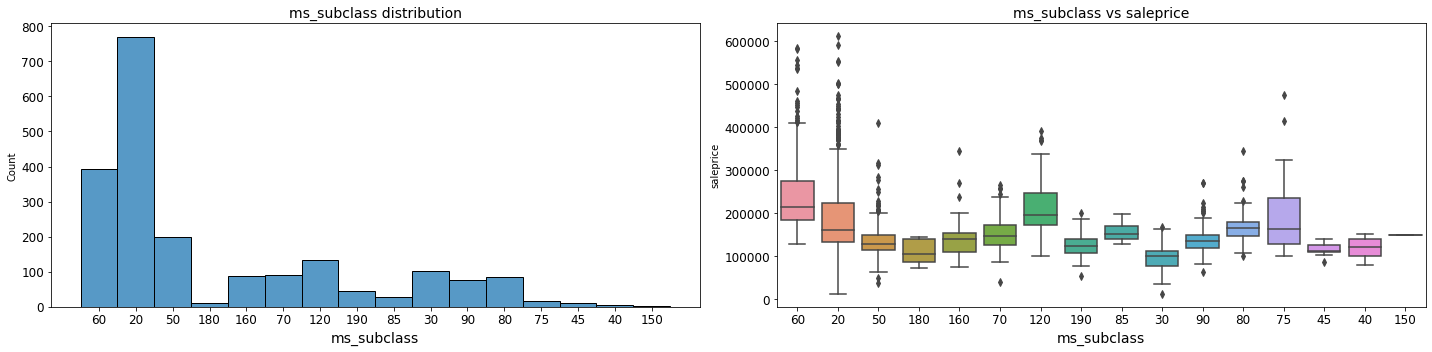

In [23]:
categorical_col_plots(train, ['ms_subclass'])

Most of the houses are in the "20" subclass. Let us see the correlation of each value with sale price. To do that, we will be creating a dataframe of dummies and plotting a heatmap.

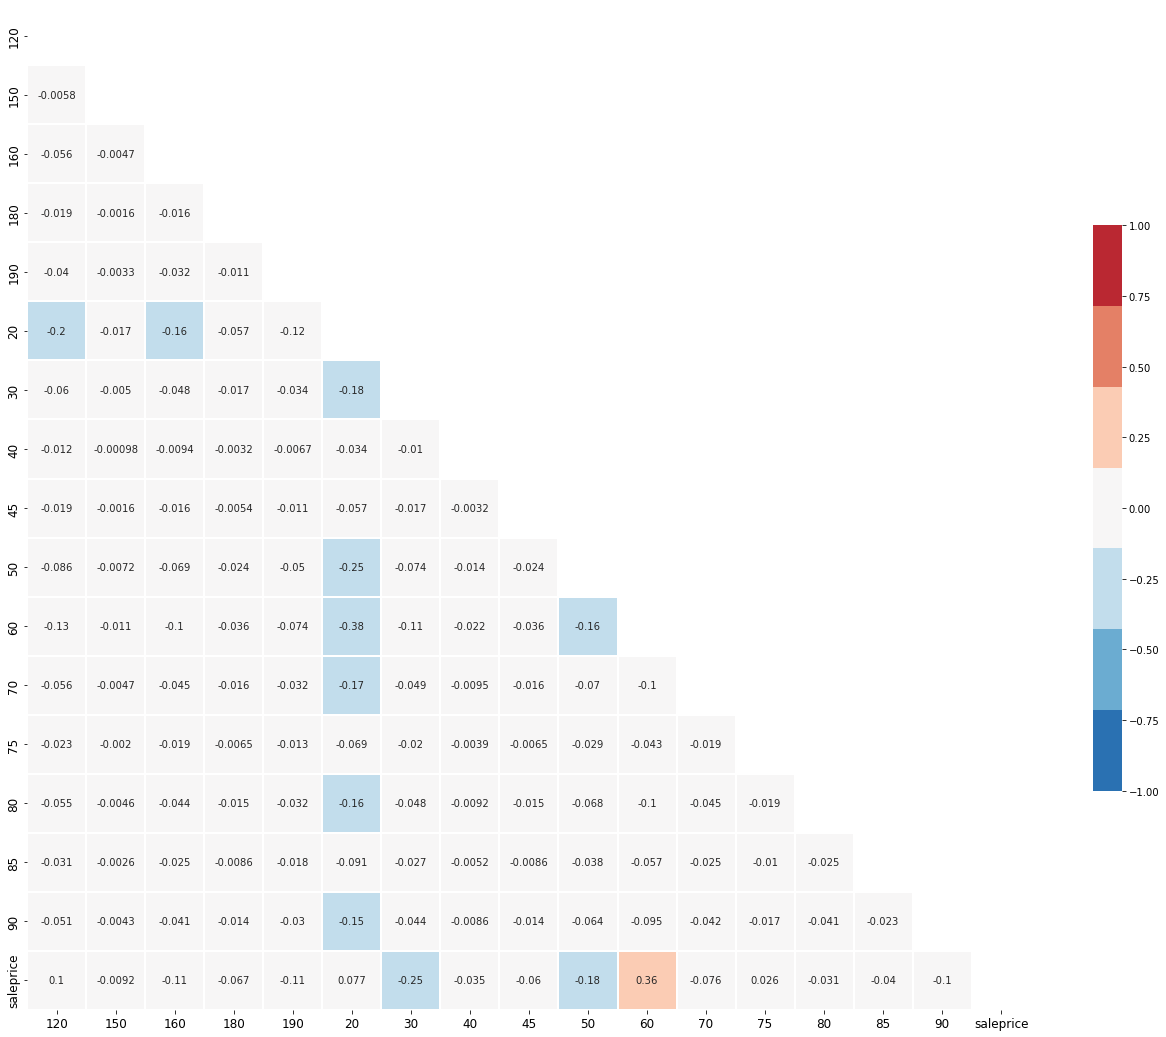

In [24]:
heatmap_all_cols(dummify(train, 'ms_subclass'))

None of the values seemed to have a good correlation with sale price. With such weak correlation to sale price, we will not include this column in our model.

In [25]:
drop_col(train, ['ms_subclass'])

### `ms_zoning`

**`ms_zoning`** (object, nominal): A categorical column that identifies the general zoning classification of the houses.

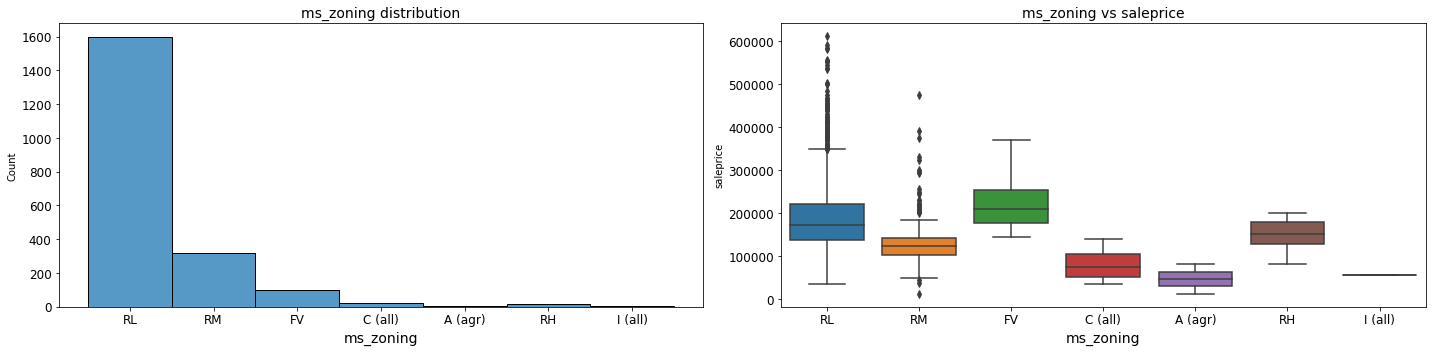

In [26]:
categorical_col_plots(train, ['ms_zoning'])

There is clear differentiation between zone categorizations vs sale price. Let us dummify each value and see how they correlate with sale price.

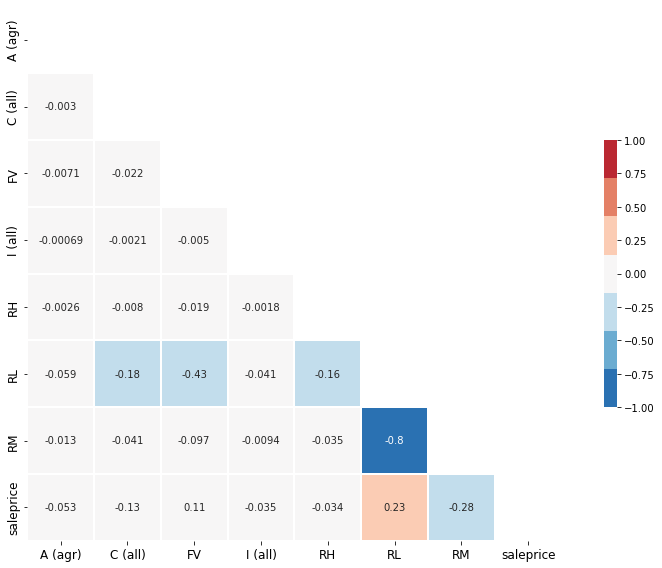

In [27]:
heatmap_all_cols(dummify(train, 'ms_zoning'), width = 12, height = 8)

Most of the values do not have a good correlation with sale price. With such weak correlation to sale price, we will not include this column in our model.

In [28]:
drop_col(train, ['ms_zoning'])

### `bldg_type`

**`bldg_type`** (object, nominal): Type of dwelling.

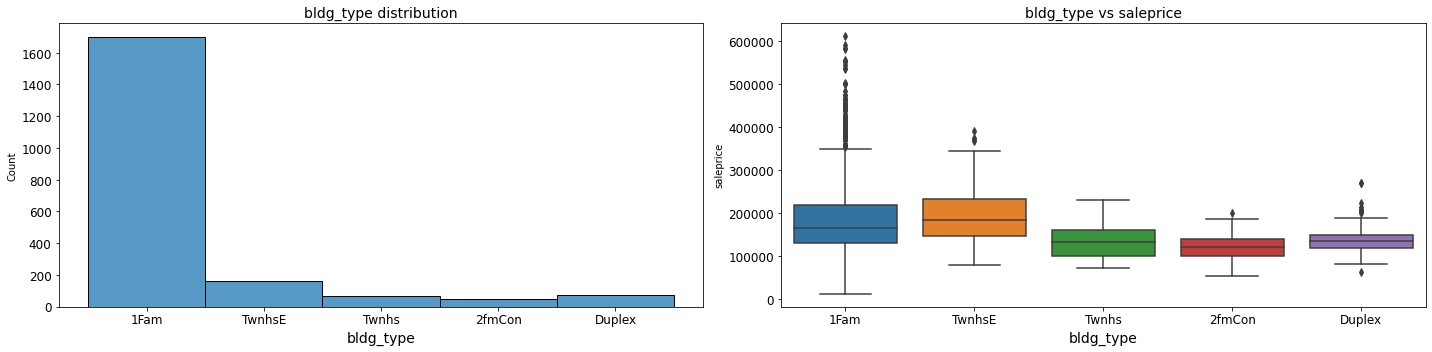

In [29]:
categorical_col_plots(train, ['bldg_type'])

Most houses are of a single value. Let us check how the individual values correlate with sale price.

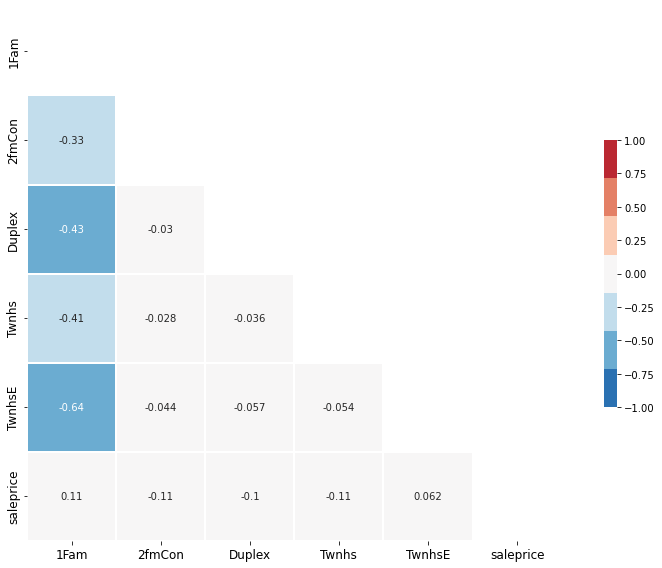

In [30]:
heatmap_all_cols(dummify(train, 'bldg_type'), width = 12, height = 8)

None of the values seemed to have a good correlation with sale price. With such weak correlation to sale price, we will not include this column in our model.

In [31]:
drop_col(train, ['bldg_type'])

### `house_style`

**`house_style`** (object, nominal): Style of dwelling.

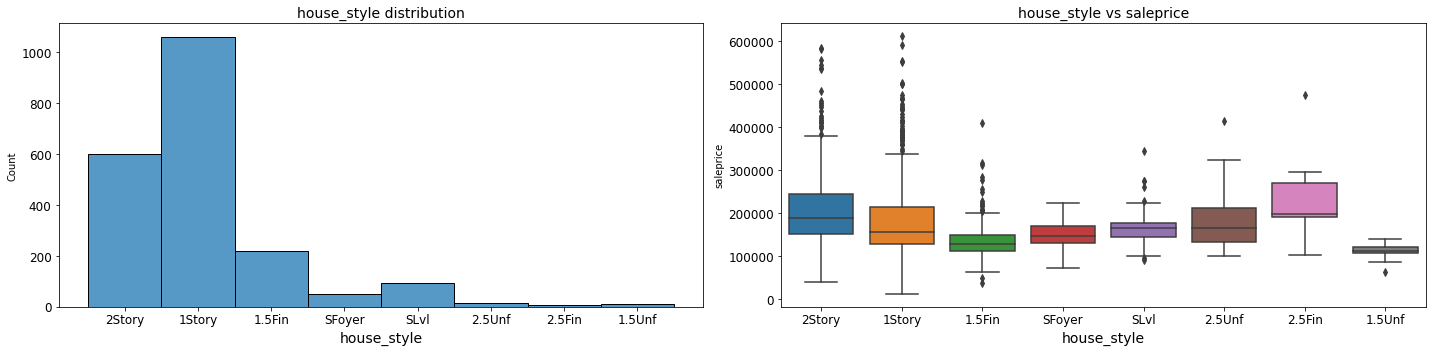

In [32]:
categorical_col_plots(train, ['house_style'])

From the boxplots, the values do not seem to have a drastic difference over each other.

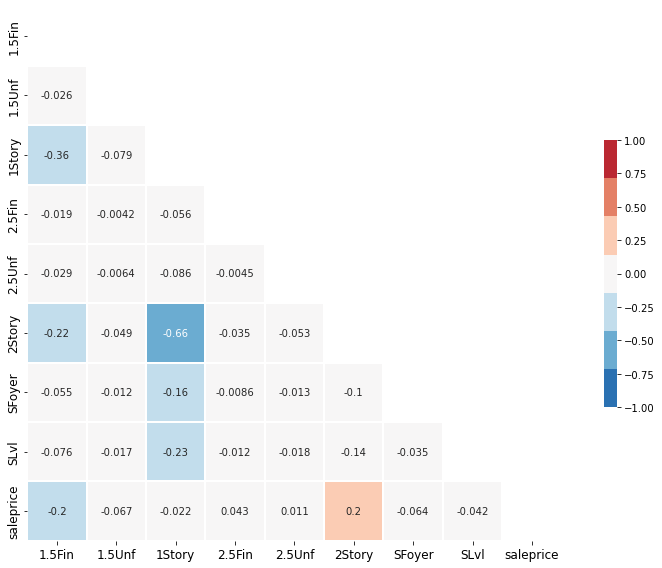

In [33]:
heatmap_all_cols(dummify(train, 'house_style'), width = 12, height = 8)

Most of the values do not have a good correlation with sale price. With such weak correlation to sale price, we will not include this column in our model.

In [34]:
drop_col(train, ['house_style'])

### `overall_qual`

**`overall_qual`** (int64, ordinal): Rates the overall material and finish of the house.

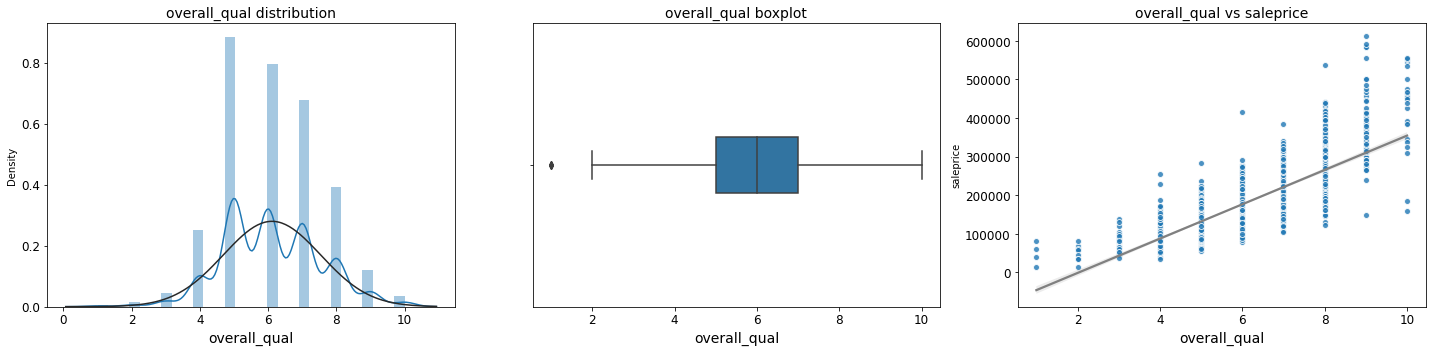

In [35]:
numeric_col_plots(train, ['overall_qual'])

As expected, the higher the quality of the house, the higher the sale price, as the scatter plot shows a somewhat linear relationship between quality and sale price.

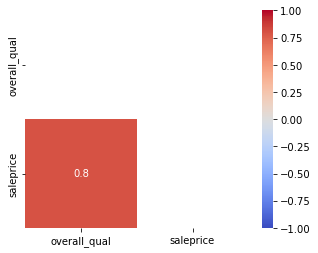

In [36]:
heatmap_small(train, ['overall_qual', 'saleprice'])

`overall_qual` has a very strong correlation with sale price. This feature actually speaks for itself, as it is predictable that well maintained houses would fetch a higher selling price. We could include this in our model.

### `overall_cond`

**`overall_cond`** (int64, ordinal): Rates the overall condition of the house.

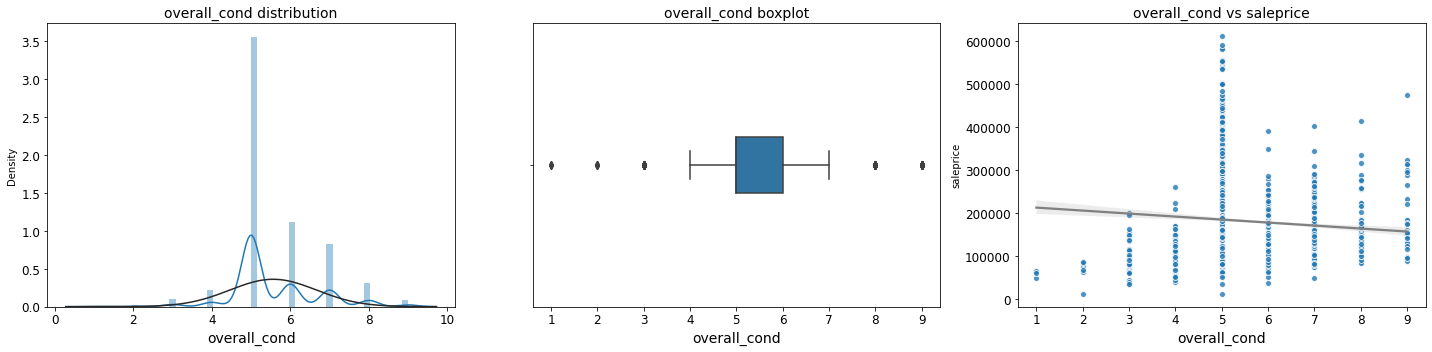

In [37]:
numeric_col_plots(train, ['overall_cond'])

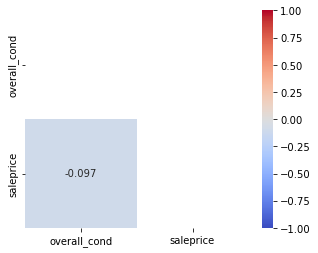

In [38]:
heatmap_small(train, ['overall_cond', 'saleprice'])

From the scatter plot, most of the houses were rated 5 for the condition of their house. However, what makes this column so confusing is that it shows a negative correlation with sale price, where the 'better' the condition of the house, the 'lower' the sale price. This is simply untrue, and we can only assume this negative correlation could be due to the influence of other features. For the sake of model accuracy, this column will be dropped.

In [39]:
drop_col(train, ['overall_cond'])

### `functional`

**`functional`** (object, ordinal): Home functionality (Assume typical unless deductions are warranted). We need to convert this column to ordinal numeric.

In [40]:
functional_dict = {'Typ': 7,
                   'Min1': 6,
                   'Min2': 5,
                   'Mod': 4,
                   'Maj1': 3,
                   'Maj2': 2,
                   'Sev': 1,
                   'Sal': 0}

to_ordinal_numeric(train, 'functional', functional_dict)

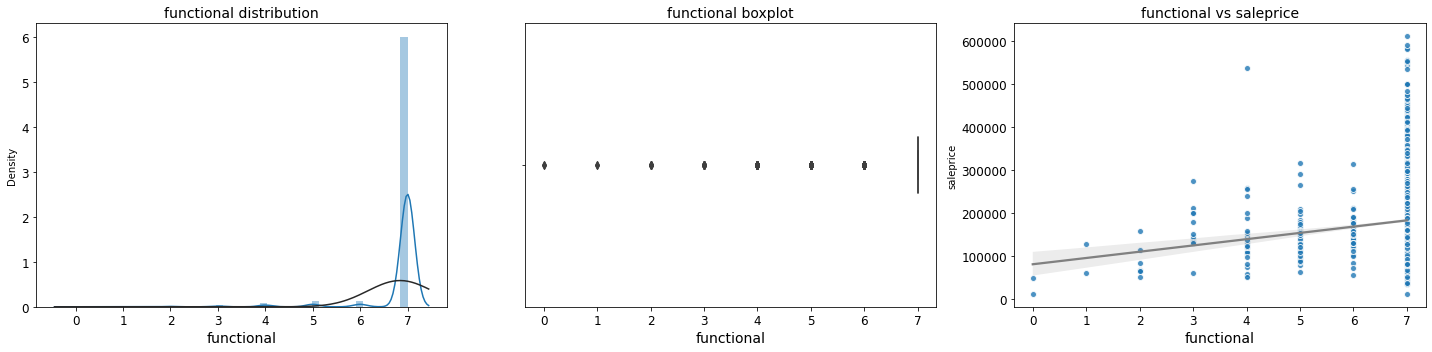

In [41]:
numeric_col_plots(train, ['functional'])

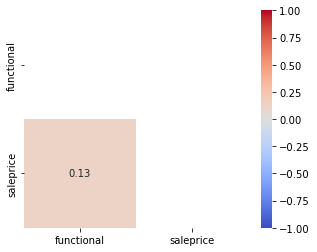

In [42]:
heatmap_small(train, ['functional', 'saleprice'])

Most houses have 'Typical Functionality'. For those with some deductions or damages, their sale prices were lower. Overall, the correlation with `sale_price` is not that great at under 0.2. We will decide again if this column is worth to keep, to penalise those houses with deductions or damages.

## Lot and Land Features

- `lot_frontage`
- `lot_area`
- `lot_shape`
- `land_contour`
- `lot_config`
- `land_slope`

### `lot_frontage`

**`lot_frontage`** (float64, continuous): Out of the columns that describe the lot of the property, only `lot_frontage` has missing values. Lot frontage is the width of a lot, measured at the front part or face of the lot, facing the street. There are 330 null values for this column, so we will have to use other lot descriptions (`lot_area`, `lot_shape`, `lot_config`) to estimate appropriate values for them.

As a rough guide, below shows a heatmap showing the correlation of `saleprice`, `lot_frontage` and `lot_area`, before inputing values to all the nulls in `lot_frontage` column. We will be using Iterative Imputer from sklearn, using linear regression as an estimator method.

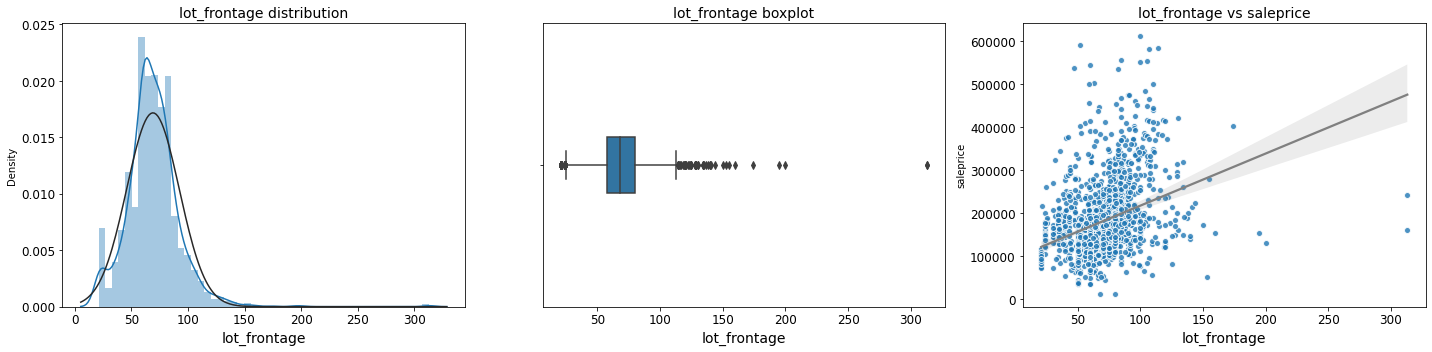

In [43]:
numeric_col_plots(train, ['lot_frontage'])

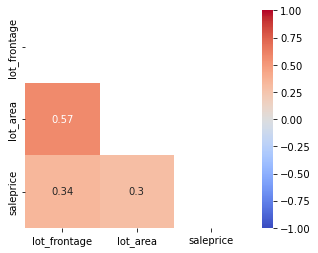

In [44]:
heatmap_small(train, ['lot_frontage','lot_area','saleprice'])

Below scatter plots show that the lot description columns are correlated and that it is sensible to use them for linear regression to estimate the values for input into the nulls.

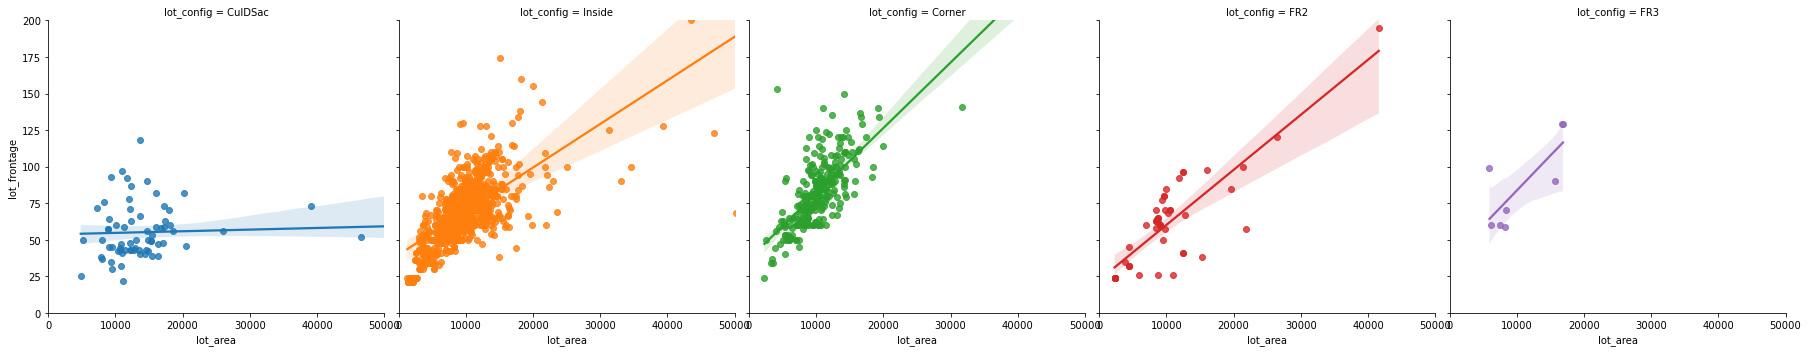

In [45]:
g = sns.lmplot(x = 'lot_area', y = 'lot_frontage', col = 'lot_config', 
               hue = 'lot_config', data = train)
g.set(xlim = (0, 50_000), ylim = (-.05, 200));

Dummies for `lot_shape` and `lot_config` will be created to input missing `lot_frontage` values.

In [46]:
lotdf = train[['lot_frontage','lot_area','lot_shape','lot_config']].copy(deep=True)
lotdf = pd.get_dummies(data=lotdf, columns=['lot_shape','lot_config'], drop_first=True)

In [47]:
# using Iterative Imputer with Linear Regression as the estimator
it_imp = IterativeImputer(estimator = LinearRegression())

it_imp_lotdf = it_imp.fit_transform(lotdf)

it_imp_lotdf = pd.DataFrame(it_imp_lotdf)

In [48]:
# replacing the initially null values
train['lot_frontage'] = it_imp_lotdf.loc[:,0]

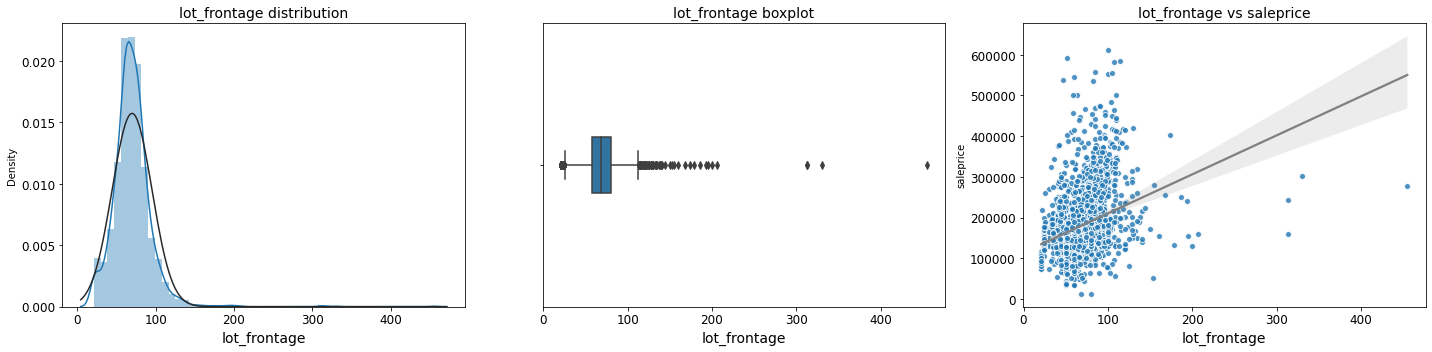

In [49]:
numeric_col_plots(train, ['lot_frontage'])

Now let us take care of the outliers. It seems that the extreme outliers are after 300. We shall drop them.

In [50]:
train.drop(train[train['lot_frontage'] > 300].index, inplace = True)

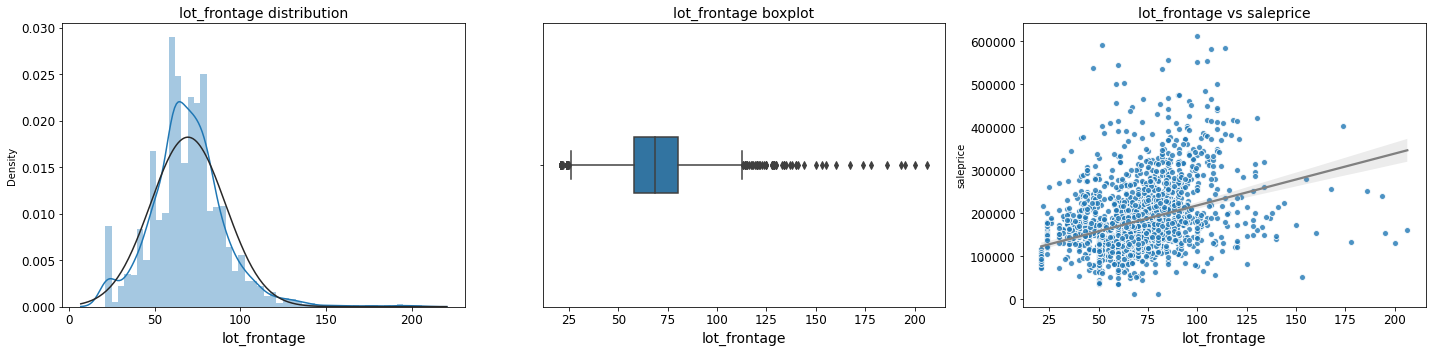

In [51]:
numeric_col_plots(train, ['lot_frontage'])

There are still many outliers, even though they are not as extreme. We can use a "winsorize" method, where both ends of the outliers are set to a limit of the percentile decided by the user. ([source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html))

In [52]:
train['lot_frontage'] = winsorize(train['lot_frontage'], limits = 0.025)

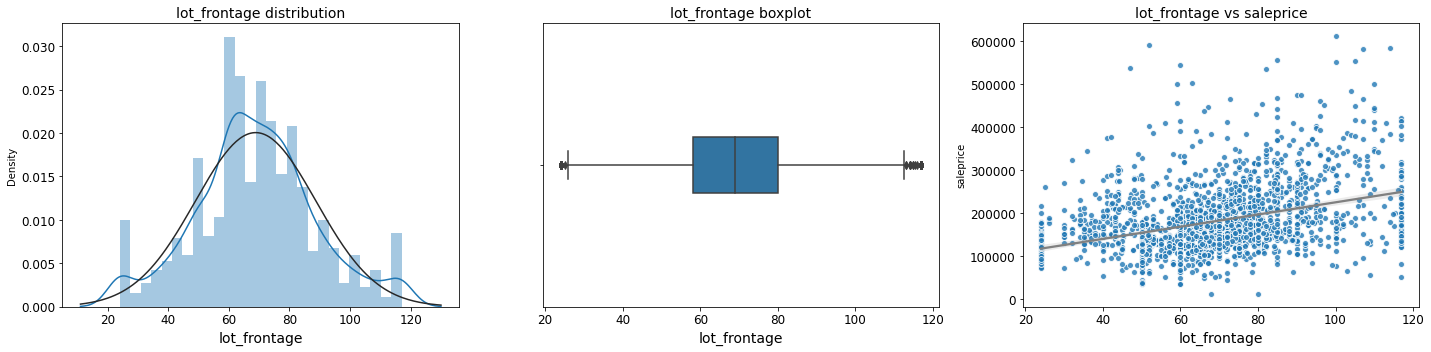

In [53]:
numeric_col_plots(train, ['lot_frontage'])

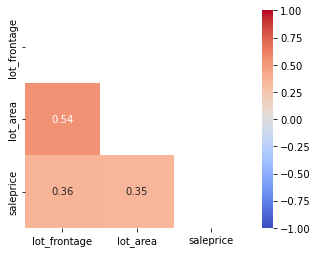

In [54]:
heatmap_small(train,['lot_frontage','lot_area','saleprice']);

Slight decrease in correlation between `lot_area` and `lot_frontage`, and slight increase in correlation observed between `saleprice` and `lot_frontage`, about 0.02. This should still be acceptable as our estimated values did not significantly change the correlation between these 2 variables.

### `lot_area`

**`lot_area`** (int64, continuous): The lot size, or area of the entire property, in square feet.

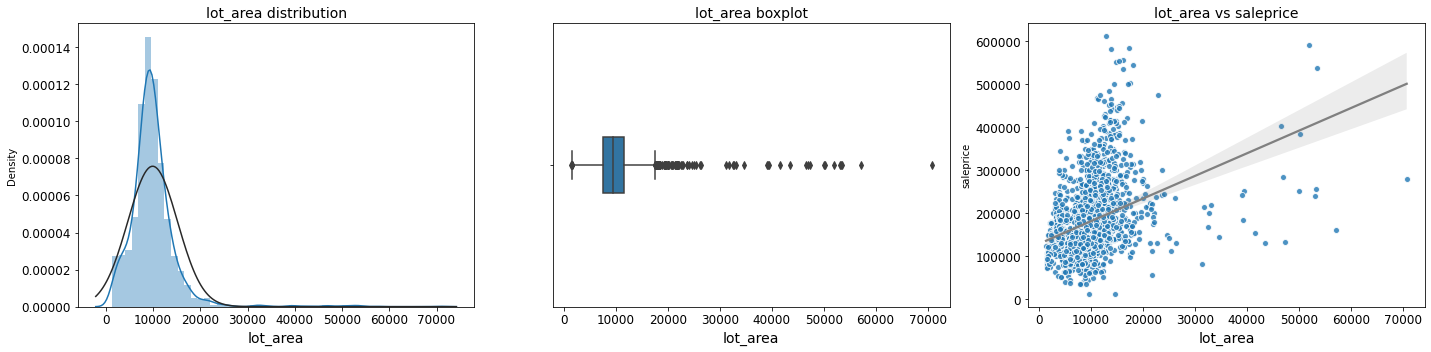

In [55]:
numeric_col_plots(train, ['lot_area'])

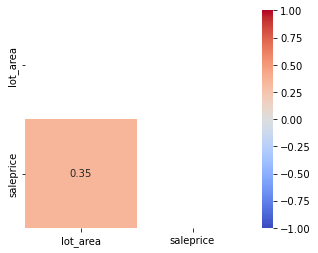

In [56]:
heatmap_small(train, ['lot_area', 'saleprice'])

No extreme outliers, so we will try the winsorize method as it is a convenient method to squeeze the values and get a more normal distribution.

In [57]:
train['lot_area'] = winsorize(train['lot_area'], limits = 0.025)

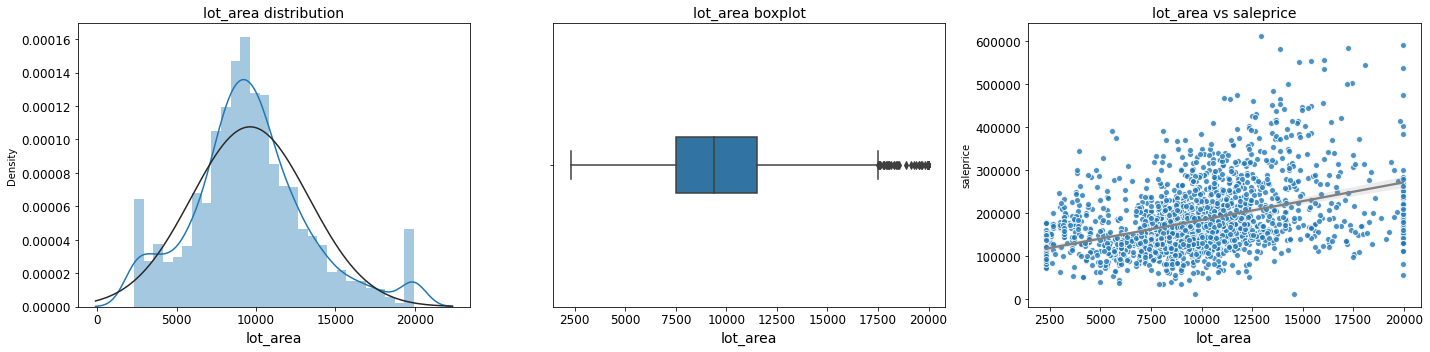

In [58]:
numeric_col_plots(train, ['lot_area'])

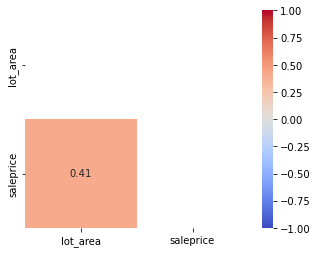

In [59]:
heatmap_small(train, ['lot_area', 'saleprice'])

Slight increase in correlation with `saleprice`. Looks like a good feature to include in our model.

### `lot_shape`

**`lot_shape`** (object, ordinal): General shape of property. Lets check out the placement of the boxplots before converting to ordinal numerical values.

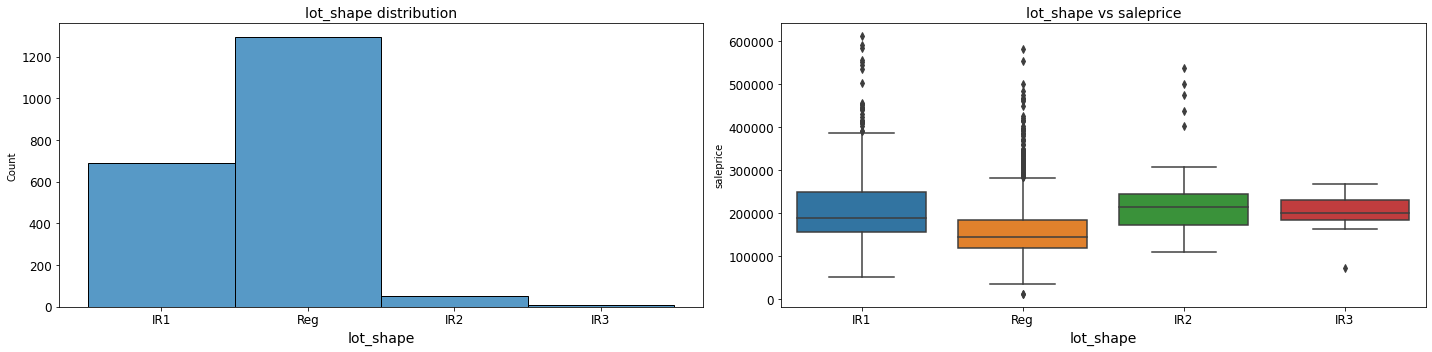

In [60]:
categorical_col_plots(train, ['lot_shape'])

Seems like even though "regular" shaped lots are the majority, "irregular" shaped lots might come with a higher sale price. Lets see the correlation with sale price after converting to ordinal numeric values.

In [61]:
lot_shape_dict = {'Reg': 0,
                  'IR1': 1,
                  'IR2': 2,
                  'IR3': 3}

to_ordinal_numeric(train, 'lot_shape', lot_shape_dict)

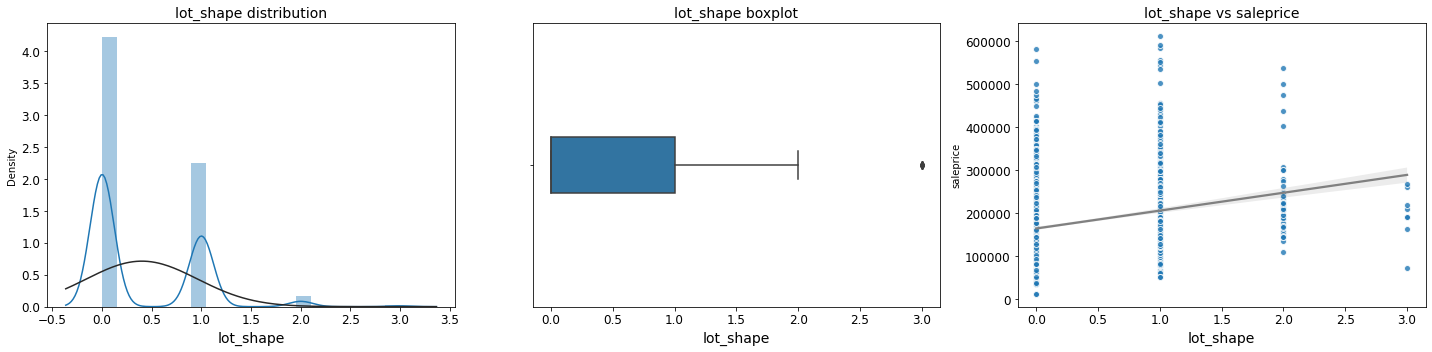

In [62]:
numeric_col_plots(train, ['lot_shape'])

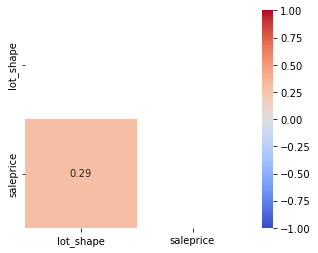

In [63]:
heatmap_small(train, ['lot_shape', 'saleprice'])

From here we know that even though majority of houses might have regular lot shapes, the sale price might become slightly higher for irregular lot shapes. Hence the correlation of higher sale price the more irregular the lot shape is. We could include this in our model.

### `land_contour`

**`land_contour`** (object, nominal): Flatness of the property.

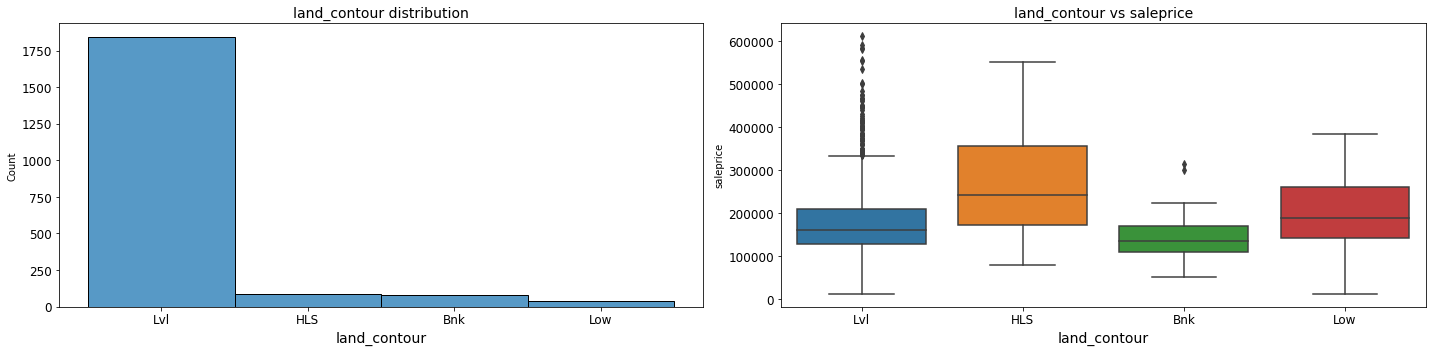

In [64]:
categorical_col_plots(train, ['land_contour'])

Most property had land that are leveled, with only a few exceptions.

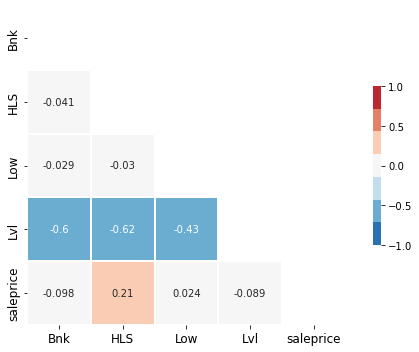

In [65]:
heatmap_all_cols(dummify(train, 'land_contour'), width = 8, height = 5)

The values have very poor correlation with `saleprice`. Will not include in our model.

In [66]:
drop_col(train, ['land_contour'])

### `lot_config`

**`lot_config`** (object, nominal): Lot configuration.

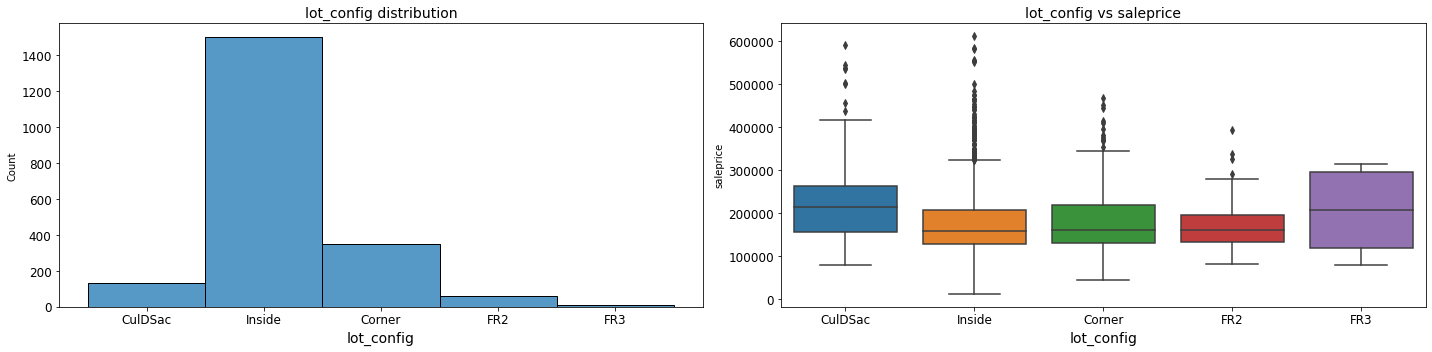

In [67]:
categorical_col_plots(train, ['lot_config'])

Most houses are inside lots. It seems like there were some differentiation in prices according to what kind of lot configuration the houses have.

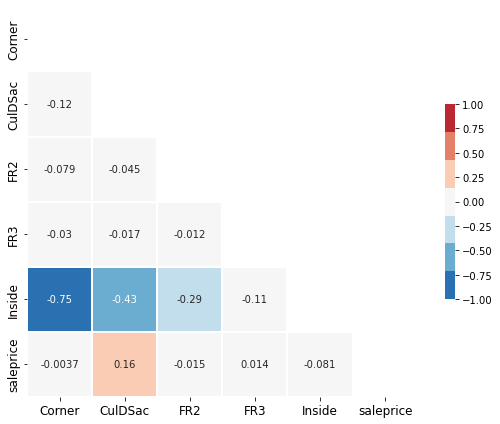

In [68]:
heatmap_all_cols(dummify(train, 'lot_config'), width = 8, height = 6)

Very low correlation with `saleprice`. We will not include this in our model.

In [69]:
drop_col(train, ['lot_config'])

### `land_slope`

**`land_slope`** (object, ordinal): Slope of property.

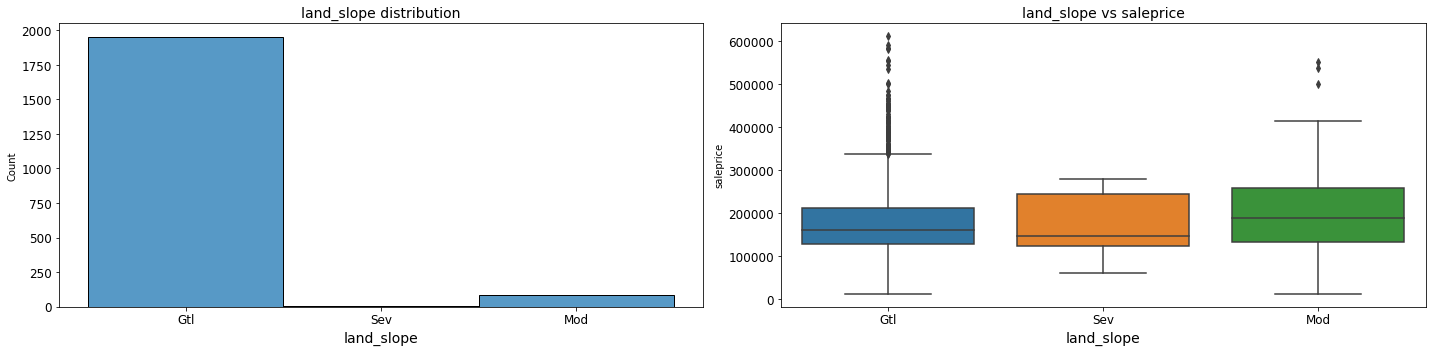

In [70]:
categorical_col_plots(train, ['land_slope'])

Boxplots do not show much differentiation between each other. Lets dummify and check out each values' correlation with `saleprice`.

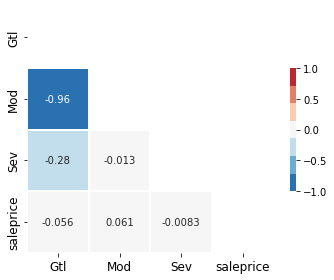

In [71]:
heatmap_all_cols(dummify(train, 'land_slope'), width = 5, height = 4)

All values have very low correlation with sale price. Will not include in our model.

In [72]:
drop_col(train, ['land_slope'])

## Surrounding Features

- `street`
- `alley`
- `neighborhood`
- `condition_1`
- `condition_2`
- `paved_drive`

### `street`

**`street`** (object, nominal): Type of road access to property.

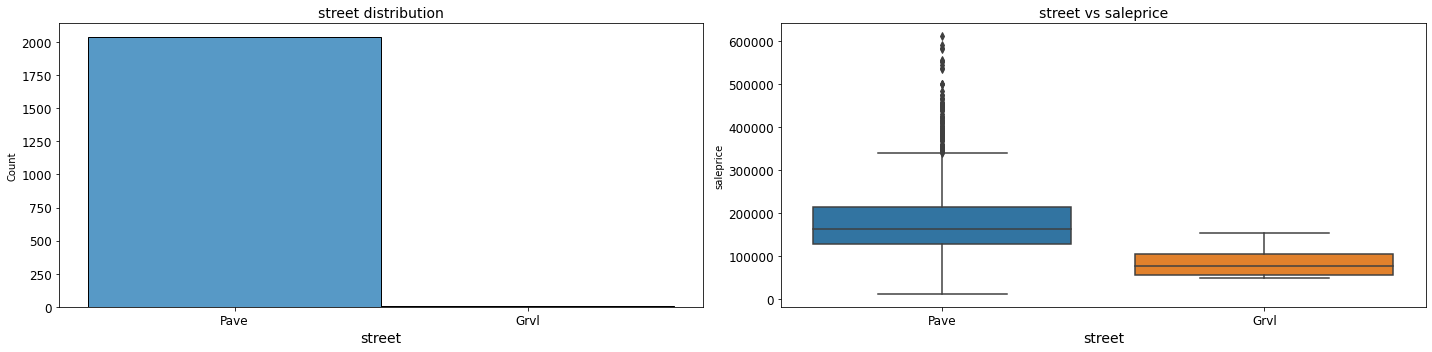

In [73]:
categorical_col_plots(train, ['street'])

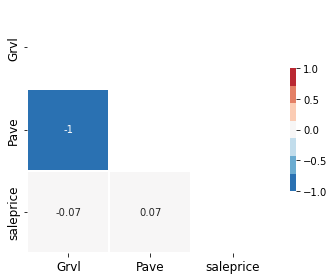

In [74]:
heatmap_all_cols(dummify(train, 'street'), width = 5, height = 4)

Very low correlation with sale price. Will not include in our model.

In [75]:
drop_col(train, ['street'])

### `alley`

**`alley`** (object, nominal): Type of alley access to property.

In [76]:
train['alley'].value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

In [77]:
drop_col(train, ['alley'])

This column will be dropped as 93.2% are null values.

### `neighborhood`

**`neighborhood`** (object, nominal): Physical locations within Ames city limits.

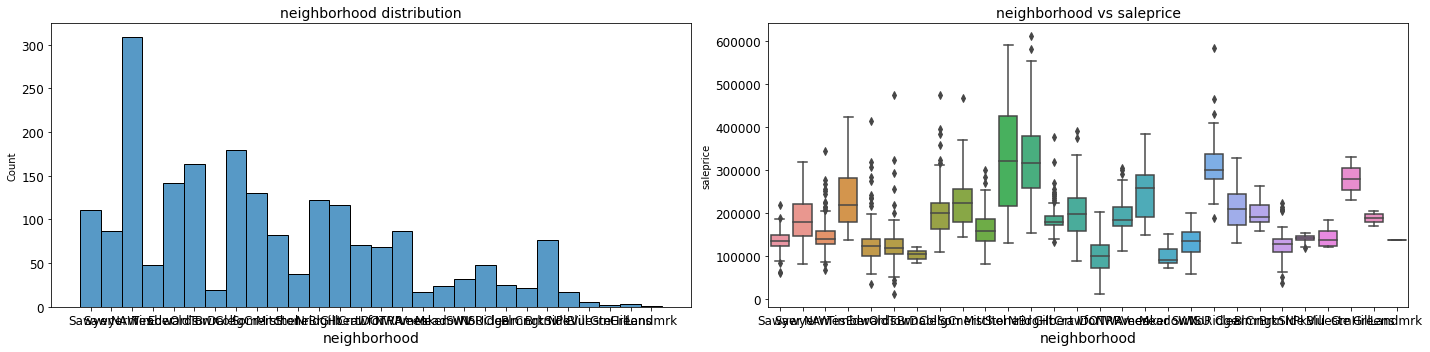

In [78]:
categorical_col_plots(train, ['neighborhood'])

As expected, neighborhood is a good predictor of sale price, from the many differentiations shown from the boxplots. We could perhaps rank them into ordinal values, by exploring the most desirable neighborhoods to the least. That way, we might be able to make our model more accurate when we include this column. First, lets explore the mean sale price of houses in each neighborhood, from highest to lowest.

In [79]:
train.groupby('neighborhood')['saleprice'].mean().sort_values(ascending = False)

neighborhood
StoneBr    329675.736842
NridgHt    322831.352459
NoRidge    316294.125000
GrnHill    280000.000000
Veenker    253570.588235
Timber     241051.354167
Somerst    227183.900000
ClearCr    211729.280000
Crawfor    205901.211268
CollgCr    202497.216667
Blmngtn    200417.681818
NWAmes     194619.022989
Gilbert    189228.387931
Greens     188666.666667
SawyerW    187760.160920
Mitchel    167656.707317
NAmes      145594.831715
Blueste    144566.666667
NPkVill    140476.470588
Sawyer     137181.909910
Landmrk    137000.000000
SWISU      134758.875000
Edwards    130285.676056
BrkSide    127022.697368
OldTown    125276.300613
BrDale     103371.052632
IDOTRR     101103.188406
MeadowV    100231.250000
Name: saleprice, dtype: float64

From this list, we can create a dictionary ranking each neighborhood, from highest mean sale price (highest ranking, most desirable neighborhood) to lowest mean sale price (lowest ranking, least desirable neighborhood), converting our neighborhood column into containing ordinal numerical values.

In [80]:
neighborhood_dict = {'StoneBr': 27,
                     'NridgHt': 26,
                     'NoRidge': 25,
                     'GrnHill': 24,
                     'Veenker': 23,
                     'Timber': 22,
                     'Somerst': 21,
                     'ClearCr': 20,
                     'Crawfor': 19,
                     'CollgCr': 18,
                     'Blmngtn': 17,
                     'NWAmes': 16,
                     'Gilbert': 15,
                     'Greens': 14,
                     'SawyerW': 13,
                     'Mitchel': 12,
                     'NAmes': 11,
                     'Blueste': 10,
                     'NPkVill': 9,
                     'Sawyer': 8,
                     'Landmrk': 7,
                     'SWISU': 6,
                     'Edwards': 5,
                     'BrkSide': 4,
                     'OldTown': 3,
                     'BrDale': 2,
                     'IDOTRR': 1,
                     'MeadowV': 0}

In [81]:
to_ordinal_numeric(train, 'neighborhood', neighborhood_dict)

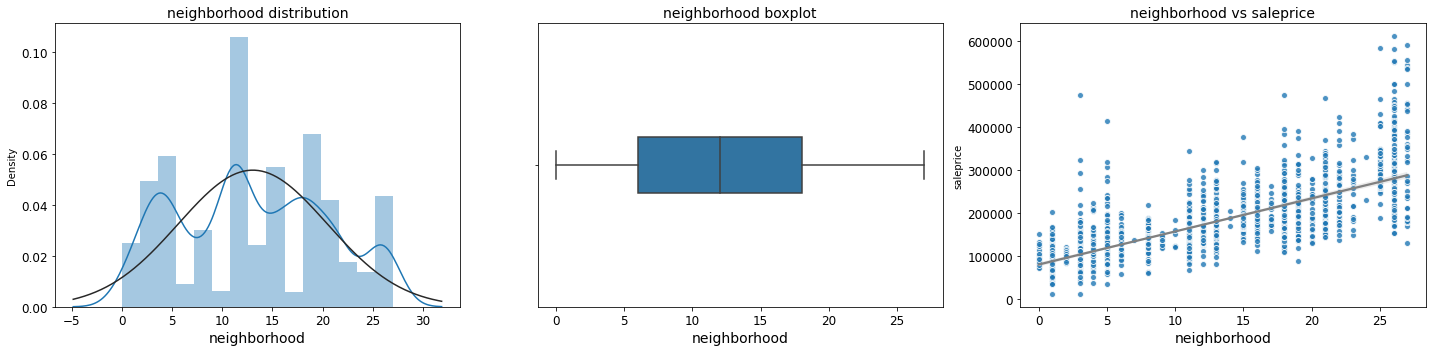

In [82]:
numeric_col_plots(train, ['neighborhood'])

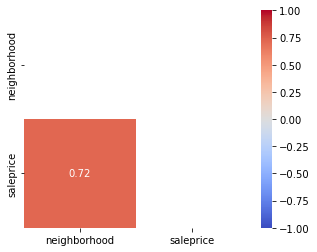

In [83]:
heatmap_small(train, ['neighborhood', 'saleprice'])

Neighborhood is indeed a very good predictor of sale price. We will include this in our model.

### `condition_1`

**`condition_1`** (object, nominal): Proximity to various conditions.

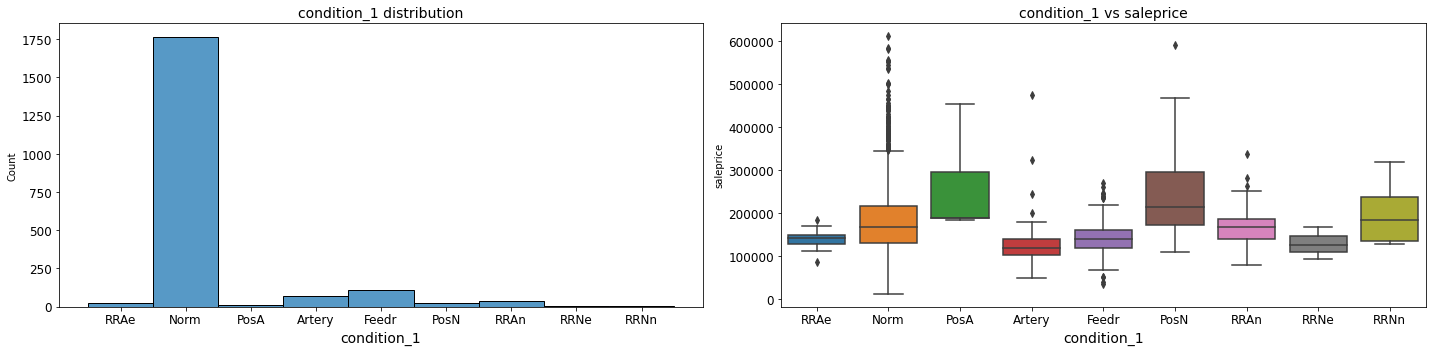

In [84]:
categorical_col_plots(train, ['condition_1'])

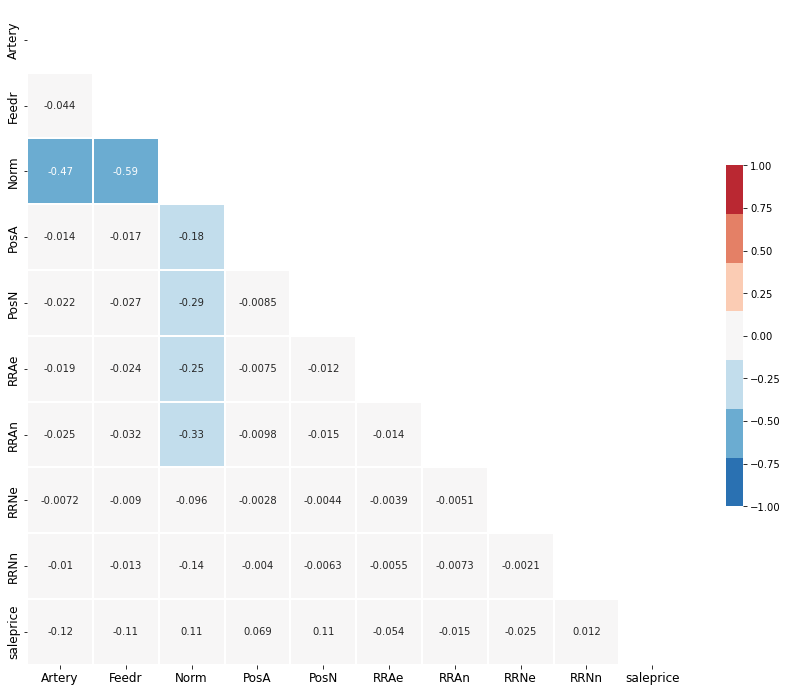

In [85]:
heatmap_all_cols(dummify(train, 'condition_1'), width = 12, height = 10)

Majority of the houses have the "normal" value. After dummify, the values do not seem to have much of a correlation to `saleprice`. When we think about it in reality, whether these conditions are good or bad are subjective for each individual. That would probably explain why these conditions do not correlate with sale price as much as we hoped. Will not include this in our model.

In [86]:
drop_col(train, ['condition_1'])

### `condition_2`

**`condition_2`** (object, nominal): An extra column for conditions, if there are more than 1. Shares the same values as `condition_1`.

In [87]:
train['condition_2'].value_counts()

Norm      2021
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: condition_2, dtype: int64

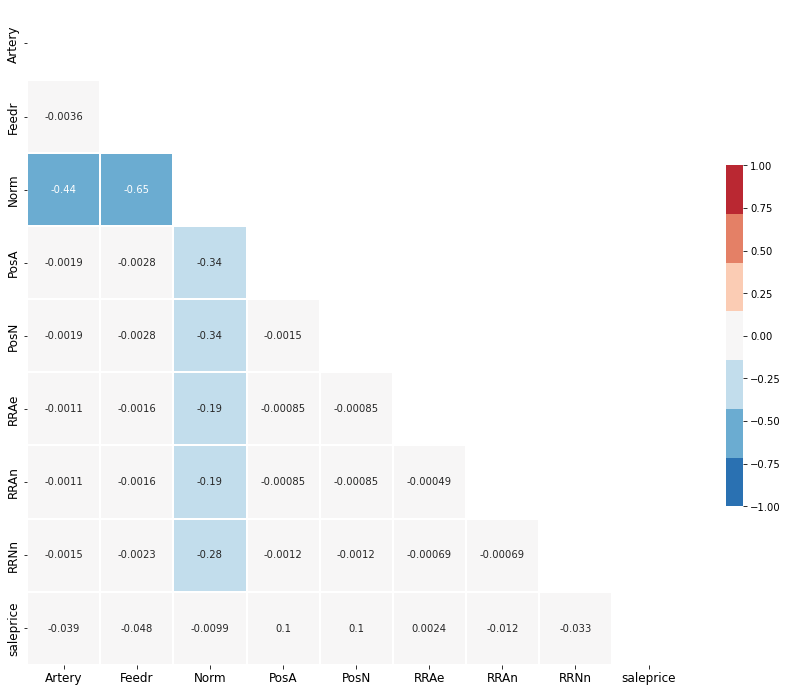

In [88]:
heatmap_all_cols(dummify(train, 'condition_2'), width = 12, height = 10)

This column will not be included in our model as 98.7% are the same value, and the values themselves have no correlation with `saleprice`. Similarly to `condition_1`, proximity to certain conditions, whether they are good or bad, are subjective for each individual.

In [89]:
drop_col(train, ['condition_2'])

### `paved_drive`

**`paved_drive`** (object, ordinal): Paved driveway. We will convert this column to ordinal numerical values.

In [90]:
paved_drive_dict = {'Y': 2,
                    'P': 1,
                    'N': 0}

to_ordinal_numeric(train, 'paved_drive', paved_drive_dict)

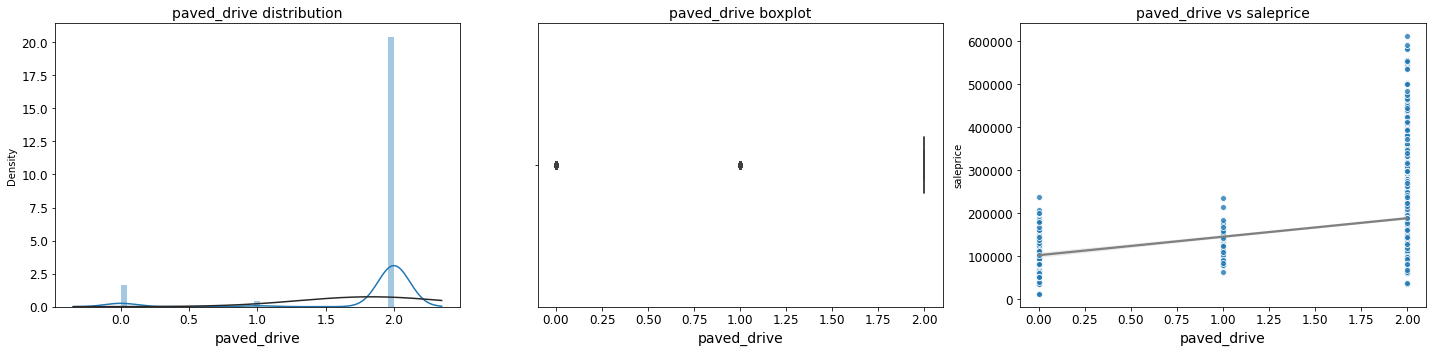

In [91]:
numeric_col_plots(train, ['paved_drive'])

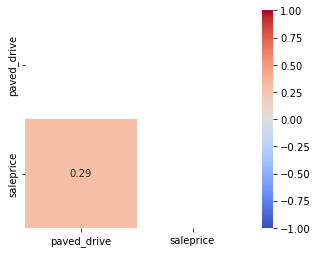

In [92]:
heatmap_small(train, ['paved_drive', 'saleprice'])

Very good correlation with `saleprice`. We could include it in our model. A nice paved road to the house does increase the sale price.

## Outer Features

- `roof_style`
- `roof_matl`
- `exterior_1st`
- `exterior_2nd`
- `mas_vnr_type`
- `mas_vnr_area`
- `exter_qual`
- `exter_cond`
- `foundation`

### `roof_style`

**`roof_style`** (object, nominal): Type of roof.

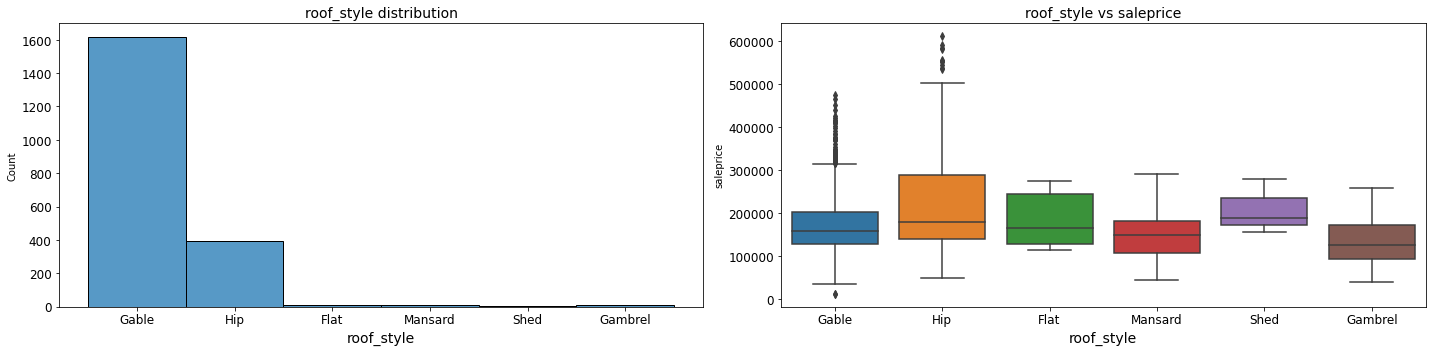

In [93]:
categorical_col_plots(train, ['roof_style'])

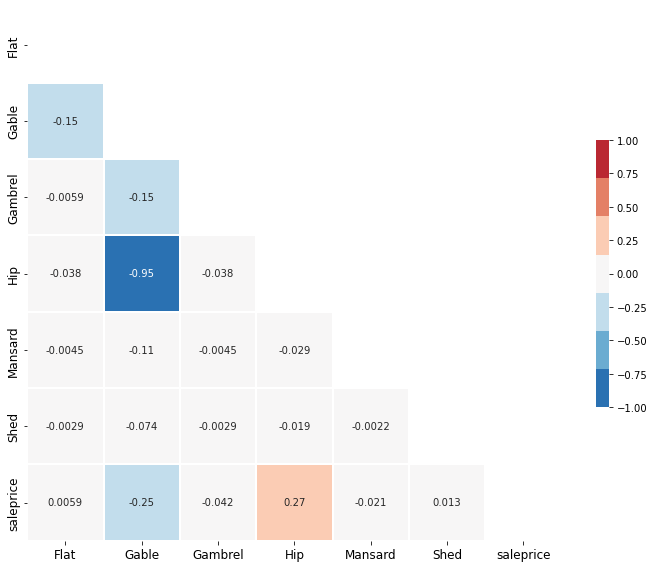

In [94]:
heatmap_all_cols(dummify(train, 'roof_style'), width = 10, height = 8)

Most houses have a gable roof style. From the correlation matrix, most of the values do not have a strong correlation with `saleprice`. This might be because generally, people do not put too much emphasis on the type of roofs a house has. Hence we might not use this in our model.

In [95]:
drop_col(train, ['roof_style'])

### `roof_matl`

**`roof_matl`** (object, nominal): Roof material.

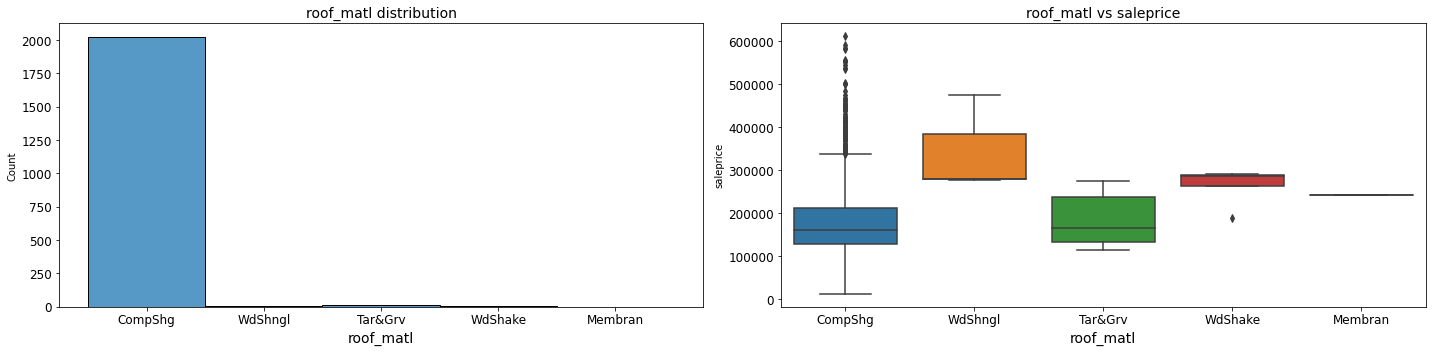

In [96]:
categorical_col_plots(train, ['roof_matl'])

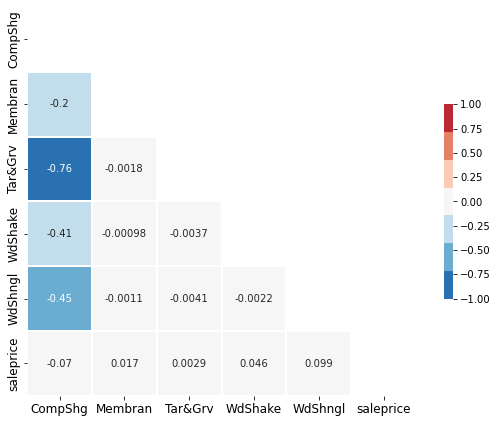

In [97]:
heatmap_all_cols(dummify(train, 'roof_matl'), width = 8, height = 6)

98.7% are the same value, and the values themselves have very weak correlation with `saleprice`. We will not use this in our model. Similarly to roof types, people might not put too much importance on the materials of a roof.

In [98]:
drop_col(train, ['roof_matl'])

### `exterior_1st`

**`exterior_1st`** (object, nominal): Exterior covering on house.

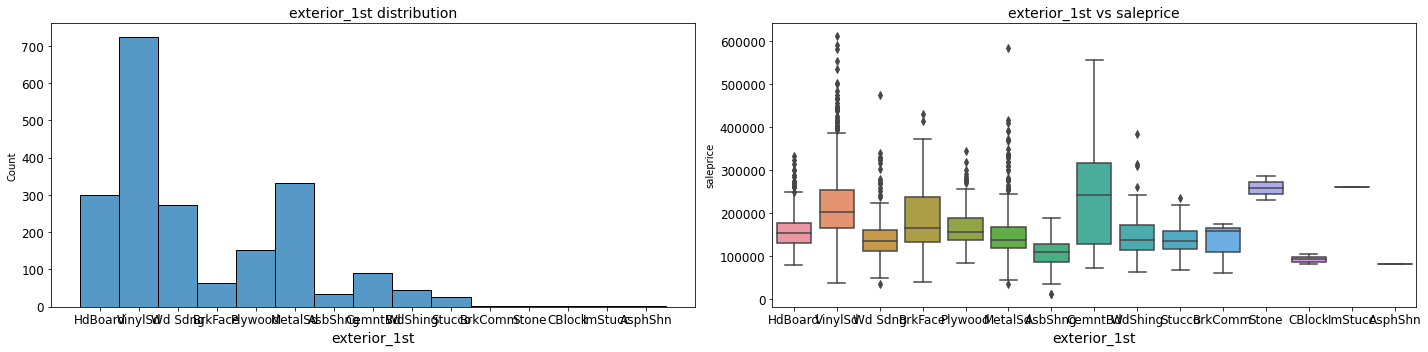

In [99]:
categorical_col_plots(train, ['exterior_1st'])

Values are quite distributed, with 'Vinyl Siding' being the most popular. Lets explore more of each values' correlation with sale price.

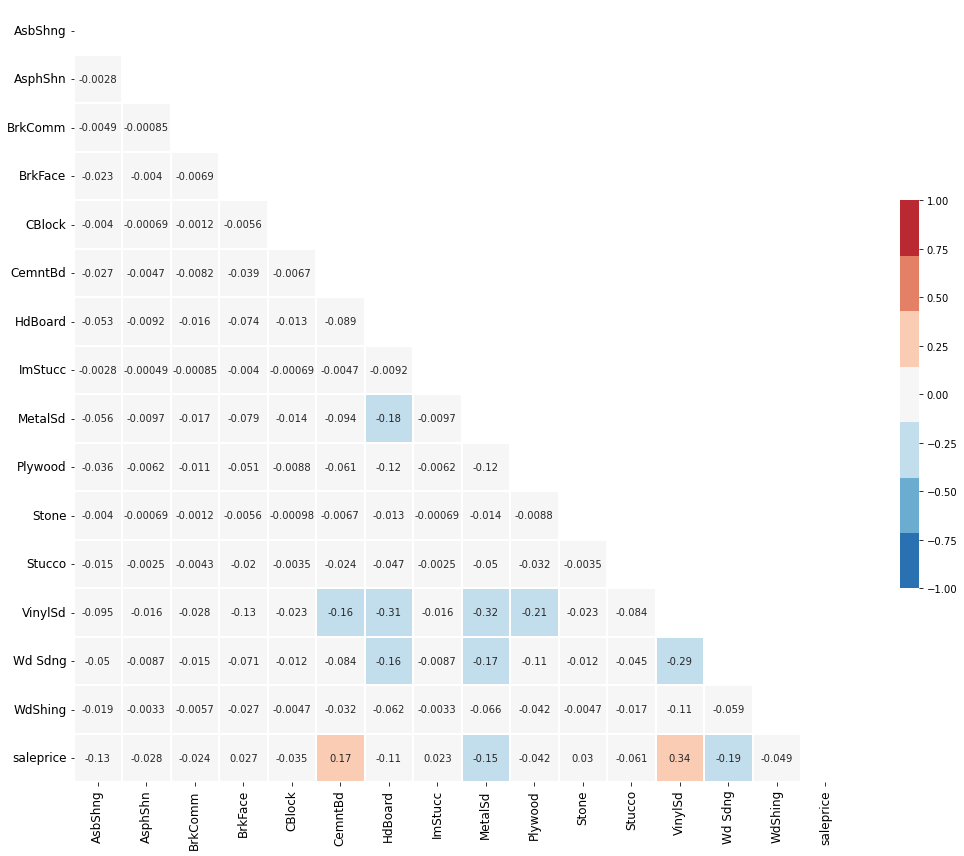

In [100]:
heatmap_all_cols(dummify(train, 'exterior_1st'), width = 15, height = 12)

Unfortunately, most `exterior_1st` values' correlation with `saleprice` are very weak. Our analysis tells us that people do not mind much about the exterior materials, but rather, the quality. May not include this column in our model.

In [101]:
drop_col(train, ['exterior_1st'])

### `exterior_2nd`

**`exterior_2nd`** (object, nominal): Exterior covering on house (if more than one material). Shares the same variables as `exterior_1st`. We suspect there might be houses with only 1 material for this feature, thus having the same value as `exterior_1st`.

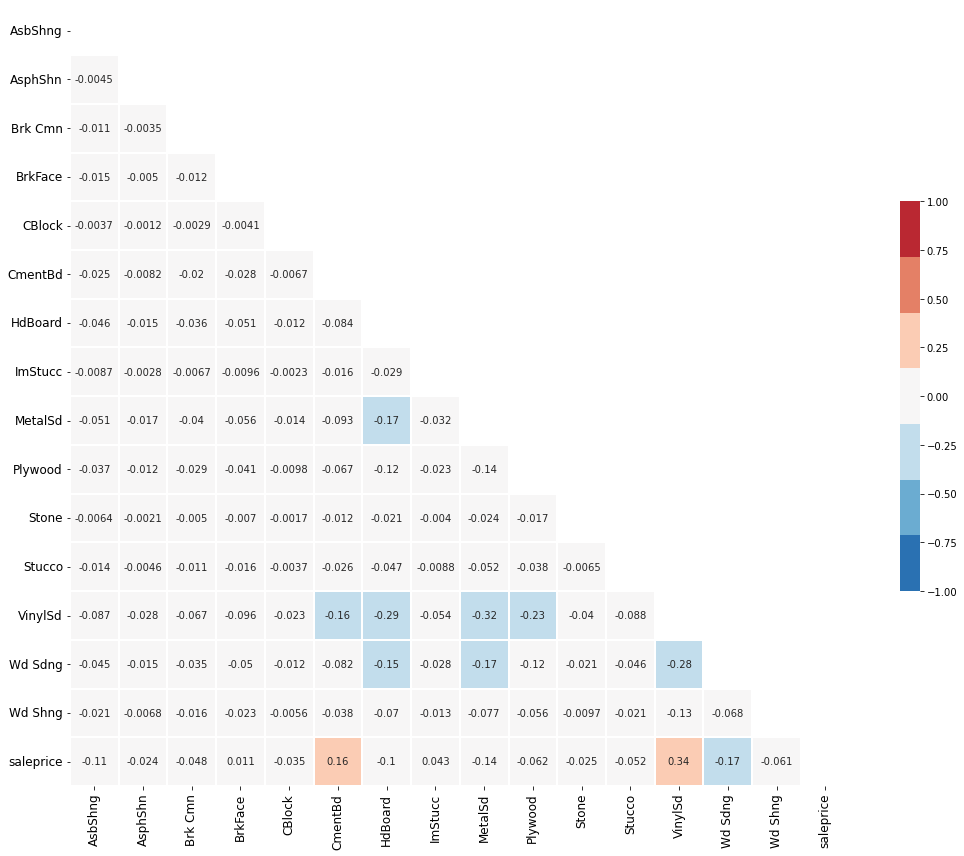

In [102]:
heatmap_all_cols(dummify(train, 'exterior_2nd'), width = 15, height = 12)

With such poor correlation with `saleprice`, we may not consider this feature in our model.

In [103]:
drop_col(train, ['exterior_2nd'])

### `mas_vnr_type`

**`mas_vnr_type`** (object, nominal): Masonry veneer type. Contains 22 null values, which we suspect is due to those houses not having any masonry veneer, but was not correctly given the value 'None'. We will fill in the null values with 'None', then check the values.

In [104]:
fill_null_w_none(train, ['mas_vnr_type'])

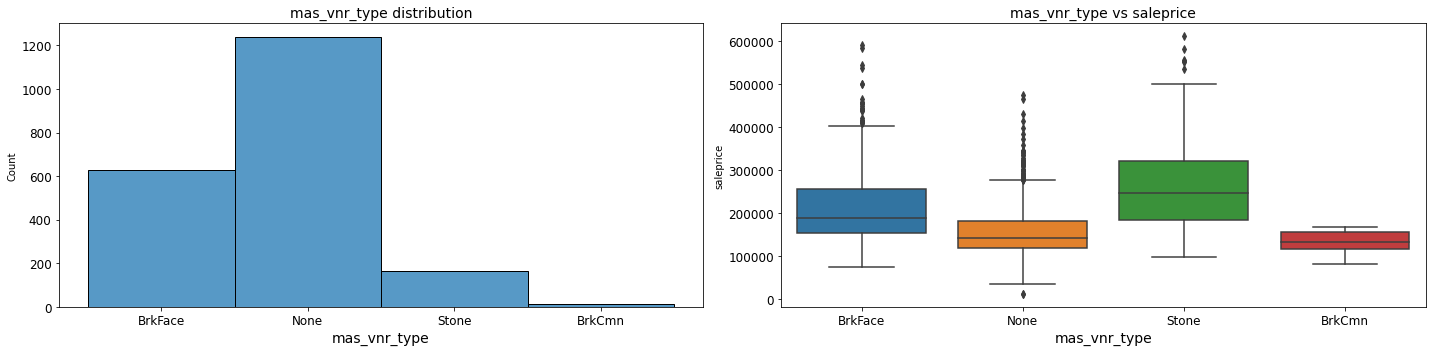

In [105]:
categorical_col_plots(train, ['mas_vnr_type'])

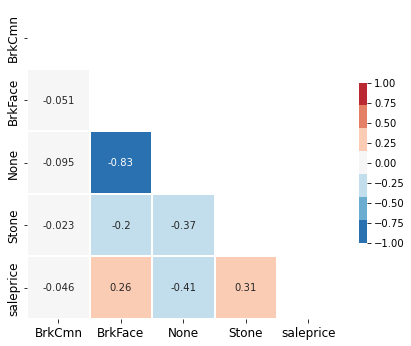

In [106]:
heatmap_all_cols(dummify(train, 'mas_vnr_type'), width = 6, height = 5)

The values of this column show varying correlation with `saleprice`. "Brick face" and "stone" masonry veneer types are on the higher end where they fetch higher sale price for houses. "Brick common" masonry veneer type is the average kind of masonry veneer with not much scaling to sale price. Lastly, houses with no masonry veneer are penalised with negative correlation with sale price. However, when considering if this is a good fit into our model, we can see that there is multicollinearity between "brick face" and "None". This will most likely cause problems when we fit the model and intepret the result. Besides, the correlation with sale price are quite low, so we will drop these features.

In [107]:
drop_col(train, ['mas_vnr_type'])

### `mas_vnr_area`

**`mas_vnr_area`** (float64, continuous): Masonry veneer area in square feet. Contains 22 null values, which we suspect is due to those houses not having any masonry veneer, but was not correctly given the value 0.0. We will fill in the null values with 0.0, then check the values.

In [108]:
fill_null_w_zero(train, ['mas_vnr_area'])

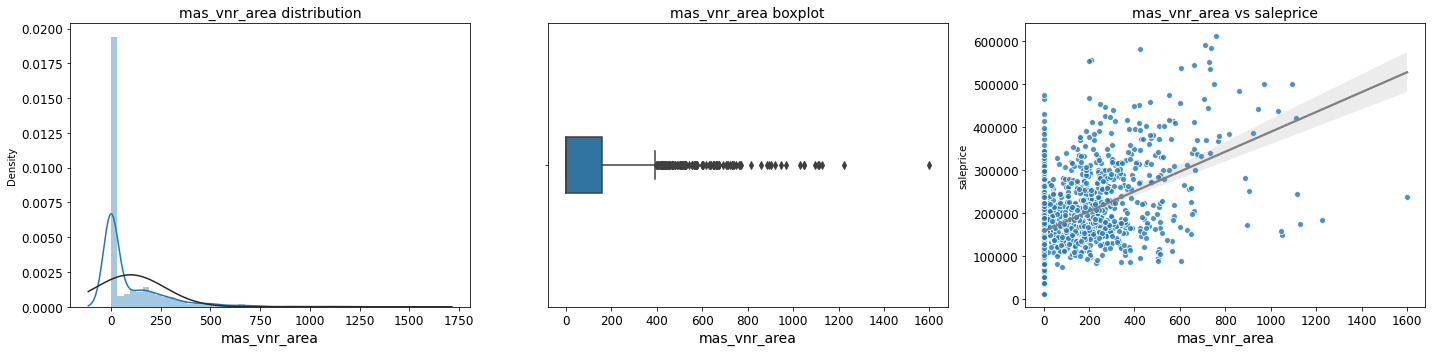

In [109]:
numeric_col_plots(train, ['mas_vnr_area'])

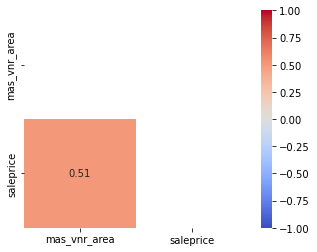

In [110]:
heatmap_small(train, ['mas_vnr_area', 'saleprice'])

Quite a strong correlation with `saleprice`. We could include it in our model. Lets try taking away the extreme outliers, then use winsorize method to see what happens.

In [111]:
train.drop(train[train['mas_vnr_area'] > 1_400].index, inplace = True)

In [112]:
train['mas_vnr_area'] = winsorize(train['mas_vnr_area'], limits = 0.1)

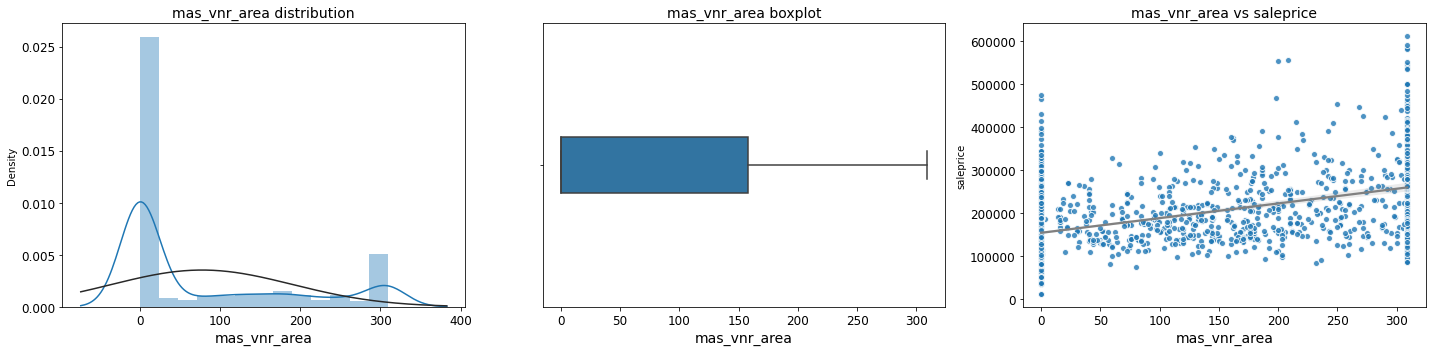

In [113]:
numeric_col_plots(train, ['mas_vnr_area'])

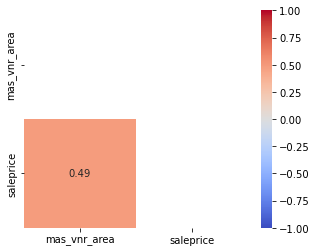

In [114]:
heatmap_small(train, ['mas_vnr_area', 'saleprice'])

Not much change in the correlation with `saleprice`. Still a strong correlation, and we can consider putting this feature in our model.

### `exter_qual`

**`exter_qual`** (object, ordinal): Evaluates the quality of the material on the exterior. Lets see how each value correlates with `saleprice`, before converting them to ordinal numeric and explore again.

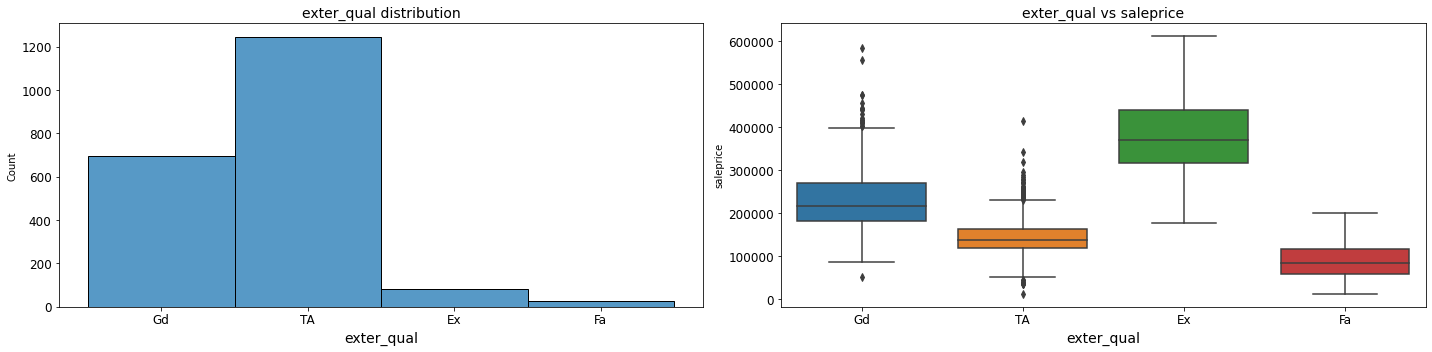

In [115]:
categorical_col_plots(train, ['exter_qual'])

From first glance, nothing too out of the ordinary here, as it makes sense for the sale price to be higher the better the quality of the material.

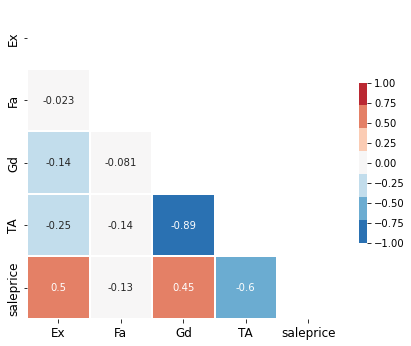

In [116]:
heatmap_all_cols(dummify(train, 'exter_qual'), width = 6, height = 5)

However, the values' correlation with `saleprice` do not show "excellent" quality as the best correlation, nor "fair" (there is no "poor" value) as the worse (or negative correlation). Thus we will explore converting to ordinal numerical values instead.

In [117]:
quality_dict = {'Ex': 5,
                'Gd': 4,
                'TA': 3,
                'Fa': 2,
                'Po': 1,
                'None': 0}

to_ordinal_numeric(train, 'exter_qual', quality_dict)

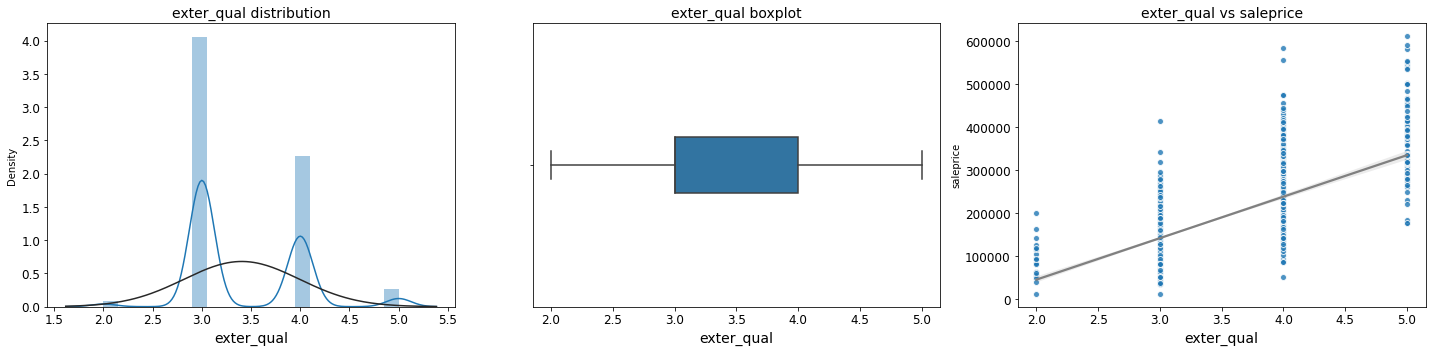

In [118]:
numeric_col_plots(train, ['exter_qual'])

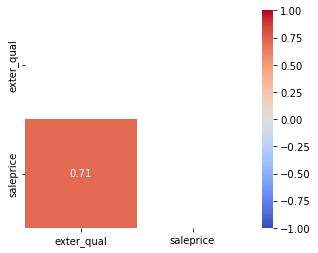

In [119]:
heatmap_small(train, ['exter_qual', 'saleprice'])

After converting to ordinal numeric values, it shows a very good correlation with `saleprice`. People generally place more importance on the quality of the material instead of the material itself. We could consider including this feature in our model.

### `exter_cond`

**`exter_cond`** (object, ordinal): Evaluates the present condition of the material on the exterior. Lets see how each value correlates with `saleprice`, before converting them to ordinal numeric and explore again.

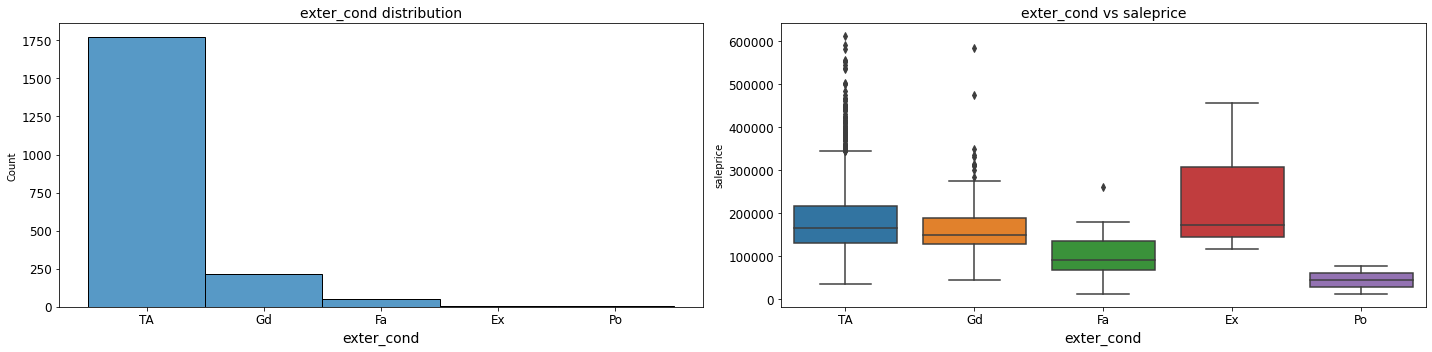

In [120]:
categorical_col_plots(train, ['exter_cond'])

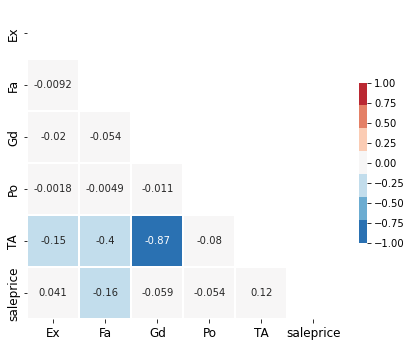

In [121]:
heatmap_all_cols(dummify(train, 'exter_cond'), width = 6, height = 5)

The values' correlation with `saleprice` do not show "excellent" quality as the best correlation, nor "poor" as the worse (or negative correlation). Thus we will explore converting to ordinal numerical values instead.

In [122]:
to_ordinal_numeric(train, 'exter_cond', quality_dict)

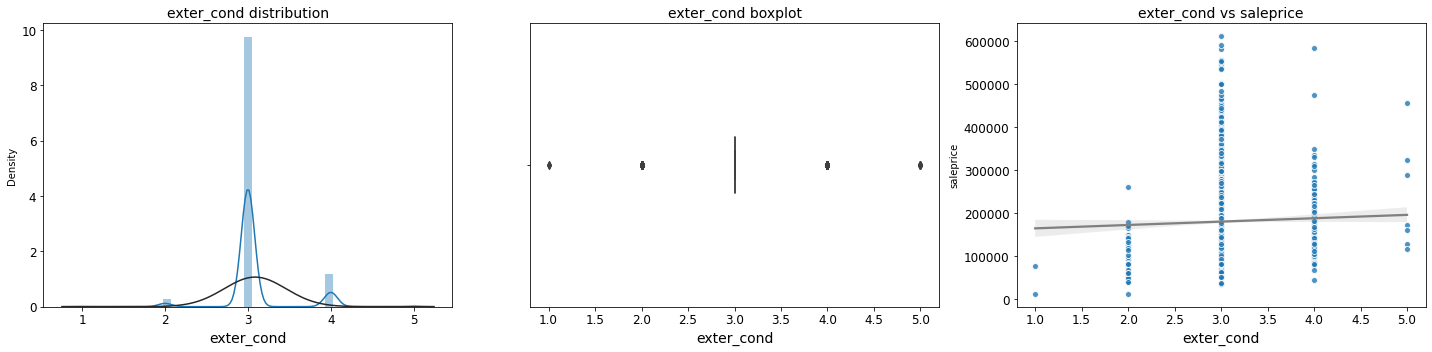

In [123]:
numeric_col_plots(train, ['exter_cond'])

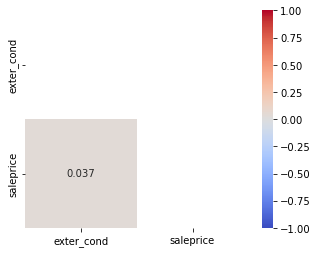

In [124]:
heatmap_small(train, ['exter_cond', 'saleprice'])

Poor correlation with `saleprice`. It seems that as long as the external quality is good, the condition is not much of an issue for most people. We will not include this in our model.

In [125]:
drop_col(train, ['exter_cond'])

### `foundation`

**`foundation`** (object, nominal): Type of foundation. Lets check each values' correlation with `saleprice` with dummies.

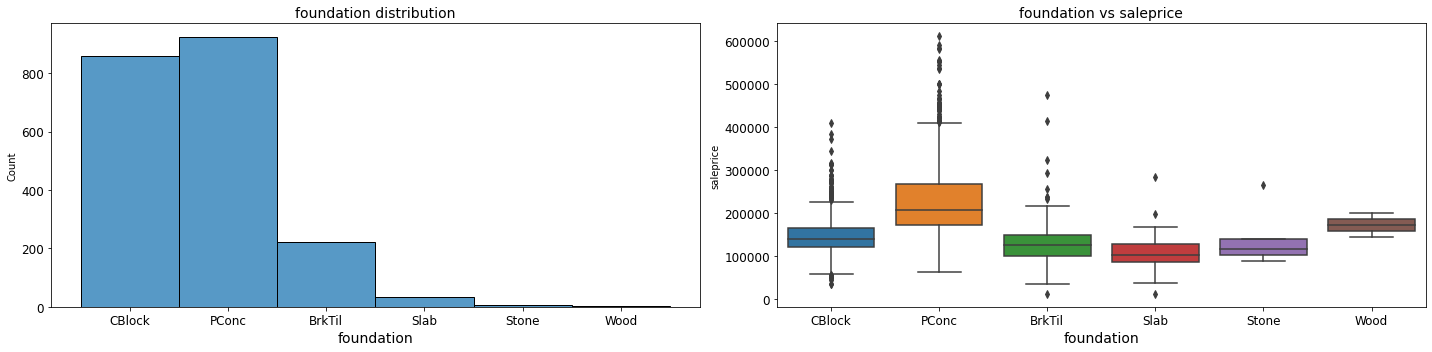

In [126]:
categorical_col_plots(train, ['foundation'])

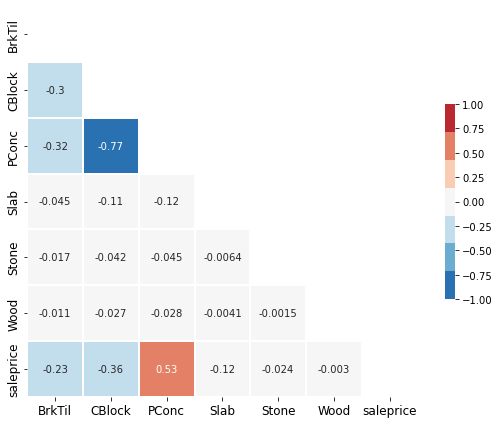

In [127]:
heatmap_all_cols(dummify(train, 'foundation'), width = 8, height = 6)

Values show varying correlation with `saleprice`. We may consider including these features in our model. It tells us that people do place importance on what kind of foundation the house was built on.

## Inner Above Grade Features

- `1st_flr_sf`
- `2nd_flr_sf`
- `low_qual_fin_sf`
- `gr_liv_area`
- `full_bath`
- `half_bath`
- `bedroom_abvgr`
- `kitchen_abvgr`
- `kitchen_qual`
- `totrms_abvgrd`
- `fireplaces`
- `fireplace_qu`

### `1st_flr_sf`

**`1st_flr_sf`** (int64, continuous): First floor square feet. Since both `1st_flr_sf` and `2nd_flr_sf` are part of `gr_liv_area` (above grade (ground) living area), we just need `gr_liv_area`, making these 2 columns redundant as we do not want to double count the areas. ([source](https://www.gimme-shelter.com/above-grade-50066/))

In [128]:
drop_col(train, ['1st_flr_sf'])

### `2nd_flr_sf`

**`2nd_flr_sf`** (int64, continuous): Second floor square feet. Since both `1st_flr_sf` and `2nd_flr_sf` are part of `gr_liv_area` (above grade (ground) living area), we just need `gr_liv_area`, making these 2 columns redundant as we do not want to double count the areas. ([source](https://www.gimme-shelter.com/above-grade-50066/))

In [129]:
drop_col(train, ['2nd_flr_sf'])

### `low_qual_fin_sf`

**`low_qual_fin_sf`** (int64, continuous): Low quality finished areas in the house, in square feet (all floors).

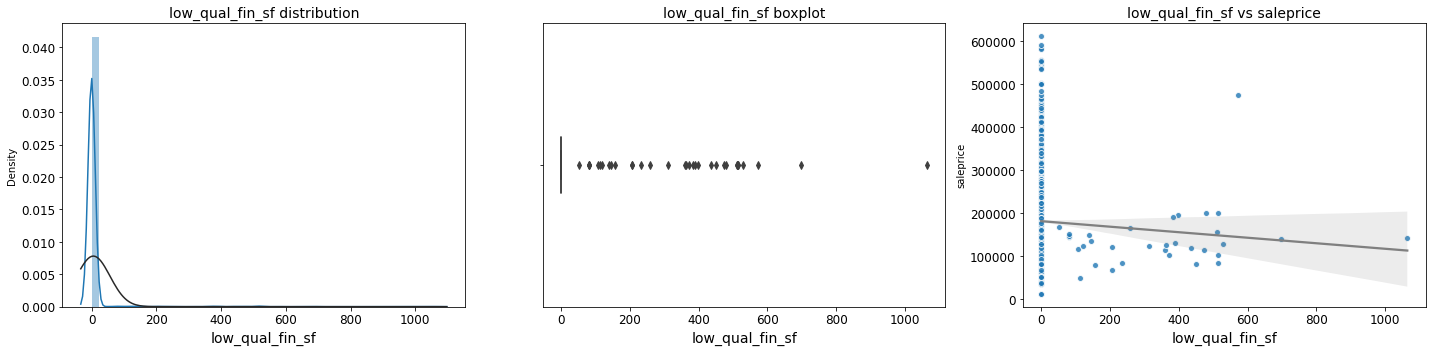

In [130]:
numeric_col_plots(train, ['low_qual_fin_sf'])

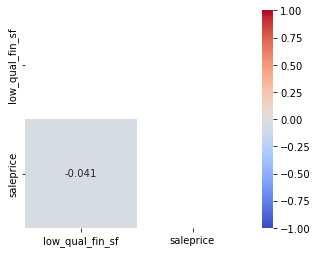

In [131]:
heatmap_small(train, ['low_qual_fin_sf', 'saleprice'])

Most houses have a value of 0 for this feature. It also has a very weak correlation with sale price. Thus we will not include this in our model.

In [132]:
drop_col(train, ['low_qual_fin_sf'])

### `gr_liv_area`

**`gr_liv_area`** (int64, continuous): Above grade (ground) living area square feet. This feature includes the area for both `1st_flr_sf` and `2nd_flr_sf`, thus making those columns redundant. ([source](https://www.gimme-shelter.com/above-grade-50066/))

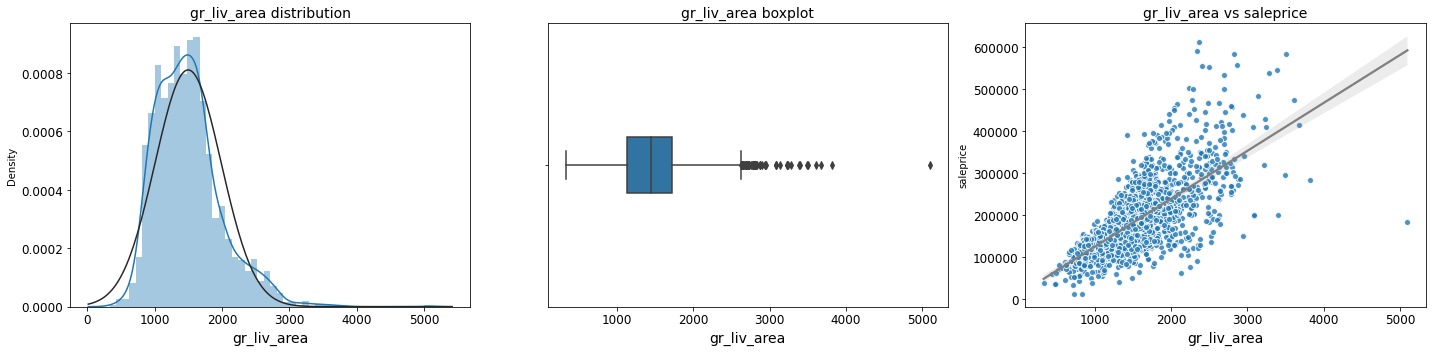

In [133]:
numeric_col_plots(train, ['gr_liv_area'])

We will remove the outlier.

In [134]:
train.drop(train[train['gr_liv_area'] > 4_500].index, inplace = True)

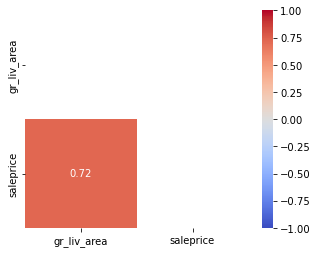

In [135]:
heatmap_small(train, ['gr_liv_area', 'saleprice'])

`gr_liv_area` is expectedly strongly correlated with `saleprice`, and thus a good predictor of sale price. The larger the house, the more expensive it is. We will include this feature in our model.

### `full_bath`

**`full_bath`** (int64, discrete): Number of full bathrooms above grade.

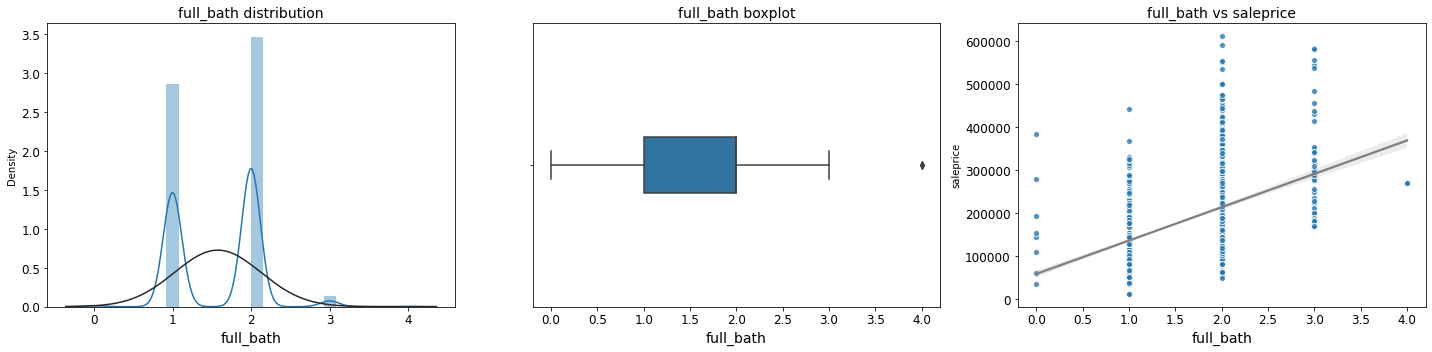

In [136]:
numeric_col_plots(train, ['full_bath'])

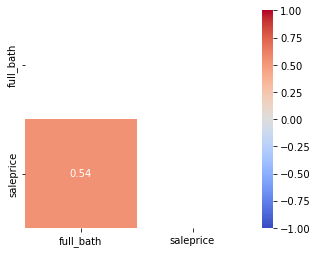

In [137]:
heatmap_small(train, ['full_bath', 'saleprice'])

As expected, the more full bathrooms there are, the higher the sale price. We could include this in our model.

### `half_bath`

**`half_bath`** (int64, discrete): Number of half bathrooms above grade.

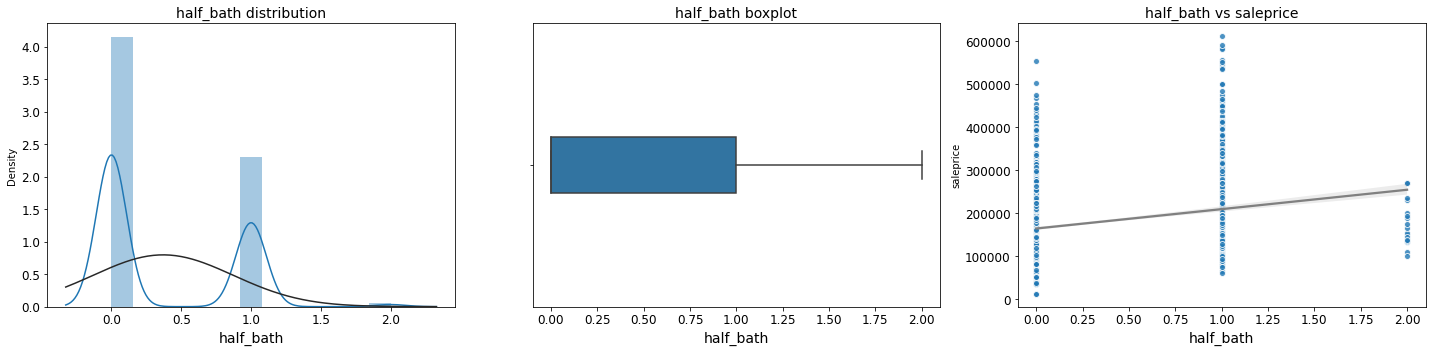

In [138]:
numeric_col_plots(train, ['half_bath'])

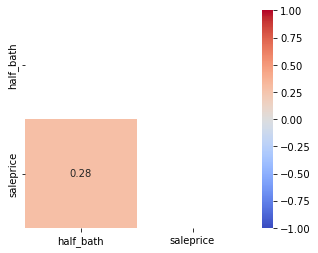

In [139]:
heatmap_small(train, ['half_bath', 'saleprice'])

Positive correlation with `saleprice`. We could include this in our model.

### `bedroom_abvgr`

**`bedroom_abvgr`** (int64, discrete): Number of bedrooms above grade (does NOT include basement bedrooms).

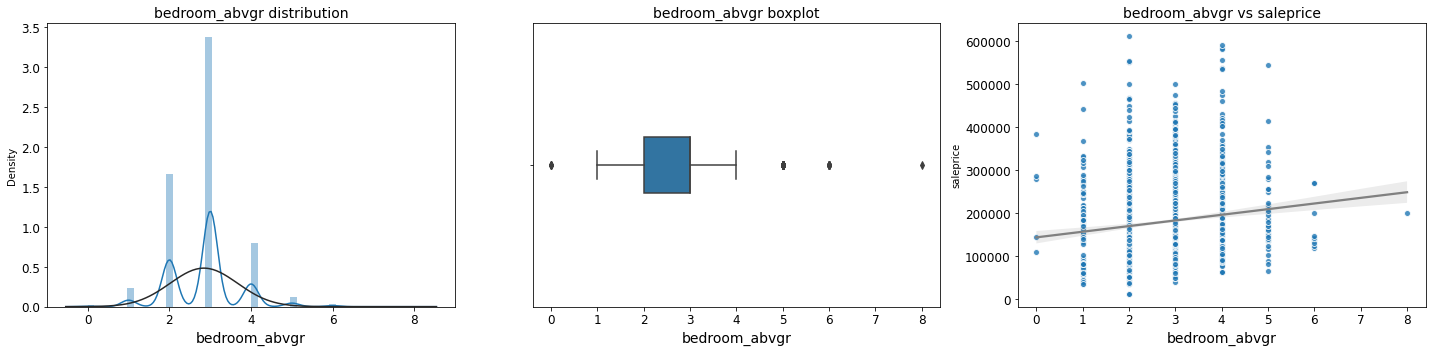

In [140]:
numeric_col_plots(train, ['bedroom_abvgr'])

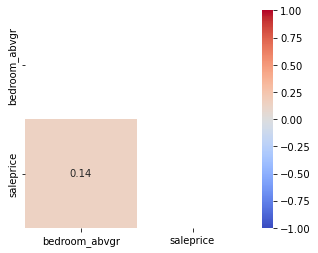

In [141]:
heatmap_small(train, ['bedroom_abvgr', 'saleprice'])

Expectedly positively correlated with sale price, although the correlation is not very strong. It might be because the more rooms there are, the smaller the rooms might get. Either way, 3 bedrooms seems to be a comfortable number for most people, and anything more than that would not raise the sle price any further. We could include this in our model.

### `kitchen_abvgr`

**`kitchen_abvgr`** (int64, discrete): Number of kitchens above grade.

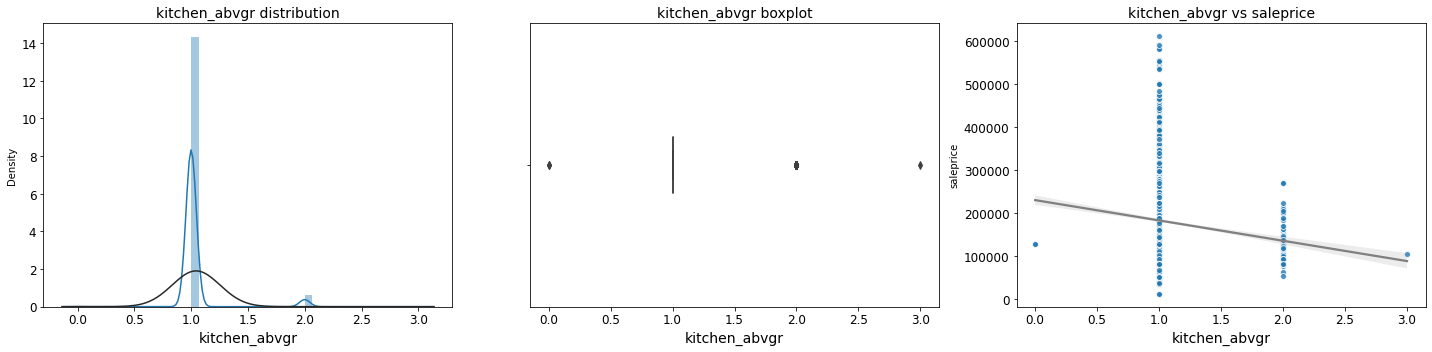

In [142]:
numeric_col_plots(train, ['kitchen_abvgr'])

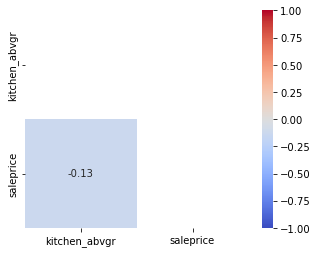

In [143]:
heatmap_small(train, ['kitchen_abvgr', 'saleprice'])

Interestingly, the number of kitchens is negatively correlated with sale price. This might mean that people generally do not need too many kitchens in their house, and any more than 1 would be undesirable and hurt the sale price. We will see if we could include this in our model later.

### `kitchen_qual`

**`kitchen_qual`** (object, ordinal): Kitchen quality.

In [144]:
to_ordinal_numeric(train, 'kitchen_qual', quality_dict)

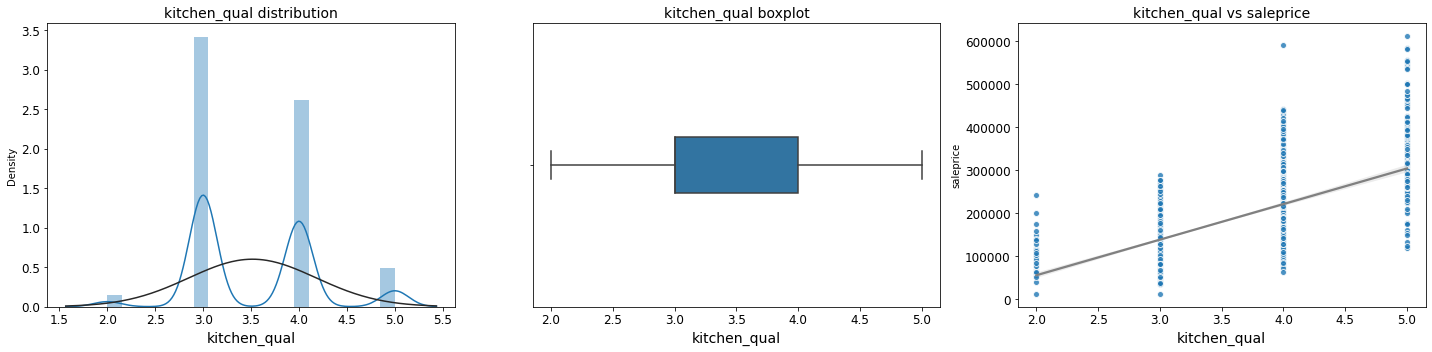

In [145]:
numeric_col_plots(train, ['kitchen_qual'])

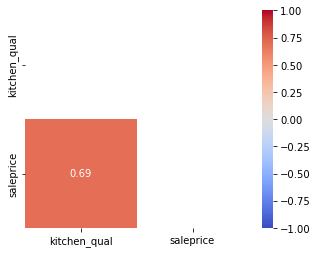

In [146]:
heatmap_small(train, ['kitchen_qual', 'saleprice'])

The kitchen quality is highly correlated with `saleprice`. We could include it in our model.

### `totrms_abvgrd`

**`totrms_abvgrd`** (int64, discrete): Total rooms above grade (does not include bathrooms).

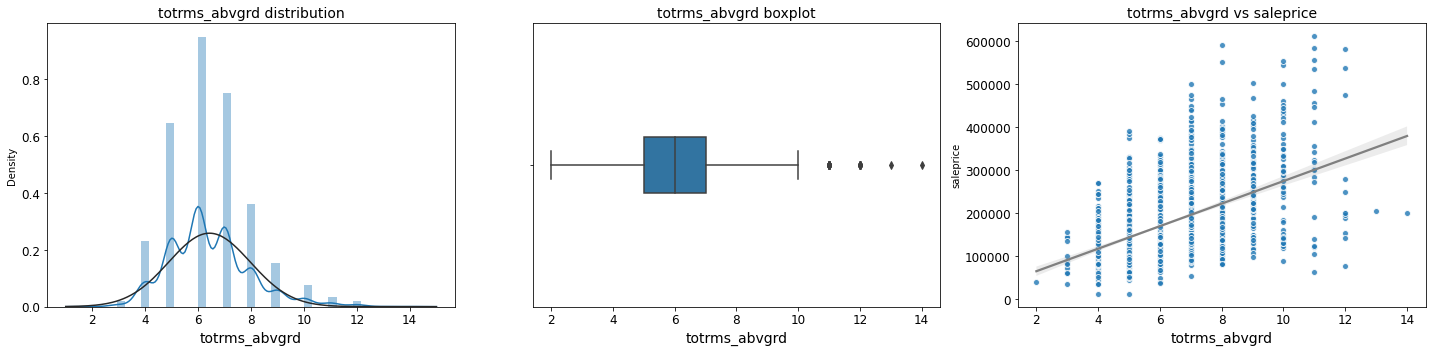

In [147]:
numeric_col_plots(train, ['totrms_abvgrd'])

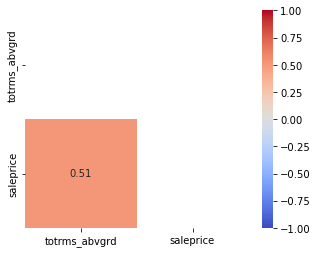

In [148]:
heatmap_small(train, ['totrms_abvgrd', 'saleprice'])

We could include `totrms_abvgrd` in our model as it is highly correlated to `sale_price`.

### `fireplaces`

**`fireplaces`** (int64, discrete): Number of fireplaces.

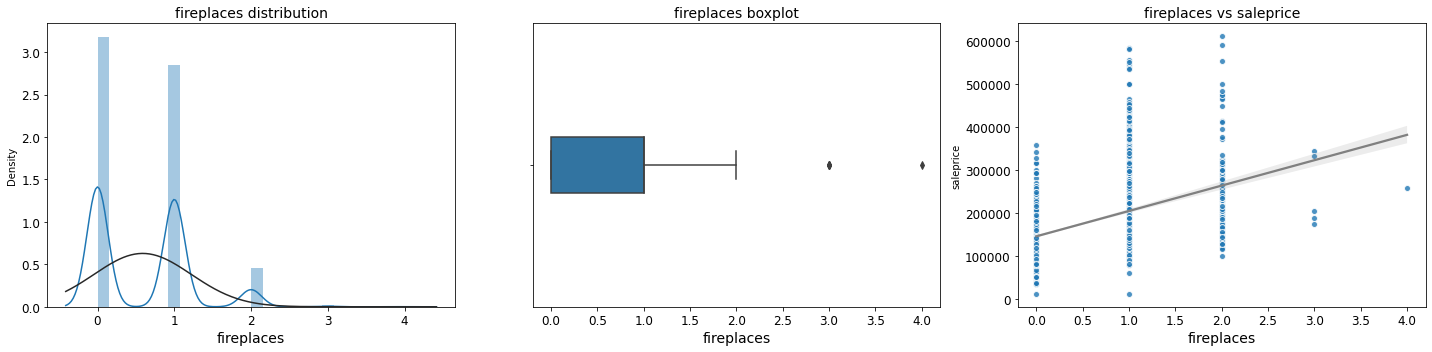

In [149]:
numeric_col_plots(train, ['fireplaces'])

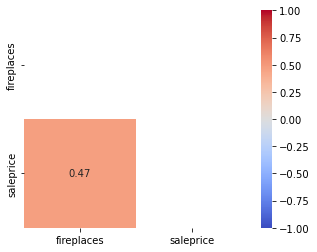

In [150]:
heatmap_small(train, ['fireplaces', 'saleprice'])

This feature is quite highly correlated with `saleprice`. With at least 1 fireplace in a house, the sale price would go up.

### `fireplace_qu`

**`fireplace_qu`** (object, ordinal): Fireplace quality. 1000 null values here, which we can fill in with 0 (after conversion to ordinal numeric).

In [151]:
to_ordinal_numeric(train, 'fireplace_qu', quality_dict)
fill_null_w_zero(train, ['fireplace_qu'])

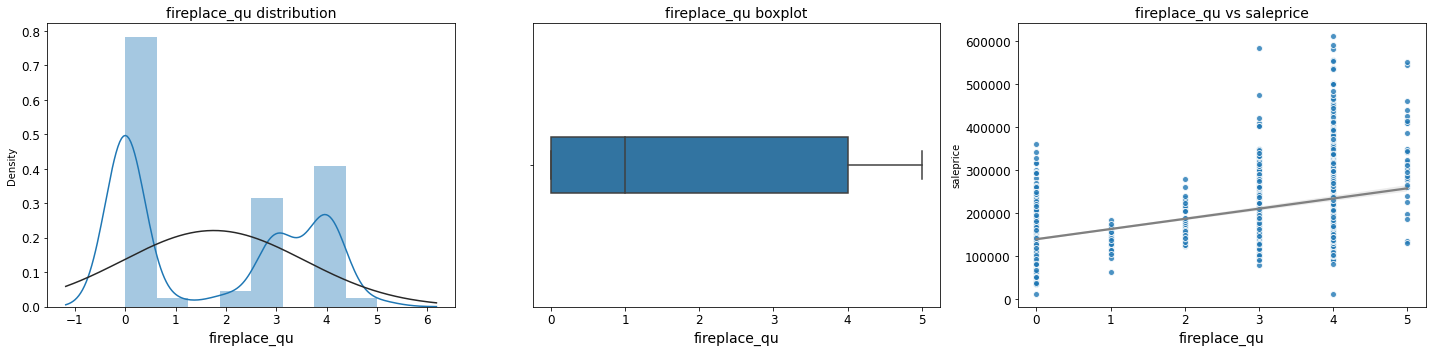

In [152]:
numeric_col_plots(train, ['fireplace_qu'])

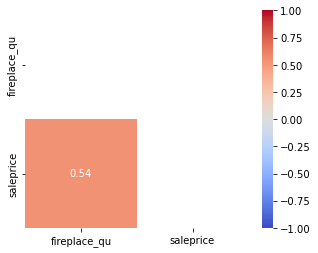

In [153]:
heatmap_small(train, ['fireplace_qu', 'saleprice'])

This feature is quite highly correlated with `saleprice`.

## Basement Features

- `bsmt_qual`
- `bsmt_cond`
- `bsmt_exposure`
- `bsmtfin_type_1`
- `bsmtfin_sf_1`
- `bsmtfin_type_2`
- `bsmtfin_sf_2`
- `bsmt_unf_sf`
- `total_bsmt_sf`
- `bsmt_full_bath`
- `bsmt_half_bath`

### `bsmt_qual`

**`bsmt_qual`** (object, ordinal): Evaluates the height of the basement. There are 55 null values here, same as `bsmt_cond`, which means no basement. We will input the null values with 0 (after converting to ordinal numeric values).

In [154]:
to_ordinal_numeric(train, 'bsmt_qual', quality_dict)
fill_null_w_zero(train, ['bsmt_qual'])

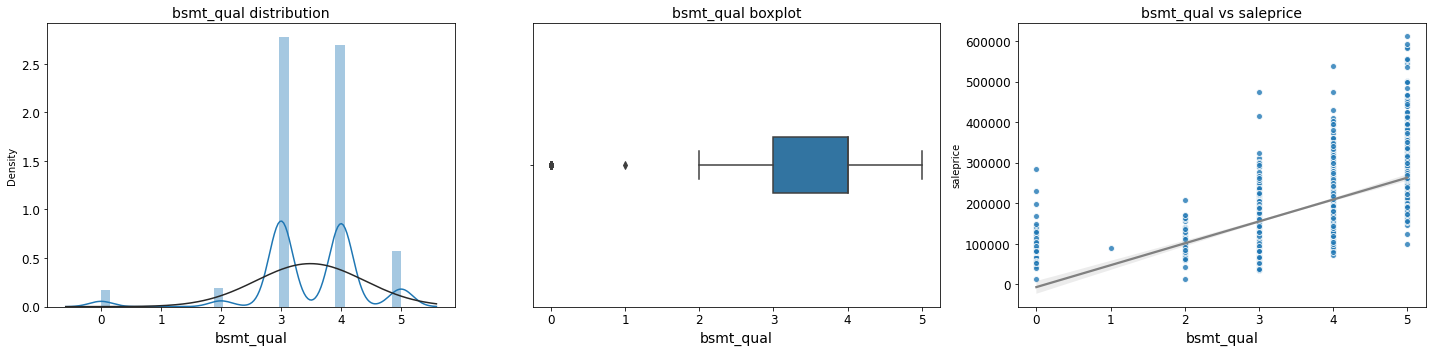

In [155]:
numeric_col_plots(train, ['bsmt_qual'])

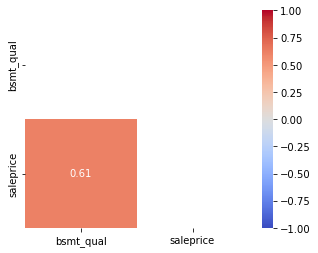

In [156]:
heatmap_small(train, ['bsmt_qual', 'saleprice'])

This feature is quite highly correlated with `saleprice`. Basements are considered a part of the house afterall.

### `bsmt_cond`

**`bsmt_cond`** (object, ordinal): Evaluates the general condition of the basement. There are 55 null values here, same as `bsmt_qual`, which means no basement. We will input the null values with 0 (after converting to ordinal numeric values).

In [157]:
to_ordinal_numeric(train, 'bsmt_cond', quality_dict)
fill_null_w_zero(train, ['bsmt_cond'])

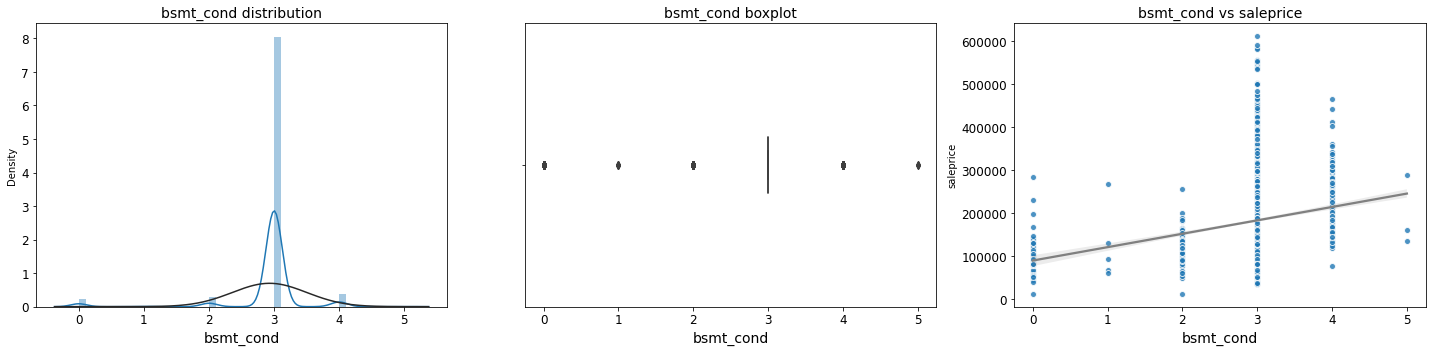

In [158]:
numeric_col_plots(train, ['bsmt_cond'])

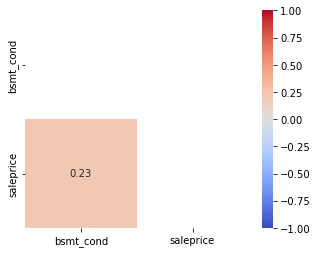

In [159]:
heatmap_small(train, ['bsmt_cond', 'saleprice'])

Positively correlated with `saleprice`, but not very strongly.

### `bsmt_exposure`

**`bsmt_exposure`** (object, ordinal): Refers to walkout or garden level walls. 58 null values here which means no basement, so we will input the null values with 0 (after converting to ordinal numeric). We will convert to ordinal numerical values.

In [160]:
bsmt_exposure_dict = {'Gd': 4,
                      'Av': 3,
                      'Mn': 2,
                      'No': 1,
                      'NA': 0}

to_ordinal_numeric(train, 'bsmt_exposure', bsmt_exposure_dict)

In [161]:
fill_null_w_zero(train, ['bsmt_exposure'])

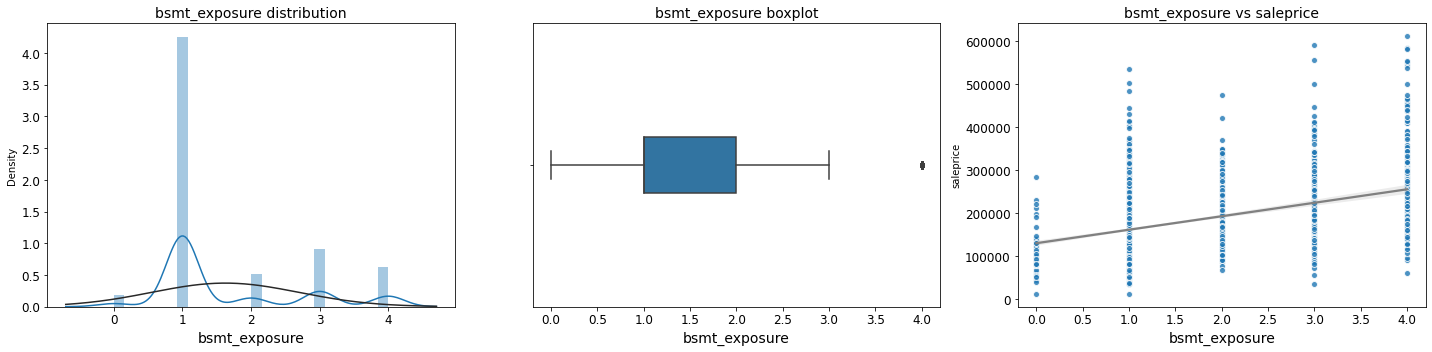

In [162]:
numeric_col_plots(train, ['bsmt_exposure'])

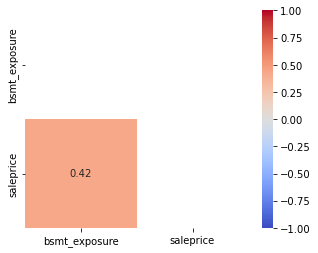

In [163]:
heatmap_small(train, ['bsmt_exposure', 'saleprice'])

Moderately correlated with `saleprice`. The more exposed a basement is, the more desirable it becomes.

### `bsmtfin_type_1`

**`bsmtfin_type_1`** (object, ordinal): Rating of basement finished area. 55 null values here, which means no basement. We will convert this column to ordinal numeric, and fill in null values with 0.

In [164]:
bsmtfin_dict = {'GLQ': 6,
                'ALQ': 5,
                'BLQ': 4,
                'Rec': 3,
                'LwQ': 2,
                'Unf': 1,
                'NA': 0}

to_ordinal_numeric(train, 'bsmtfin_type_1', bsmtfin_dict)
fill_null_w_zero(train, ['bsmtfin_type_1'])

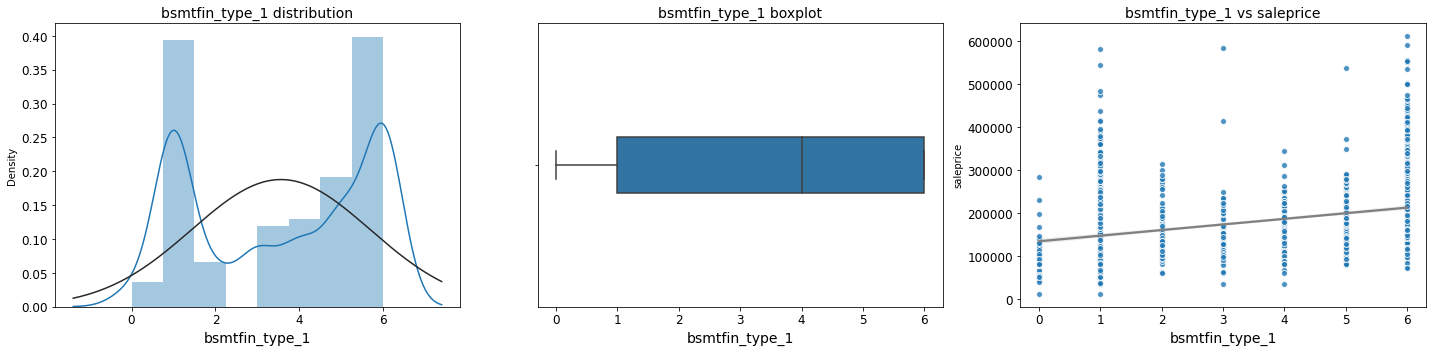

In [165]:
numeric_col_plots(train, ['bsmtfin_type_1'])

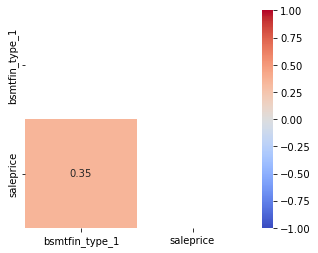

In [166]:
heatmap_small(train, ['bsmtfin_type_1', 'saleprice'])

Moderately correlated with `saleprice`. We could include this in our model.

### `bsmtfin_sf_1`

**`bsmtfin_sf_1`** (float64, continuous): Type 1 finished square feet. 1 null value here, which means no basement.

In [167]:
fill_null_w_zero(train, ['bsmtfin_sf_1'])

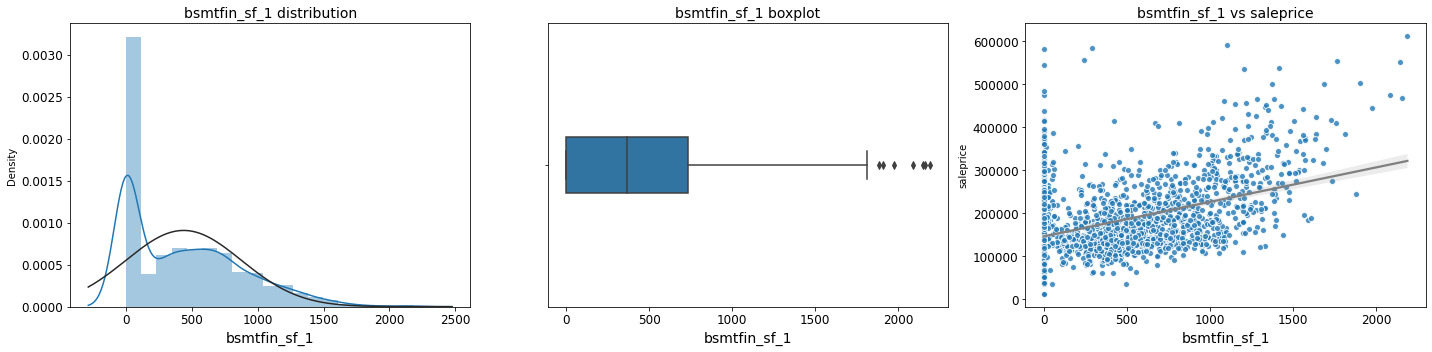

In [168]:
numeric_col_plots(train, ['bsmtfin_sf_1'])

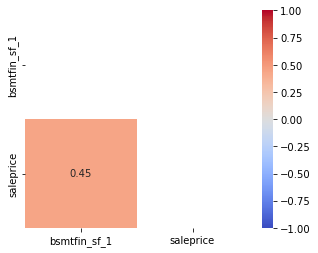

In [169]:
heatmap_small(train, ['bsmtfin_sf_1', 'saleprice'])

Moderately correlated with `saleprice`. However, we will be dropping this column as we will be using `total_bsmt_sf` for the basement area, and we do not want to "double count" any area of the basement.

In [170]:
drop_col(train, ['bsmtfin_sf_1'])

### `bsmtfin_type_2`

**`bsmtfin_type_2`** (object, ordinal): Rating of basement finished area (if multiple types). 56 null values here which means no basement. Will convert to ordinal numeric values and fill in nulls with 0.

In [171]:
to_ordinal_numeric(train, 'bsmtfin_type_2', bsmtfin_dict)
fill_null_w_zero(train, ['bsmtfin_type_2'])

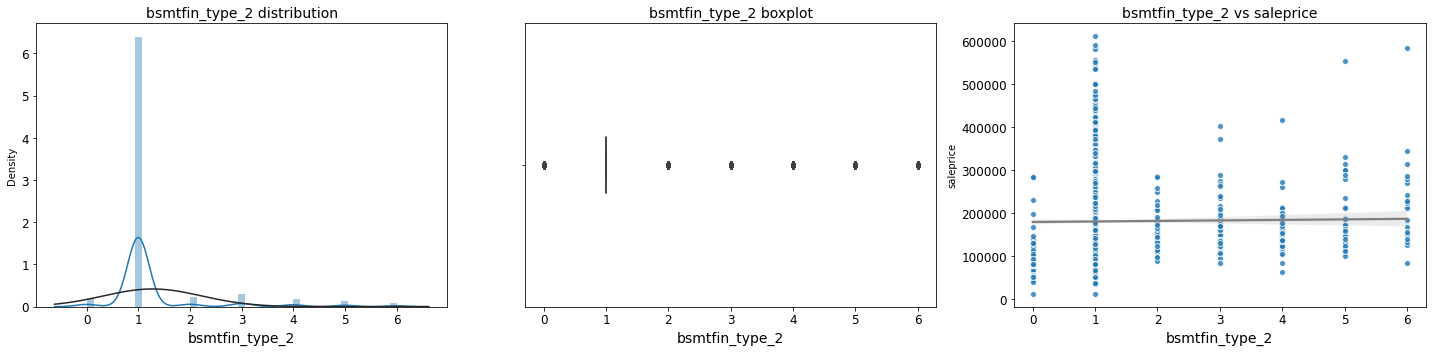

In [172]:
numeric_col_plots(train, ['bsmtfin_type_2'])

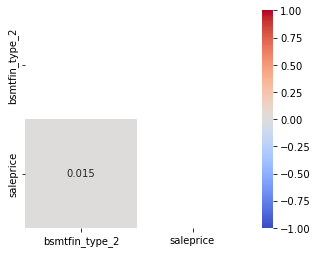

In [173]:
heatmap_small(train, ['bsmtfin_type_2', 'saleprice'])

Weak correlation with `saleprice`. Will not include this in the model.

In [174]:
drop_col(train, ['bsmtfin_type_2'])

### `bsmtfin_sf_2`

**`bsmtfin_sf_2`** (float64, continuous): Type 2 finished square feet. 1 null value here which means no basement.

In [175]:
fill_null_w_zero(train, ['bsmtfin_sf_2'])

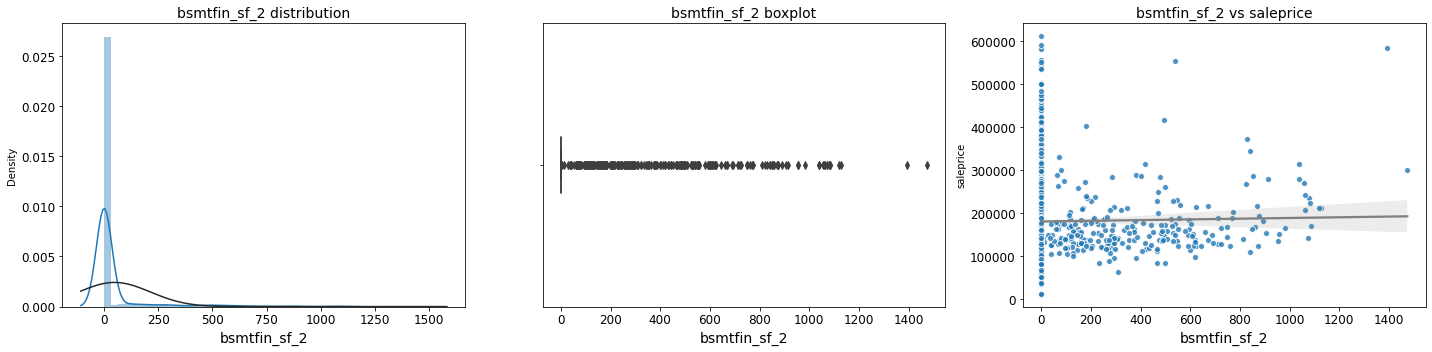

In [176]:
numeric_col_plots(train, ['bsmtfin_sf_2'])

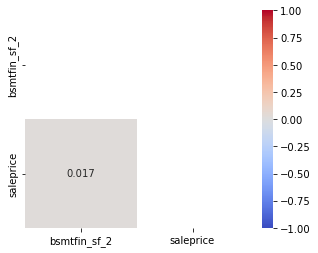

In [177]:
heatmap_small(train, ['bsmtfin_sf_2', 'saleprice'])

Weak correlation with `saleprice`. We will be dropping this column anyway as we will be using `total_bsmt_sf` for the basement area, and we do not want to "double count" any area of the basement.

In [178]:
drop_col(train, ['bsmtfin_sf_2'])

### `bsmt_unf_sf`

**`bsmt_unf_sf`** (float64, continuous): Unfinished square feet of basement area. 1 null value here which means no basement.

In [179]:
fill_null_w_zero(train, ['bsmt_unf_sf'])

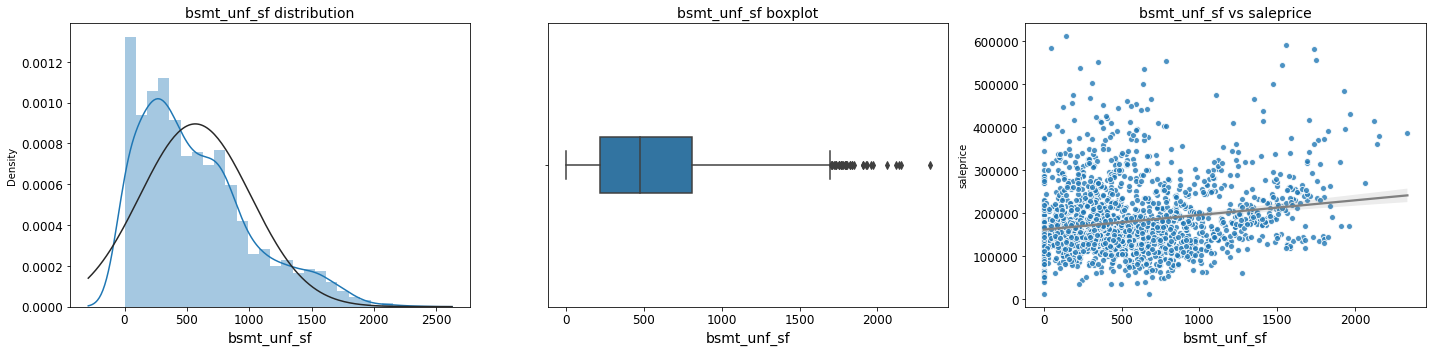

In [180]:
numeric_col_plots(train, ['bsmt_unf_sf'])

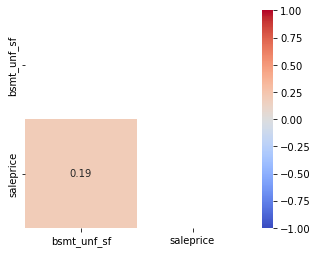

In [181]:
heatmap_small(train, ['bsmt_unf_sf', 'saleprice'])

Poorly correlated with `saleprice`. We will be dropping this column anyway as we will be using `total_bsmt_sf` for the basement area, and we do not want to "double count" any area of the basement.

In [182]:
drop_col(train, ['bsmt_unf_sf'])

### `total_bsmt_sf`

**`total_bsmt_sf`** (float64, continuous): Total square feet of basement area. 1 null value here means no basement.

In [183]:
fill_null_w_zero(train, ['total_bsmt_sf'])

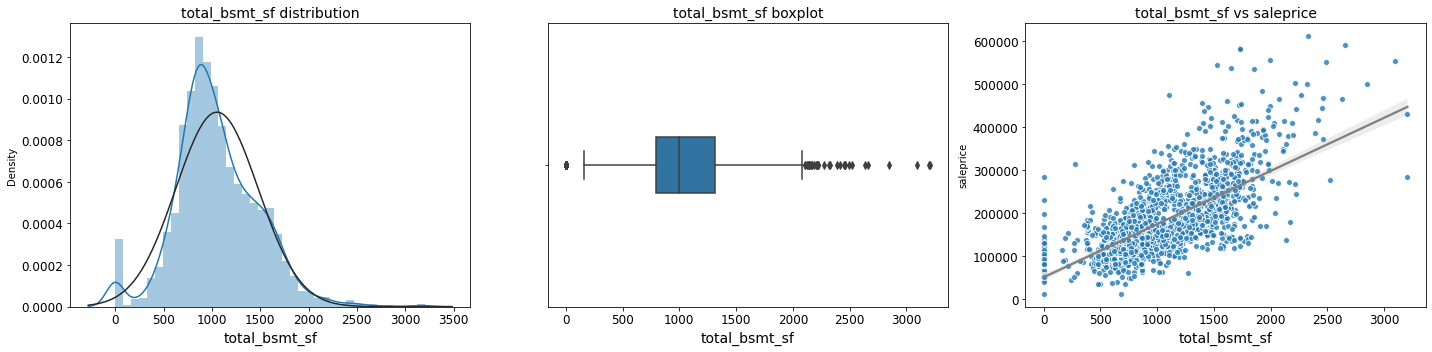

In [184]:
numeric_col_plots(train, ['total_bsmt_sf'])

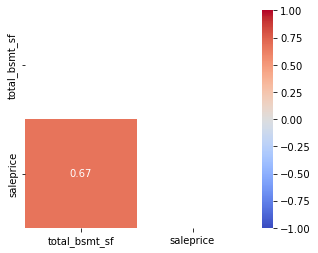

In [185]:
heatmap_small(train, ['total_bsmt_sf', 'saleprice'])

Strong correlation to `saleprice` as expected. We will be using this column for total area of basement to input into our model, so we will not be using previous other basement area features.

### `bsmt_full_bath`

**`bsmt_full_bath`** (float64, discrete): The number of basement full bathrooms. 2 null values, which we can fill in as 0, no basement full bathrooms. We will input 0 in null values.

In [186]:
fill_null_w_zero(train, ['bsmt_full_bath'])

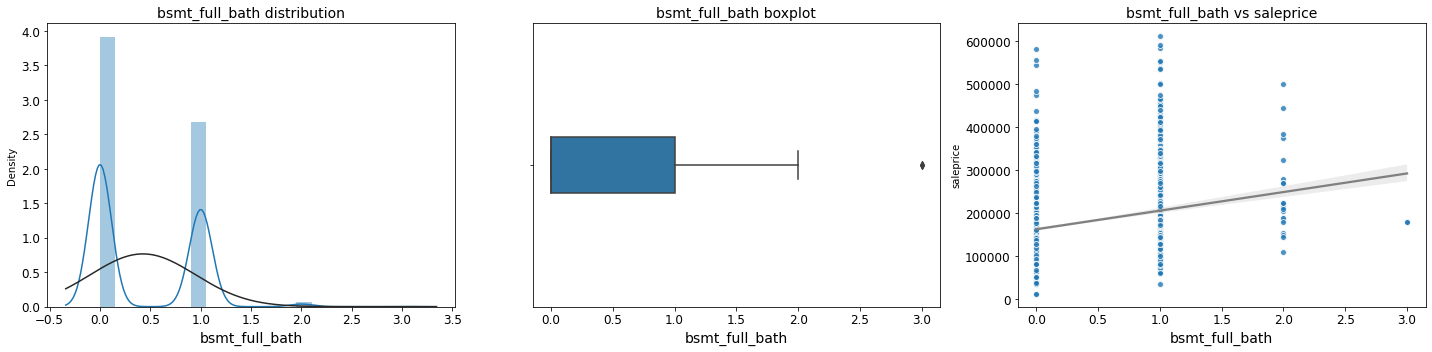

In [187]:
numeric_col_plots(train, ['bsmt_full_bath'])

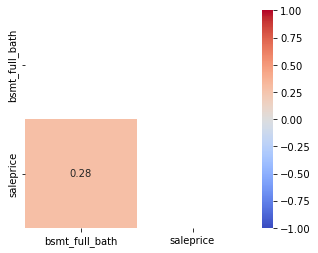

In [188]:
heatmap_small(train, ['bsmt_full_bath', 'saleprice'])

Moderate correlation with `saleprice`. We could include this in our model.

### `bsmt_half_bath`

**`bsmt_half_bath`** (float64, discrete): The number of basement half bathrooms. 2 null values, which we can fill in as 0, no basement half bathrooms. We will input 0 in null values.

In [189]:
fill_null_w_zero(train, ['bsmt_half_bath'])

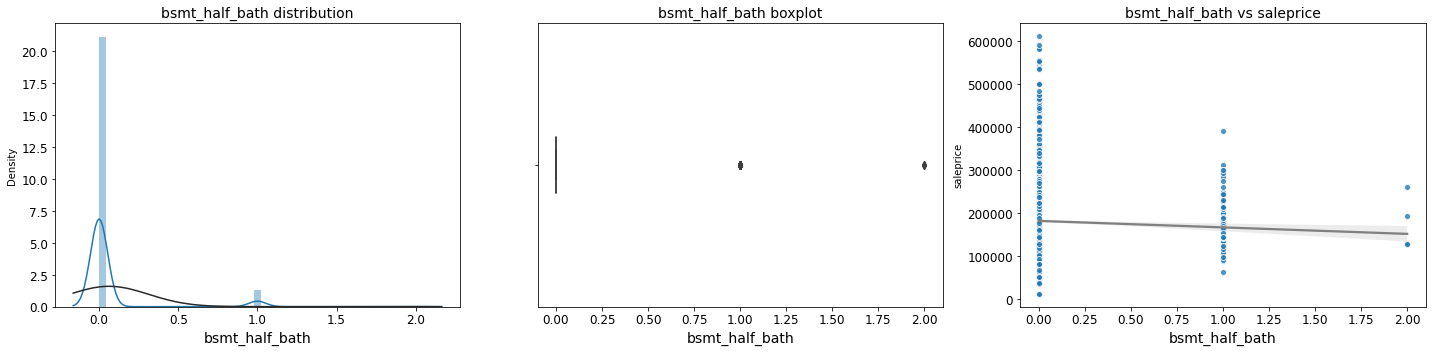

In [190]:
numeric_col_plots(train, ['bsmt_half_bath'])

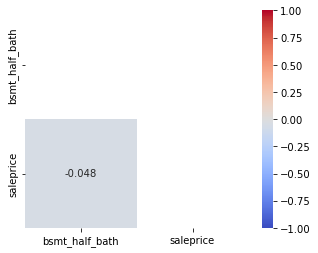

In [191]:
heatmap_small(train, ['bsmt_half_bath', 'saleprice'])

This is a confusing column, where the graphs show a negative correlation with sale price. In reality, should this feature positively or negatively correlate with sale price? With `bsmt_full_bath`, the data in this column may also cause a clash of information and thus model inaccuracy, even so when 93.8% of the values are 0. Will not use this feature in our model.

In [192]:
drop_col(train, ['bsmt_half_bath'])

## Garage Features

- `garage_type`
- `garage_yr_blt`
- `garage_finish`
- `garage_cars`
- `garage_area`
- `garage_qual`
- `garage_cond`

### `garage_type`

**`garage_type`** (object, nominal): Garage location. 113 locations here which we can fill in with 'None' (no garage).

In [193]:
fill_null_w_none(train, ['garage_type'])

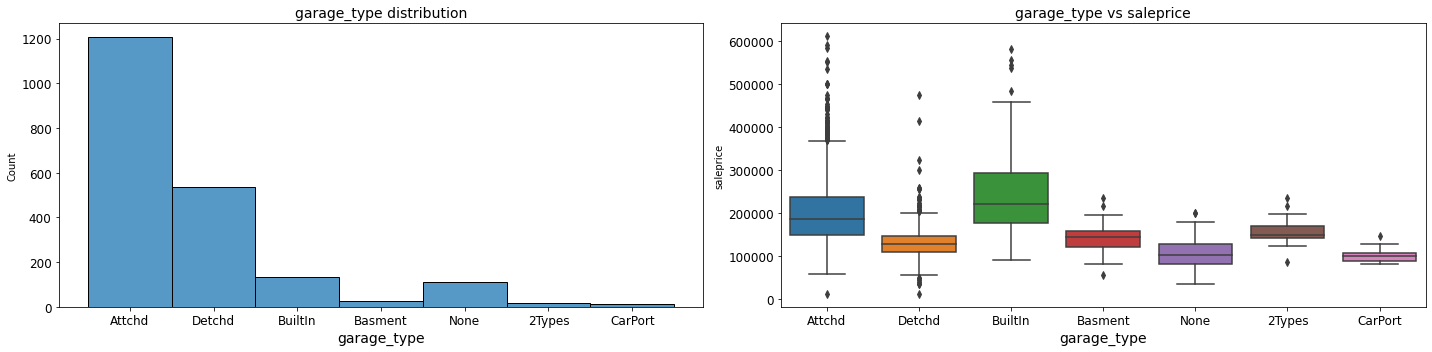

In [194]:
categorical_col_plots(train, ['garage_type'])

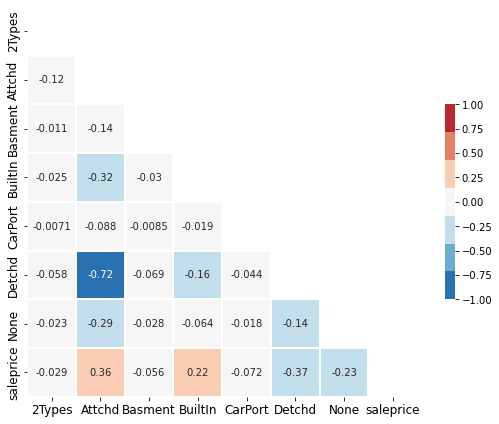

In [195]:
heatmap_all_cols(dummify(train, 'garage_type'), width = 8, height = 6)

Some of the values in this categorical feature have very different correlation with `saleprice`. However due to multicollinearity of "None", we have to drop this column to avoid causing of problems when we fit the model and intepret the results. Besides, they have relatively low correlation with sale price.

In [196]:
drop_col(train, ['garage_type'])

### `garage_yr_blt`

**`garage_yr_blt`** (float64, discrete): Year garage was built. 114 null values, which most likely mean either the houses have no garage, or their garages were built at the same time as the house. Not too sure what to fill the null values with for now, so lets check out the data in this column first.

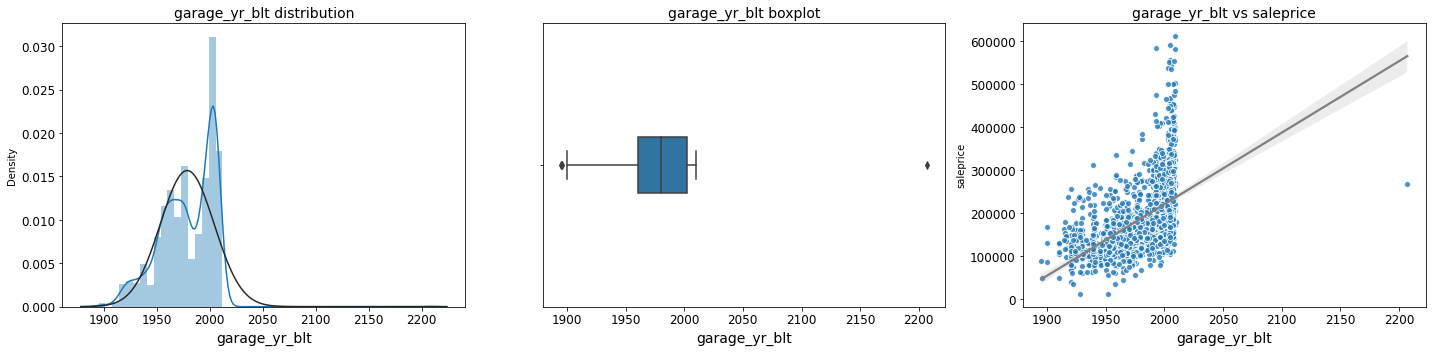

In [197]:
numeric_col_plots(train, ['garage_yr_blt'])

There is an erroneous data point with value of year later than 2200. There are many values near the year 2000, which may mean most garages were built at the same time as the houses. That would make the model inaccurate with 2 features counting the same values. Moreover, those 114 null values which might mean no garage in those houses, we do not know what to fill them with. Thus we will not be using this feature as there are far too many problems with it.

In [198]:
drop_col(train, ['garage_yr_blt'])

### `garage_finish`

**`garage_finish`** (object, ordinal): Interior finish of the garage. 114 null values, which we can input as 0 (after conversion to ordinal numeric).

In [199]:
garage_fin_dict = {'Fin': 3,
                   'RFn': 2,
                   'Unf': 1,
                   'None': 0}

to_ordinal_numeric(train, 'garage_finish', garage_fin_dict)
fill_null_w_zero(train, ['garage_finish'])

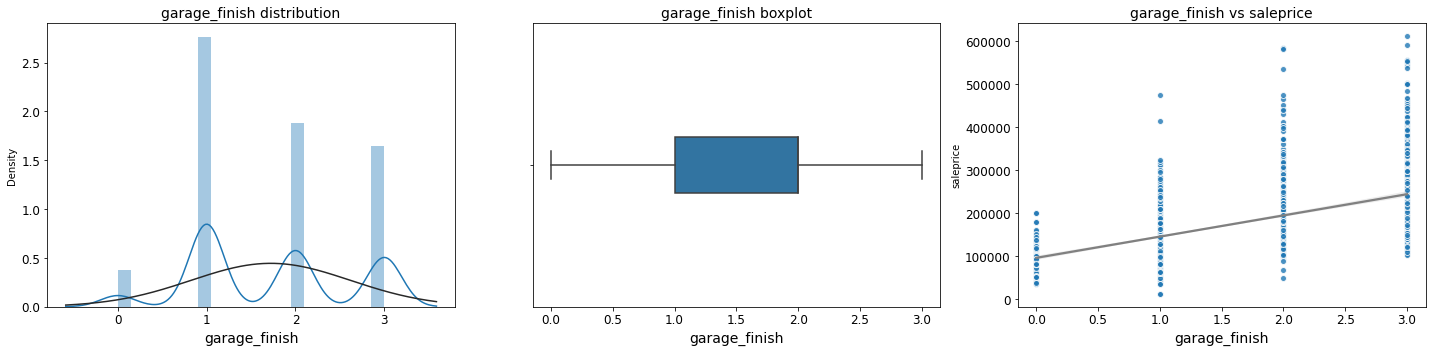

In [200]:
numeric_col_plots(train, ['garage_finish'])

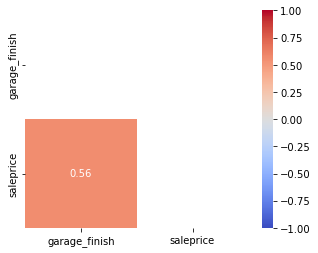

In [201]:
heatmap_small(train, ['garage_finish', 'saleprice'])

This could be decent for the model at quite a high correlation with `saleprice`.

### `garage_cars`

**`garage_cars`** (float64, discrete): Size of garage in car capacity. 1 null value. This column will be dropped as it is collinear with `garage_area`.

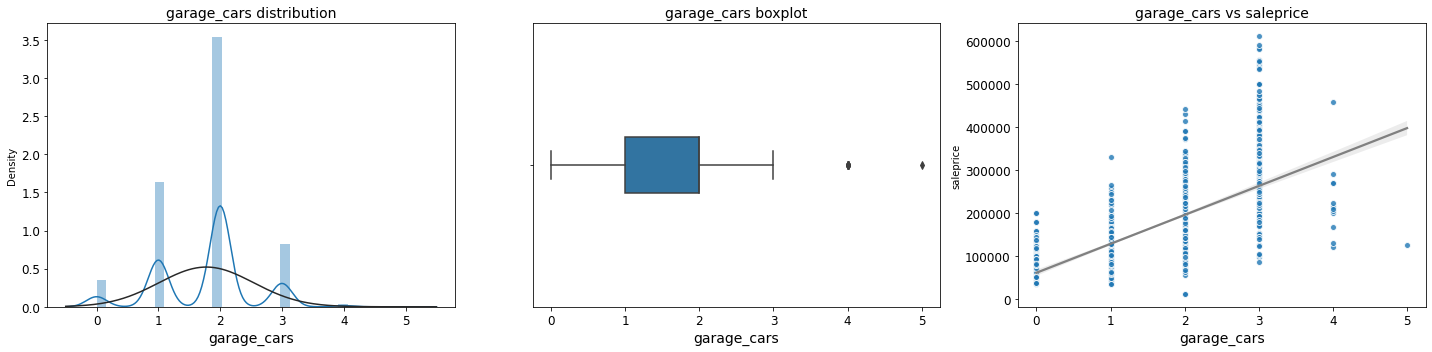

In [202]:
numeric_col_plots(train, ['garage_cars'])

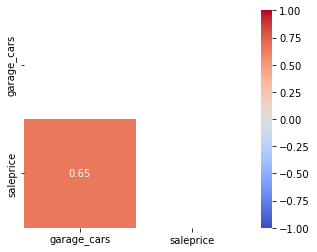

In [203]:
heatmap_small(train, ['garage_cars', 'saleprice'])

This feature is collinear with `garage_area`. As we will be using `garage_area` already, we will not be using this feature in our model. We will explore more about collinearity later.

### `garage_area`

**`garage_area`** (float64, continuous): Size of garage in square feet. 1 null value which we can input as 0.

In [204]:
fill_null_w_zero(train, ['garage_area'])

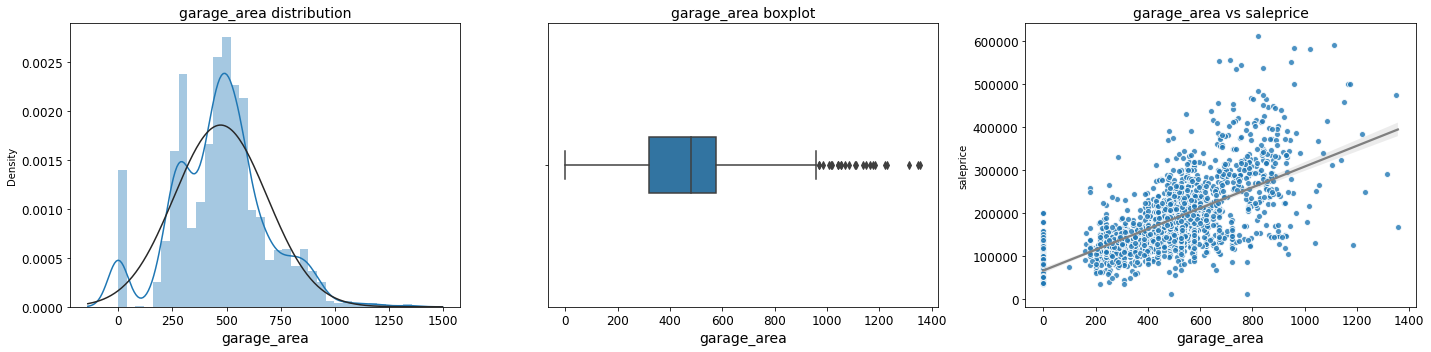

In [205]:
numeric_col_plots(train, ['garage_area'])

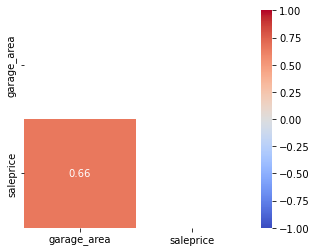

In [206]:
heatmap_small(train, ['garage_area', 'saleprice'])

Very good correlation with `saleprice`. We can include this in our model. We choose to use this over `garage_cars` as we feel it is better to measure the garage with the exact area rather than using an approximate with car capacity, as different cars have different sizes.

### `garage_qual`

**`garage_qual`** (object, ordinal): Garage quality. 114 null values which we can input as 'None'. We will be converting this to ordinal numeric values.

In [207]:
to_ordinal_numeric(train, 'garage_qual', quality_dict)
fill_null_w_zero(train, ['garage_qual'])

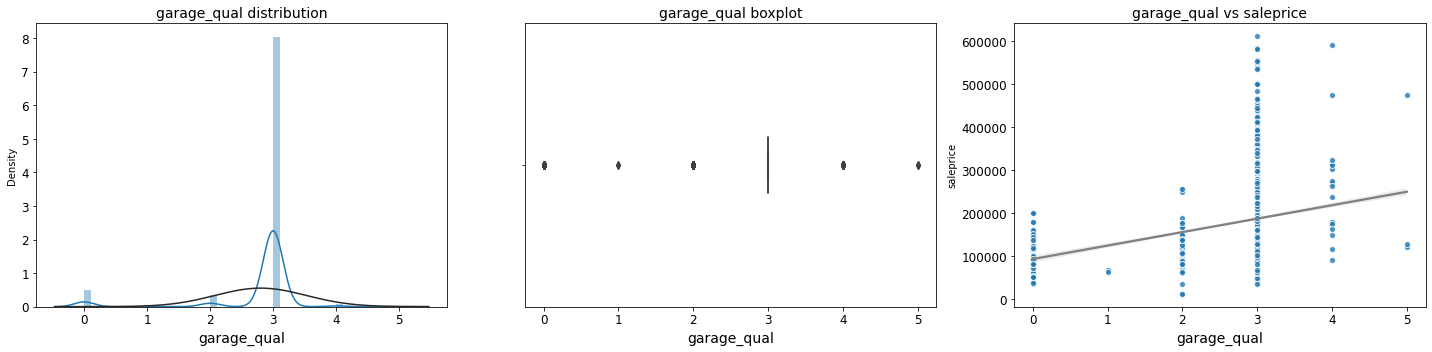

In [208]:
numeric_col_plots(train, ['garage_qual'])

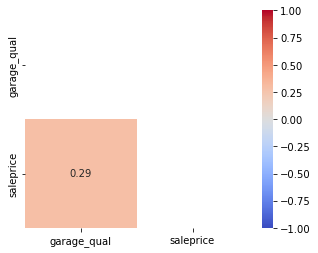

In [209]:
heatmap_small(train, ['garage_qual', 'saleprice'])

Decent correlation with `saleprice`. We could include this in our model.

### `garage_cond`

**`garage_cond`** (object, ordinal): Garage condition. 114 null values.

In [210]:
to_ordinal_numeric(train, 'garage_cond', quality_dict)
fill_null_w_zero(train, ['garage_cond'])

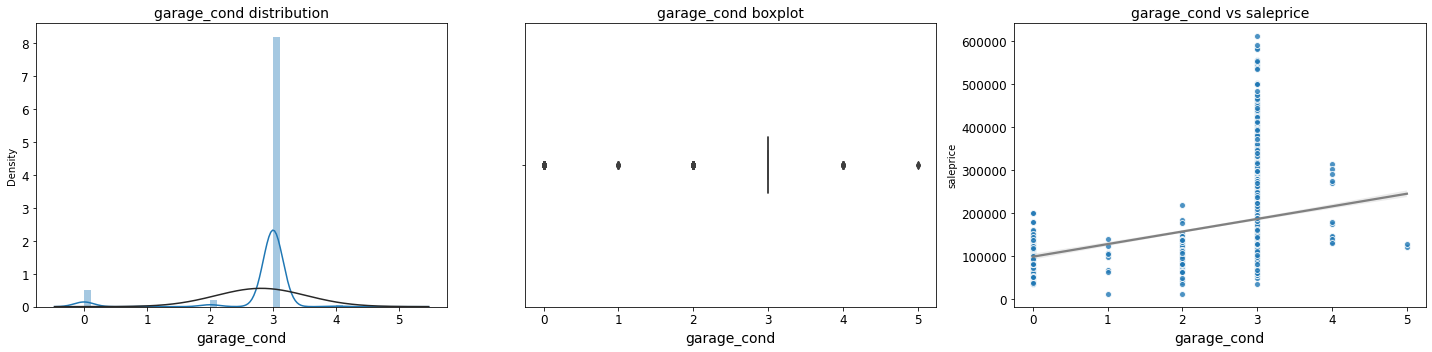

In [211]:
numeric_col_plots(train, ['garage_cond'])

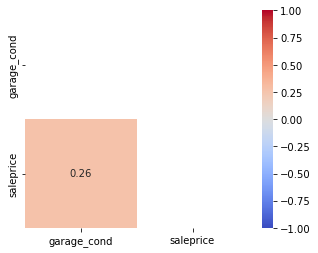

In [212]:
heatmap_small(train, ['garage_cond', 'saleprice'])

We will be dropping this column as it is collinear with `garage_qual`. We will explore more about collinearity later.

## Deck and Porch Features

- `wood_deck_sf`
- `open_porch_sf`
- `enclosed_porch`
- `3ssn_porch`
- `screen_porch`

### `wood_deck_sf`

**`wood_deck_sf`** (int64, continuous): Wood deck area in square feet.

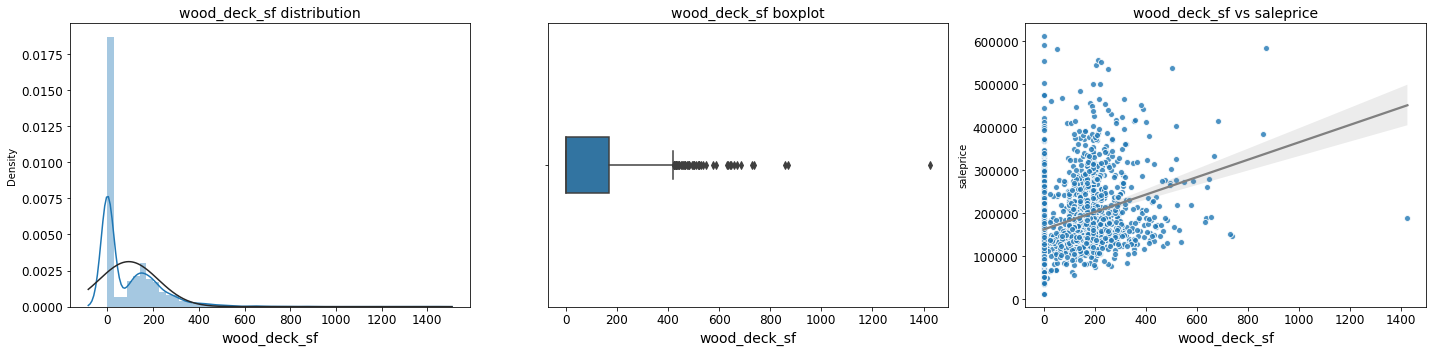

In [213]:
numeric_col_plots(train, ['wood_deck_sf'])

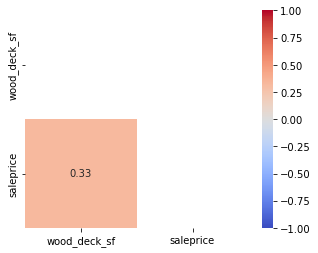

In [214]:
heatmap_small(train, ['wood_deck_sf', 'saleprice'])

We are going to take out the extreme outlier, and use winsorization method.

In [215]:
train.drop(train[train['wood_deck_sf'] > 1_000].index, inplace = True)

In [216]:
train['wood_deck_sf'] = winsorize(train['wood_deck_sf'], limits = 0.025)

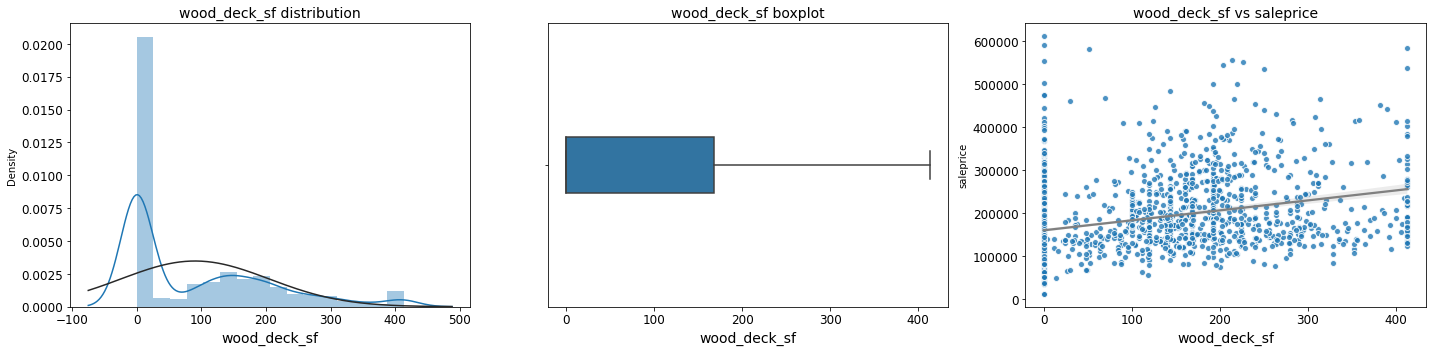

In [217]:
numeric_col_plots(train, ['wood_deck_sf'])

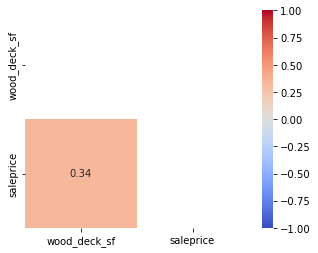

In [218]:
heatmap_small(train, ['wood_deck_sf', 'saleprice'])

Very slight improvement to correlation, and outliers are all accounted for. May consider using it in model.

### `open_porch_sf`, `enclosed_porch`, `3ssn_porch` and `screen_porch`

**`open_porch_sf`** (int64, continuous): Open porch area in square feet.

**`enclosed_porch`** (int64, continuous): Enclosed porch area in square feet.

**`3ssn_porch`** (int64, continuous): Three season porch area in square feet.

**`screen_porch`** (int64, continuous): Screen porch area in square feet.

Many houses in this dataset do not have any of the 4 different porch features. In reality, houses with one or more of these porches should mean increased sale price, however, `enclosed_porch` showed a negative correlation with sale price.

We will be combining the area of all porches into one single feature: `total_porch_area`. We want to see if combining the features would create a greater significance in correlation to sale price.

In [219]:
# combining all porches areas
train['total_porch_area'] = train['open_porch_sf'] + train['enclosed_porch'] + \
                            train['3ssn_porch'] + train['screen_porch']

In [220]:
# using winsorize method to take care of the outliers
train['total_porch_area'] = winsorize(train['total_porch_area'], limits = 0.025)

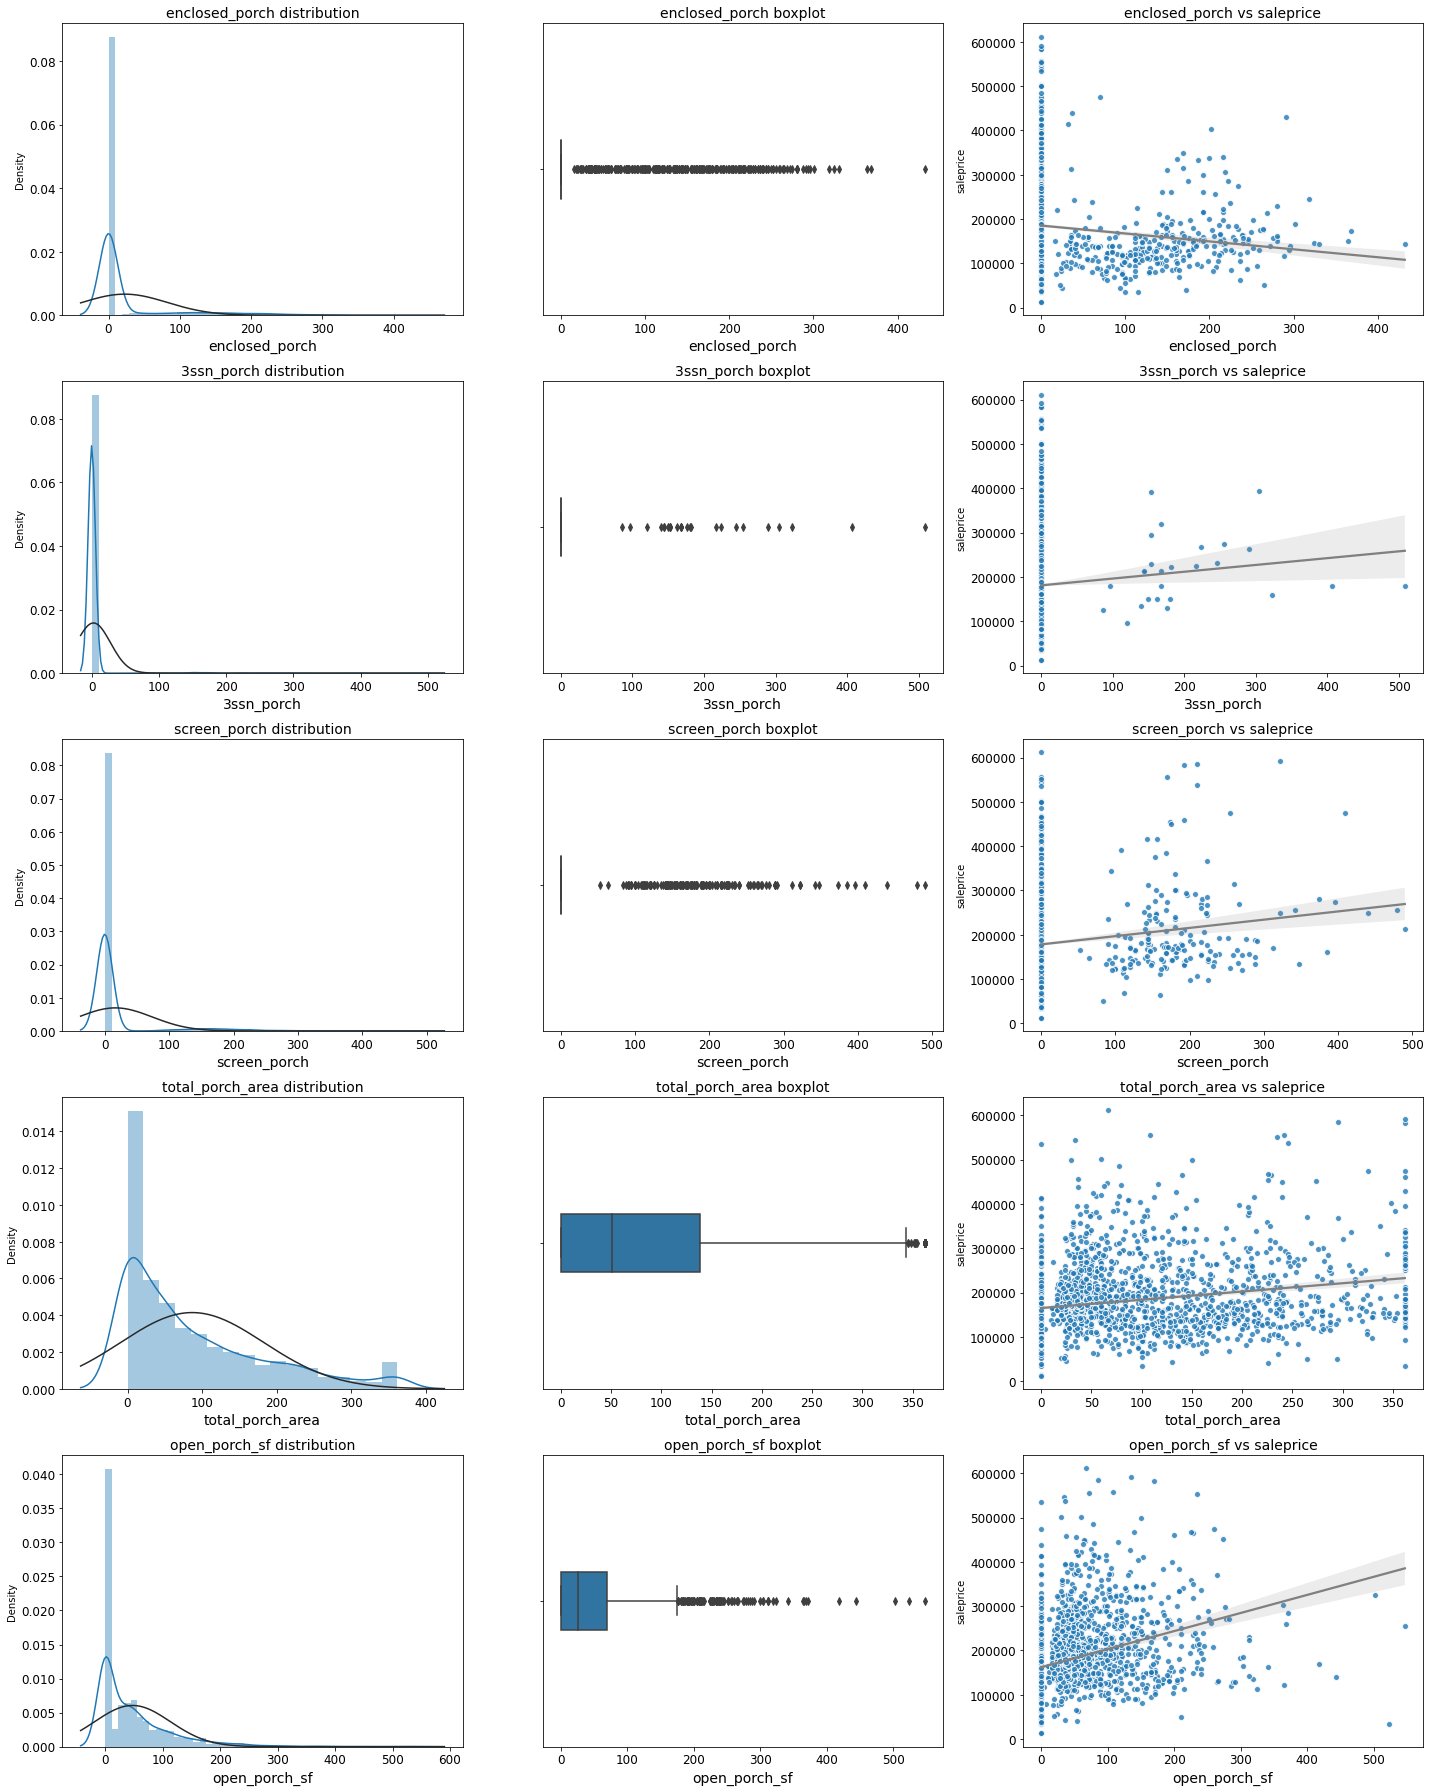

In [221]:
# plotting all porches to compare with total_porch_area
numeric_col_plots(train, ['open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'total_porch_area'])

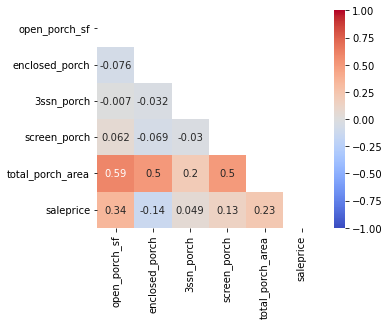

In [222]:
heatmap_small(train, ['open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'total_porch_area', 'saleprice'])

`total_porch_area` is positively correlated to sale price, as it should be. We could include it in our model. As a sum of all the area of the porches, we can then drop all other porch features as we want to avoid 'double counting' in our model.

In [223]:
drop_col(train, ['open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch'])

## Utility Features

- `utilities`
- `heating`
- `heating_qc`
- `central_air`
- `electrical`

### `utilities`

**`utilities`** (object, ordinal): Type of utilities available. This column will be dropped as 99.9% are the same value.

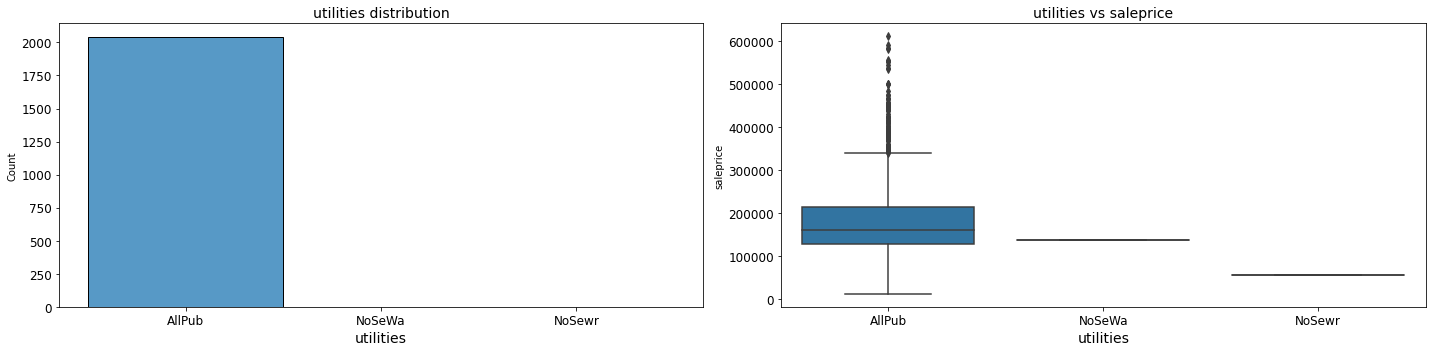

In [224]:
categorical_col_plots(train, ['utilities'])

In [225]:
drop_col(train, ['utilities'])

### `heating`

**`heating`** (object, nominal): Type of heating. This column will be dropped as 98.4% are the same value.

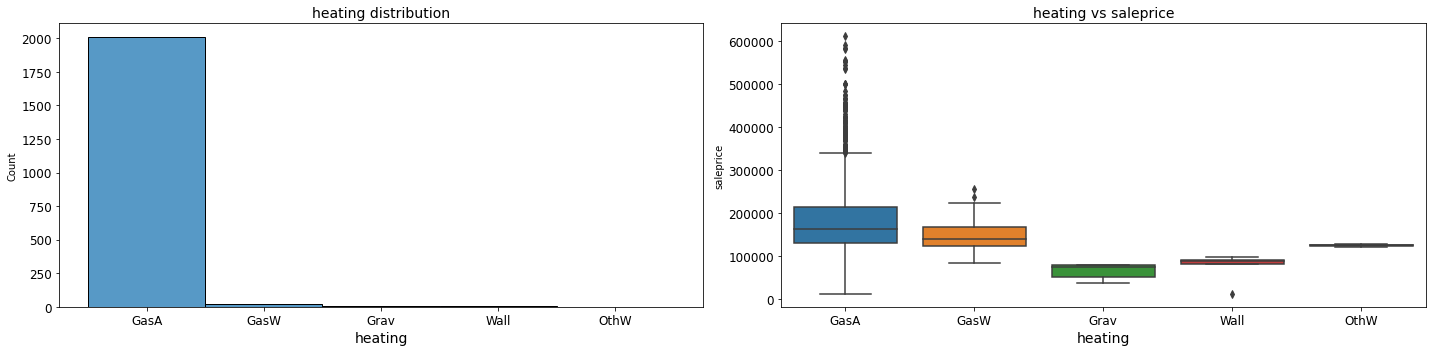

In [226]:
categorical_col_plots(train, ['heating'])

In [227]:
drop_col(train, ['heating'])

### `heating_qc`

**`heating_qc`** (object, ordinal): Heating quality and condition. Convert to ordinal numeric first.

In [228]:
to_ordinal_numeric(train, 'heating_qc', quality_dict)

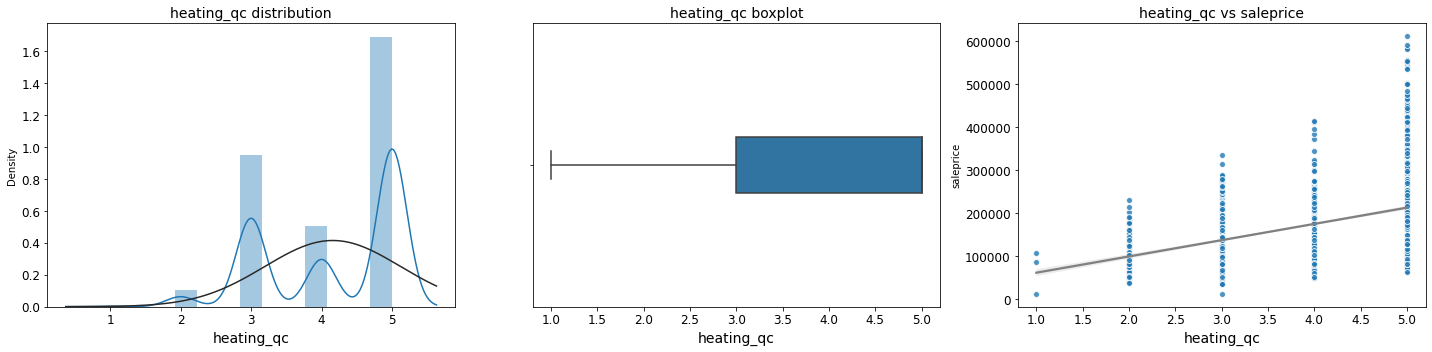

In [229]:
numeric_col_plots(train, ['heating_qc'])

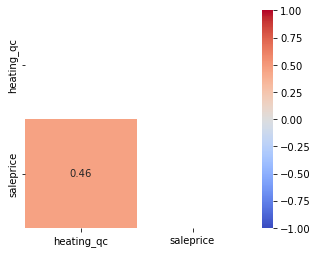

In [230]:
heatmap_small(train, ['heating_qc', 'saleprice'])

Quite good correlation with `saleprice`. We could include this in our model.

### `central_air`

**`central_air`** (object, nominal): Central air conditioning.

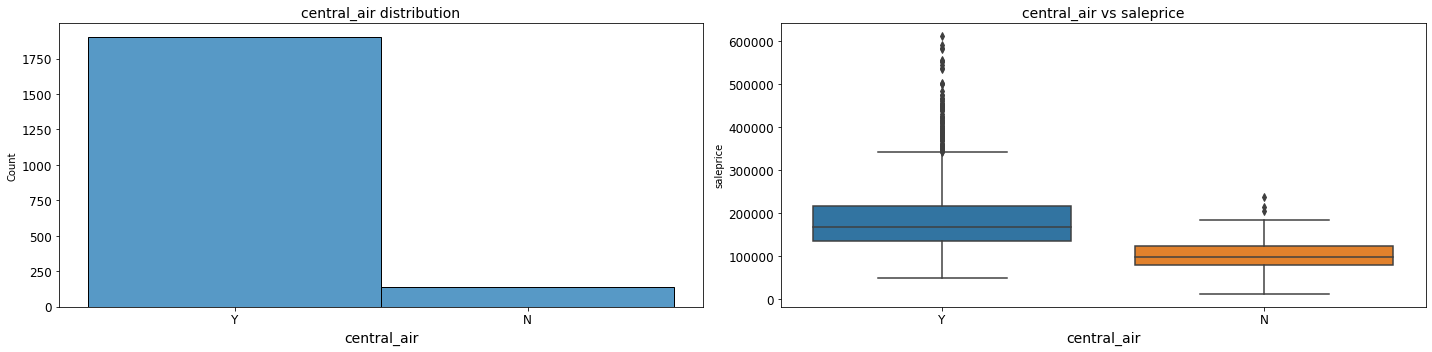

In [231]:
categorical_col_plots(train, ['central_air'])

From the boxplot, it seems like houses with central air conditioning had higher sale price than houses without.

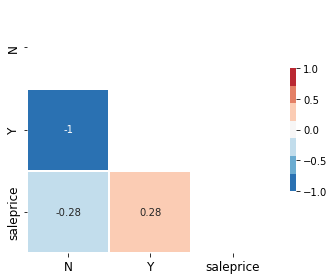

In [232]:
heatmap_all_cols(dummify(train, 'central_air'), width = 5, height = 4)

Each feature from this column have direct opposite correlation with `saleprice`. Seems like people prefer central air conditioning. Due to the relatively low correlation with sale price, considering we already have many high features with high correlation with sale price, we will drop this column.

In [233]:
drop_col(train, ['central_air'])

### `electrical`

**`electrical`** (object, ordinal): Description of the electrical system in the houses. We will convert the values to ordinal numeric first.

In [234]:
elect_dict = {'SBrkr': 4,
              'FuseA': 3,
              'FuseF': 2,
              'FuseP': 1,
              'Mix': 0}

to_ordinal_numeric(train, 'electrical', elect_dict)

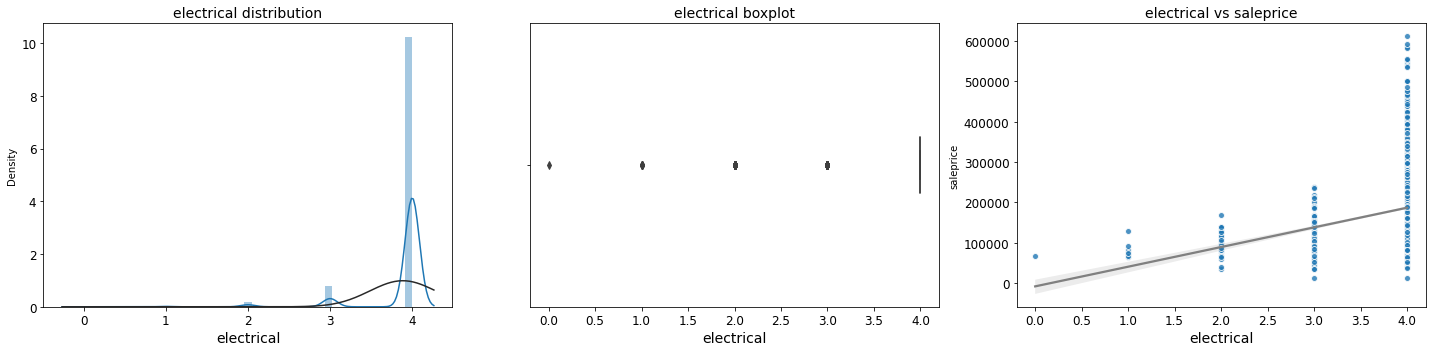

In [235]:
numeric_col_plots(train, ['electrical'])

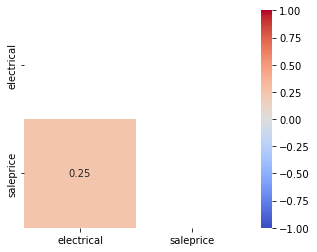

In [236]:
heatmap_small(train, ['electrical', 'saleprice'])

Decent correlation with `saleprice`. We could include this in our model. A good or bad electrical system could affect the house a lot.

## Extra and Misc Features

- `pool_area`
- `pool_qc`
- `fence`
- `misc_feature`
- `misc_val`

### `pool_area`

**`pool_area`** (int64, continuous): Pool area in square feet.

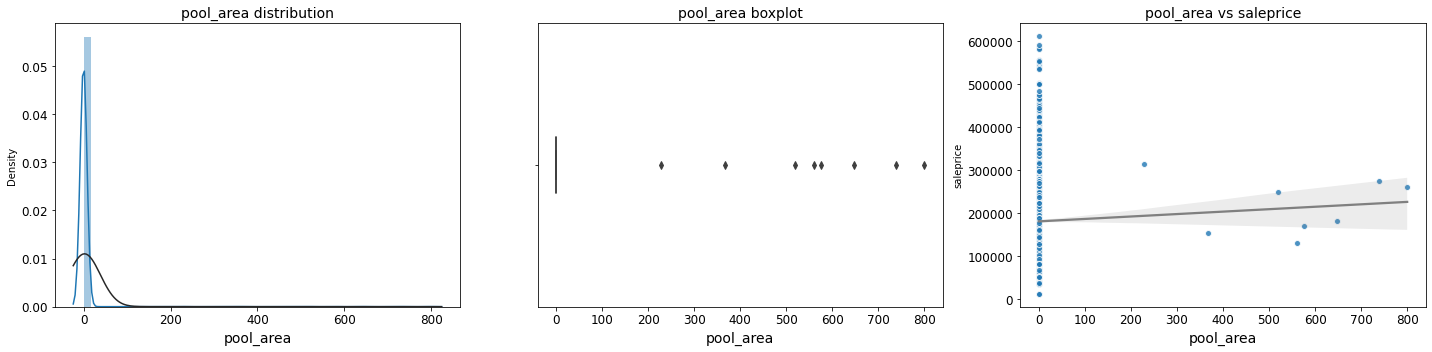

In [237]:
numeric_col_plots(train, ['pool_area'])

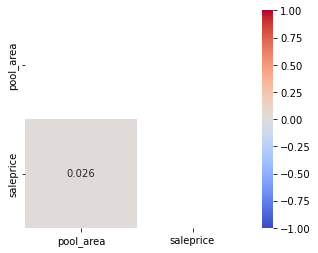

In [238]:
heatmap_small(train, ['pool_area', 'saleprice'])

In [239]:
train['pool_area'].value_counts()

0      2036
519       1
576       1
800       1
228       1
648       1
738       1
368       1
561       1
Name: pool_area, dtype: int64

Only 8 houses have pools. This feature also shows very poor correlation with `saleprice`. We could try to convert this feature to a pool presence feature, where {'Yes': 1} and {'No': 0}, and see how that correlates with `saleprice`.

In [240]:
# if got pool, 1
# if no pool, 0
train['got_pool'] = train['pool_area'].apply(lambda x: 1 if x > 0 else 0)

In [241]:
train['got_pool'].value_counts()

0    2036
1       8
Name: got_pool, dtype: int64

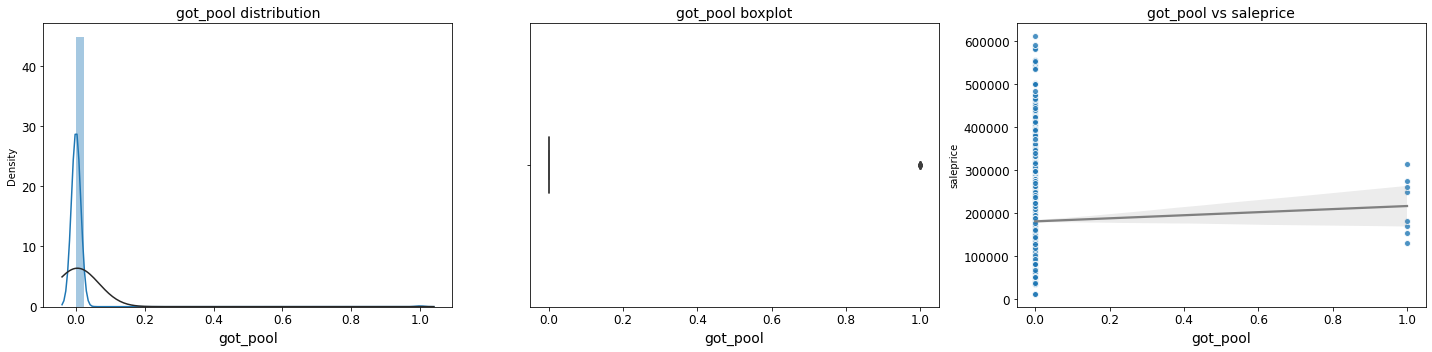

In [242]:
numeric_col_plots(train, ['got_pool'])

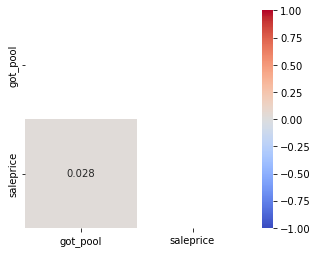

In [243]:
heatmap_small(train, ['got_pool', 'saleprice'])

Still a very poor correlation with `saleprice`. This is most likely due to the overwhelming lack of houses with pools. We will not include this feature in our model.

In [244]:
drop_col(train, ['pool_area', 'got_pool'])

### `pool_qc`

**`pool_qc`** (object, ordinal): Pool quality. 2036 null values, which belong to all the houses without pools. We will be dropping this column as there are just too little values to make much of a difference.

In [245]:
train['pool_qc'].isnull().sum()

2036

In [246]:
drop_col(train, ['pool_qc'])

### `fence`

**`fence`** (object, ordinal): Fence quality. 1651 null values. Lets explore the correlation of each value in this column first.

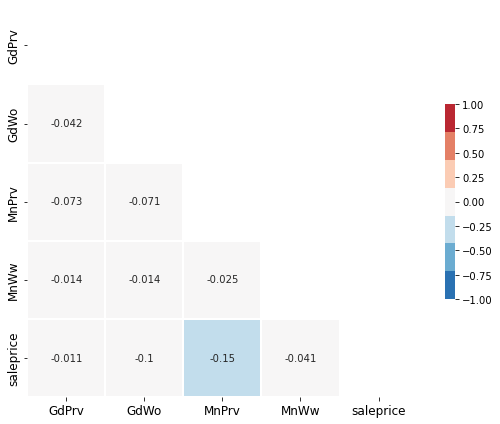

In [247]:
heatmap_all_cols(dummify(train, 'fence'), width = 8, height = 6)

Poor correlation for every value. Lets convert it to ordinal numeric.

In [248]:
fence_dict = {'GdPrv': 4,
              'MnPrv': 3,
              'GdWo': 2,
              'MnWw': 1,
              'None': 0}

to_ordinal_numeric(train, 'fence', fence_dict)
fill_null_w_zero(train, ['fence'])

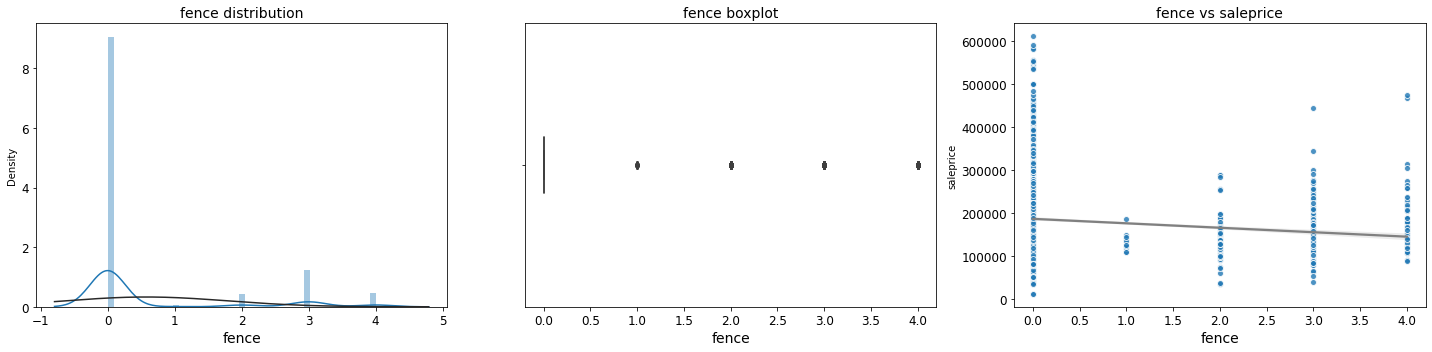

In [249]:
numeric_col_plots(train, ['fence'])

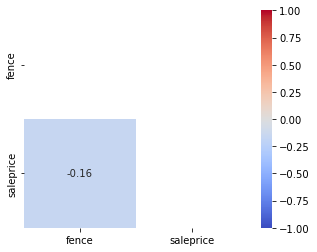

In [250]:
heatmap_small(train, ['fence', 'saleprice'])

Fence quality has a negative correlation with sale price, but from the plots above, we can see it is mainly due to the majority of houses not having any fences, and these houses together made up a higher median price than houses with fences. This feature is thus a poor variable to include in our model as it gives an inaccurate correlation of fences and sale price.

In [251]:
drop_col(train, ['fence'])

### `misc_feature`

**`misc_feature`** (object, nominal): Miscellaneous feature not covered in other categories.

In [252]:
train['misc_feature'].isnull().sum()

1981

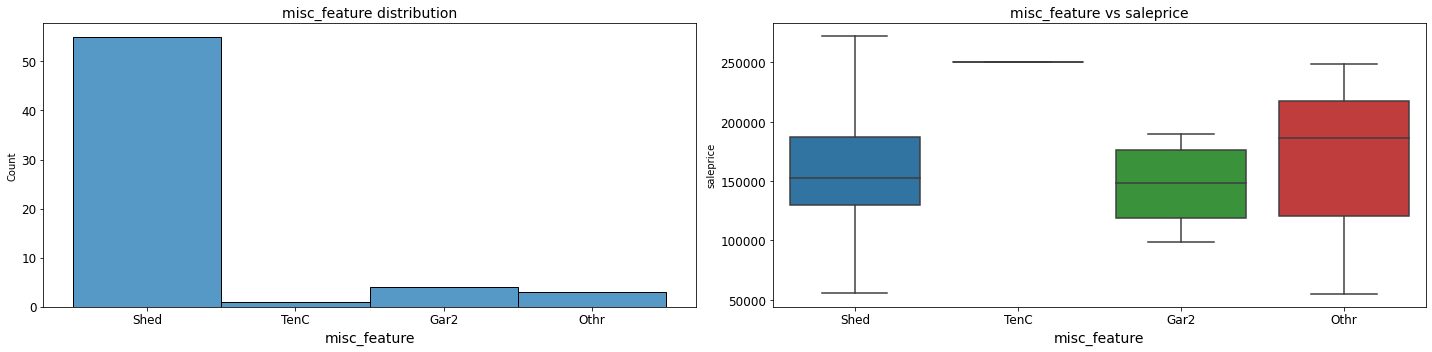

In [253]:
categorical_col_plots(train, ['misc_feature'])

There are 1986 null values (96.8% nulls). The information for this feature is very vague, with very little values. Thus we will convert this column to indicate the presence of miscellaneous features. The values will be {yes: 1}, or {no: 0}. We will then check the correlation to sale price and see if this feature is worth it to include into our model or not. We hope to expect a rise in value if there are miscellaneous features.

In [254]:
misc_feature_dict = {'Shed': 1,
                     'Gar2': 1,
                     'Othr': 1,
                     'TenC': 1}

to_ordinal_numeric(train, 'misc_feature', misc_feature_dict)
fill_null_w_zero(train, ['misc_feature'])

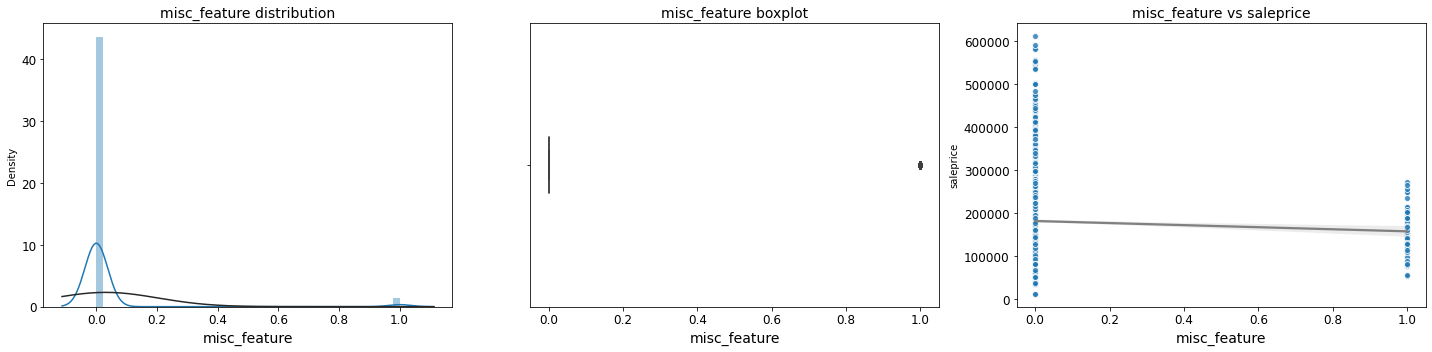

In [255]:
numeric_col_plots(train, ['misc_feature'])

Seems like the number of houses with miscellaneous features are so little that they cannot give enough impact to correlate positively with sale price. Thus, this feature is not useful to our model and we will drop it.

In [256]:
drop_col(train, ['misc_feature'])

### `misc_val`

**`misc_val`** (int64, continuous): Value of miscellaneous feature.

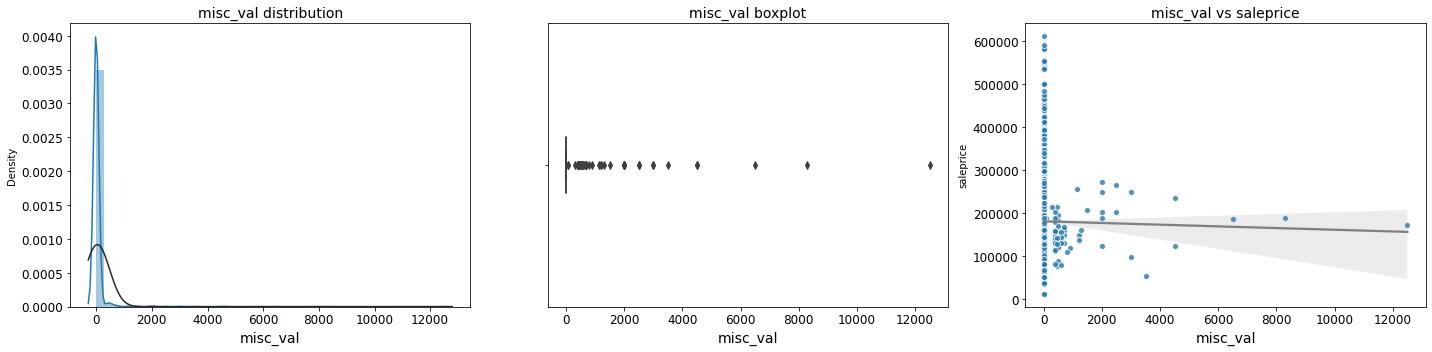

In [257]:
numeric_col_plots(train, ['misc_val'])

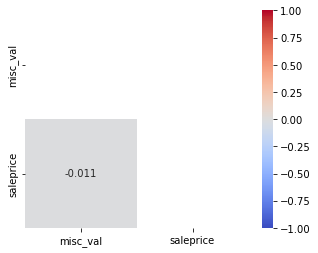

In [258]:
heatmap_small(train, ['misc_val', 'saleprice'])

With so little houses with misc features, this column is much too vague, showing no correlation with sale price. We will be dropping this column.

In [259]:
drop_col(train, ['misc_val'])

## Date Features

- `year_built`
- `year_remod/add`
- `mo_sold`
- `yr_sold`

### `year_built` and `yr_sold`

**`year_built`** (int64, discrete): Original construction date.

**`yr_sold`** (int64, discrete): Year Sold (YYYY).

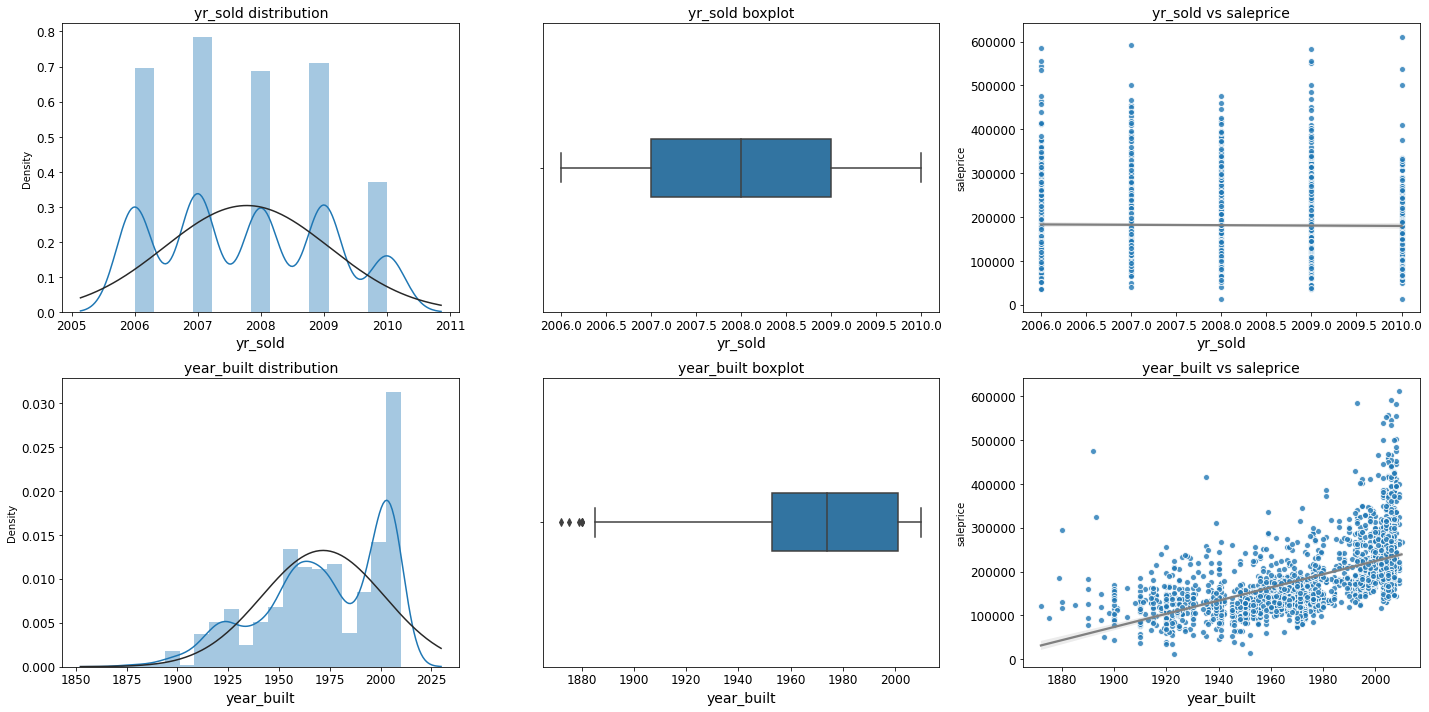

In [260]:
numeric_col_plots(train, ['year_built', 'yr_sold'])

`year_built`: The plots for this column shows a trend where the newer the houses, the more expensive it is. The construction date has a linear relationship with sale price.

`yr_sold`: Almost 0 correlation with sale price during these 5 years (2006 to 2010) the houses were sold.

With these 2 features, we can find out the age of the house when it was sold, make a new column and explore the correlation with sale price. We will call this column `age_sold`.

In [261]:
# reset the dataframes index
train.reset_index(drop=True, inplace=True)

In [262]:
# age_sold = yr_sold - year_built
for index, val in enumerate(train['year_built']):
    train.loc[index, 'age_sold'] = train.loc[index, 'yr_sold'] - val
    
pd.DataFrame(train['age_sold'].value_counts()).sort_index()

age_sold
0.0          79
1.0         154
2.0          62
3.0          44
4.0          57
...         ...
127.0         1
128.0         2
129.0         1
135.0         1
136.0         1

[122 rows x 1 columns]

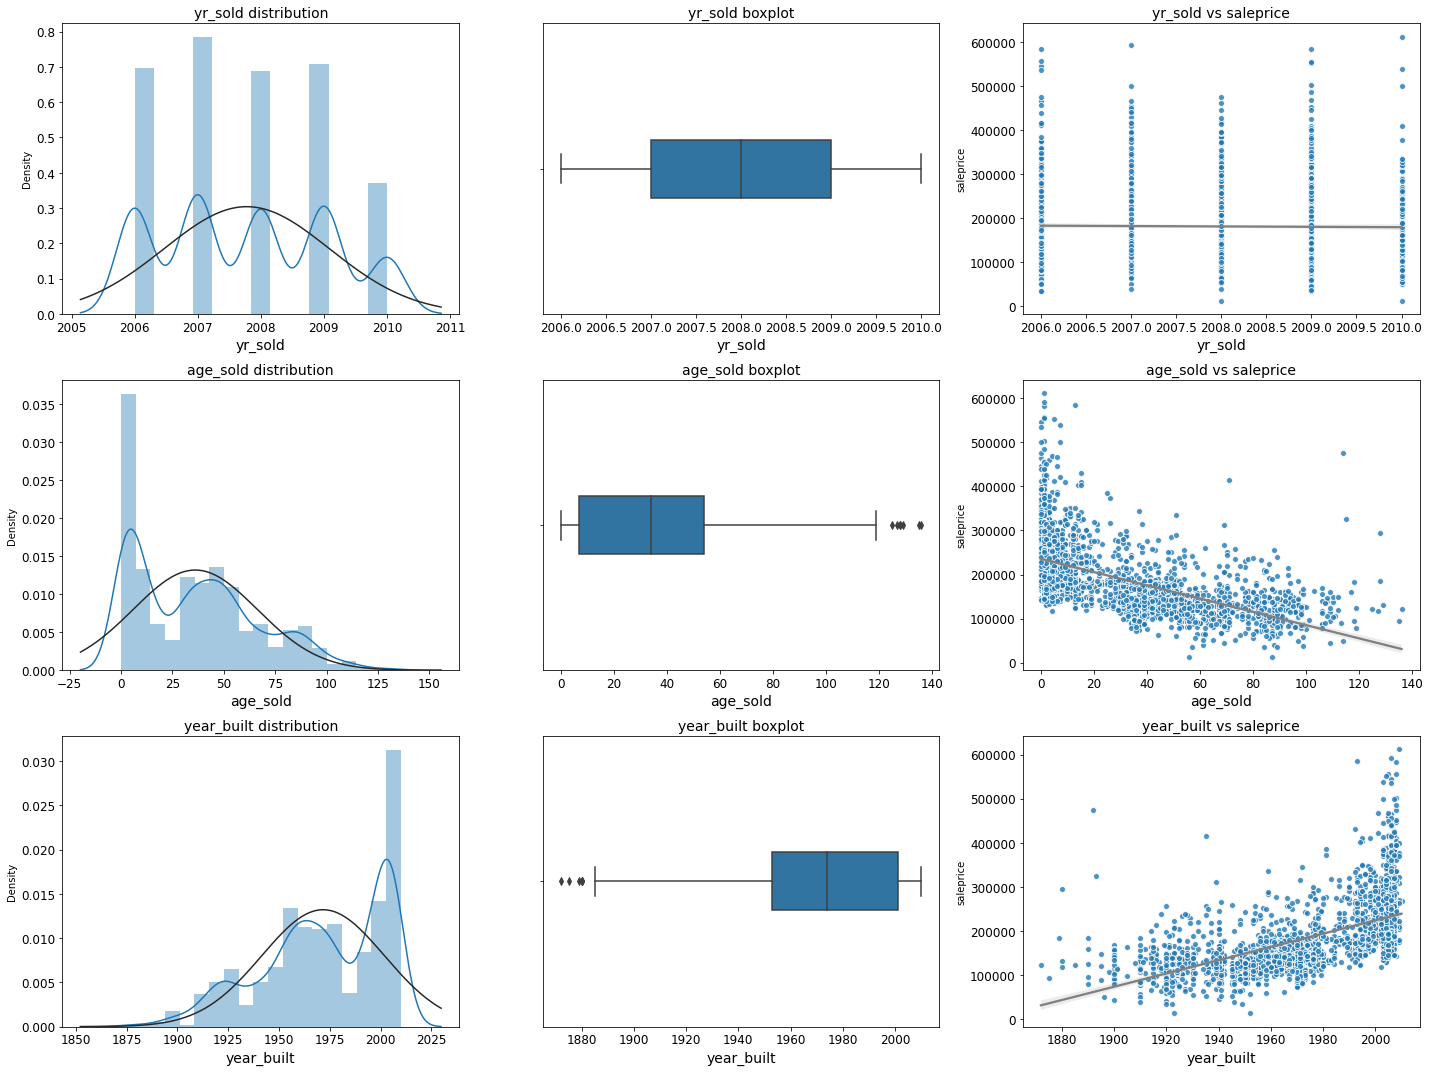

In [263]:
numeric_col_plots(train, ['year_built', 'yr_sold', 'age_sold'])

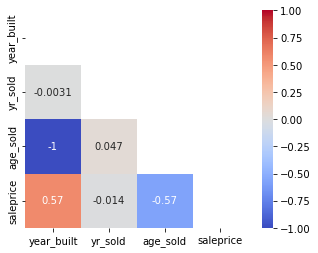

In [264]:
heatmap_small(train, ['year_built', 'yr_sold', 'age_sold', 'saleprice'])

`age_sold` has a strong negative correlation with `saleprice`, which makes sense, where the older the house, the lesser it was sold for. `age_sold` and `year_built` are opposite collinear with each other, as this dataset only contains the sales for 5 years. But for a more accurate representation of data, we choose to use `age_sold`, and drop `year_built` and `yr_sold`.

### `mo_sold`

**`mo_sold`** (int64, discrete): Month Sold (MM).

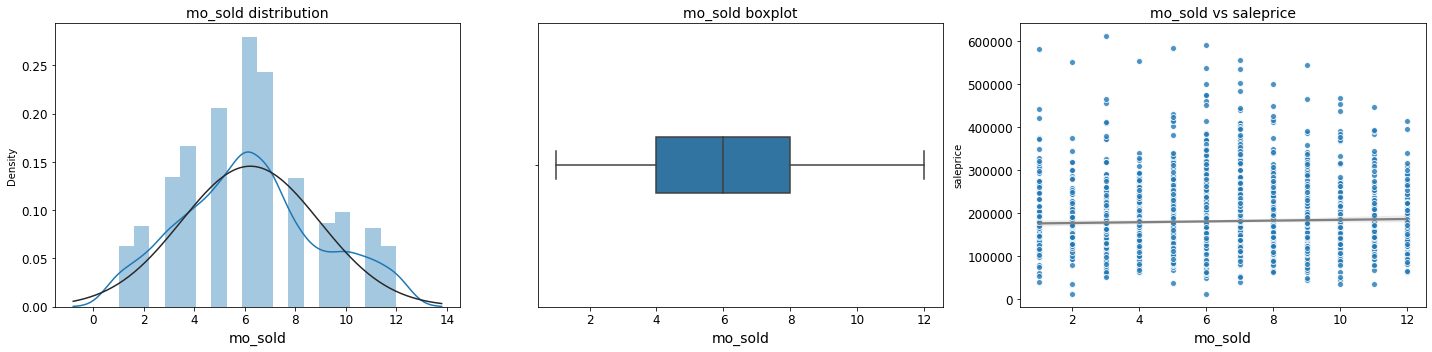

In [265]:
numeric_col_plots(train, ['mo_sold'])

It seems like sales mostly happen in the middle of the year. However, when compared to sale price, there does not seem to have any trend of how selling houses at different months would net a higher sale price. We could convert this to a proper date format with the year column that we have for deeper analysis, but we feel that it is not necessary. Previously, we already know that this dataset only contains sales for 5 years, and that there is no correlation with sale price within these 5 years. With no differentiation looking at each year, it does not make sense to still zoom in to each specific month. Thus we will not be using this column in our model.

In [266]:
drop_col(train, ['mo_sold'])

### `year_remod/add`

**`year_remod/add`** (int64, discrete): Remodel date (same as construction date if no remodeling or additions).

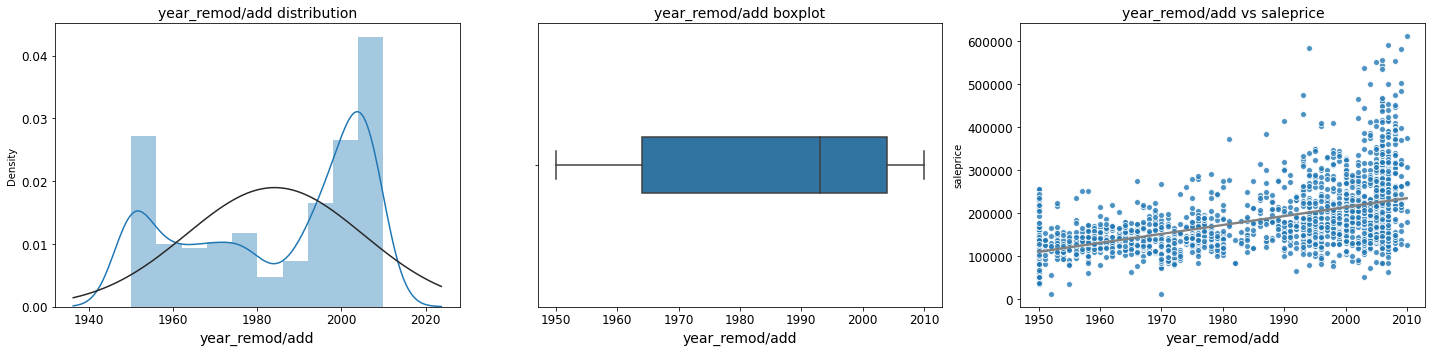

In [267]:
numeric_col_plots(train, ['year_remod/add'])

The distribution for this column shows a somewhat bimodal shape. There are many values at 1950, which we suspect it might be because some of these houses were actually remodeled before 1950, but for some reason, 1950 was set as a cutoff year for the data in this column.

Furthermore, we suspect that if a house is not remodeled, it might share the same values as `year_built`, thus double counting the values. In order to still retain information for this, we will create a new column that states if the houses were remodeled or not, and explore that correlation with sale price.

In [268]:
# creating a new column to check if year_remod/add and year_built share the same values
# remod done = 1, no remod = 0
for index, val in enumerate(train['year_remod/add']):
    if val != train.loc[index, 'year_built']:
        train.loc[index, 'remod_done'] = 1           # remod done, year values are different
    else:
        train.loc[index, 'remod_done'] = 0           # no remod, year values are same

In [269]:
train['remod_done'].value_counts()

0.0    1099
1.0     945
Name: remod_done, dtype: int64

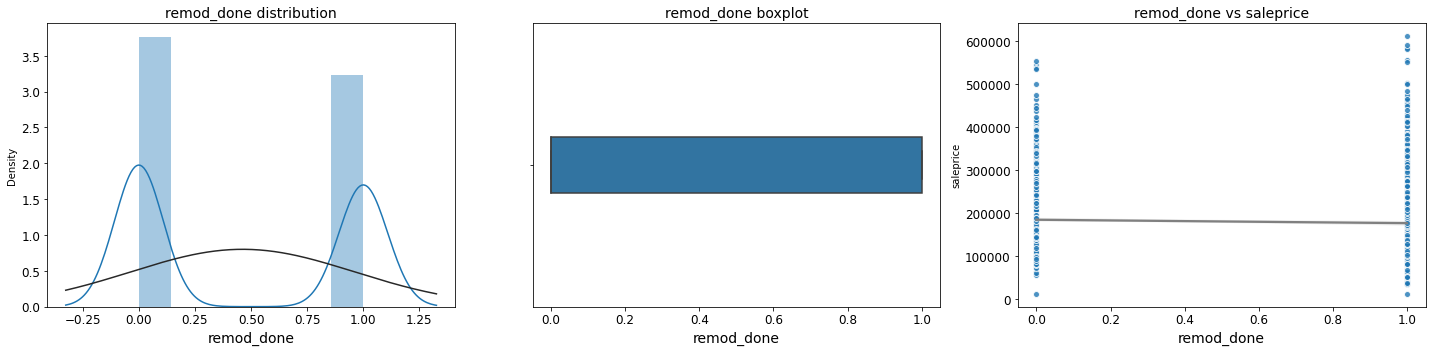

In [270]:
numeric_col_plots(train, ['remod_done'])

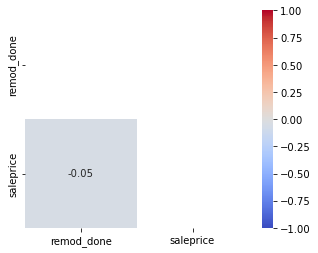

In [271]:
heatmap_small(train, ['remod_done', 'saleprice'])

About 46% of houses had remodeling done. As suspected, those with no modeling done to their houses have the same year values for both `year_built` and `year_remod/add` columns, making `year_remod/add` a poor variable to include in our model. Even after creating a new column `remod_done`, it is still a poor variable for our model due to poor correlation with sale price. Thus, we will exclude all these columns.

In [272]:
drop_col(train, ['year_remod/add', 'remod_done'])

In [273]:
# dropping now cause year_remod/add had to use year_built
drop_col(train, ['year_built', 'yr_sold'])

## Sale Price and Type

- `sale_type`
- `saleprice` (analysed and log transformed for a more normal distribution at the beginning)

### `sale_type`

**`sale_type`** (object, nominal): Type of sale. We will check each value of the column, and their correlation with `saleprice`.

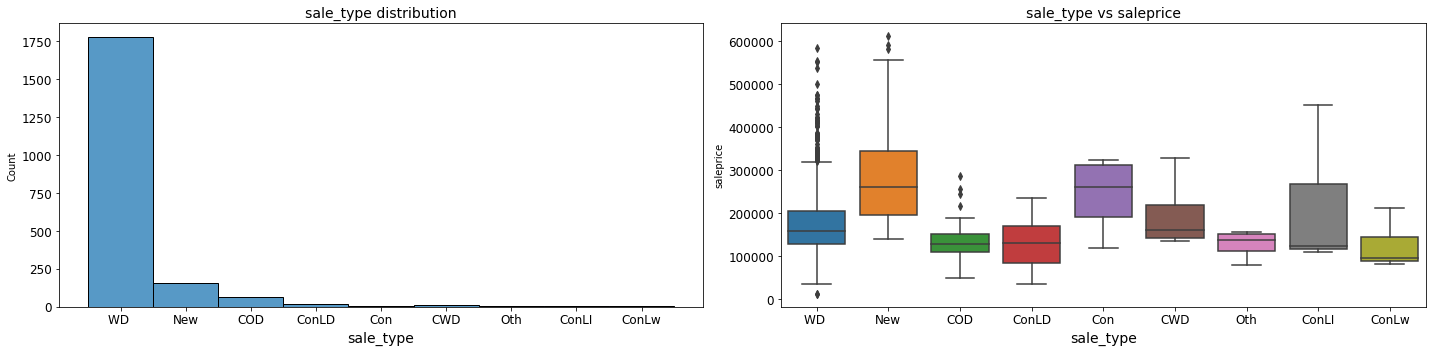

In [274]:
categorical_col_plots(train, ['sale_type'])

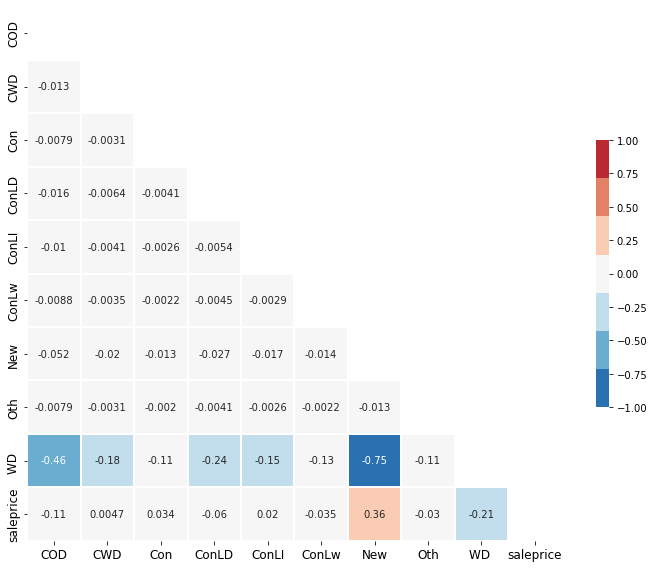

In [275]:
heatmap_all_cols(dummify(train, 'sale_type'), width = 10, height = 8)

Most of the values do not have a strong correlation with `saleprice`. We will not include this in our model.

In [276]:
drop_col(train, ['sale_type'])

## Checking for Collinearity

Some features can be dropped as they are collinear with others.

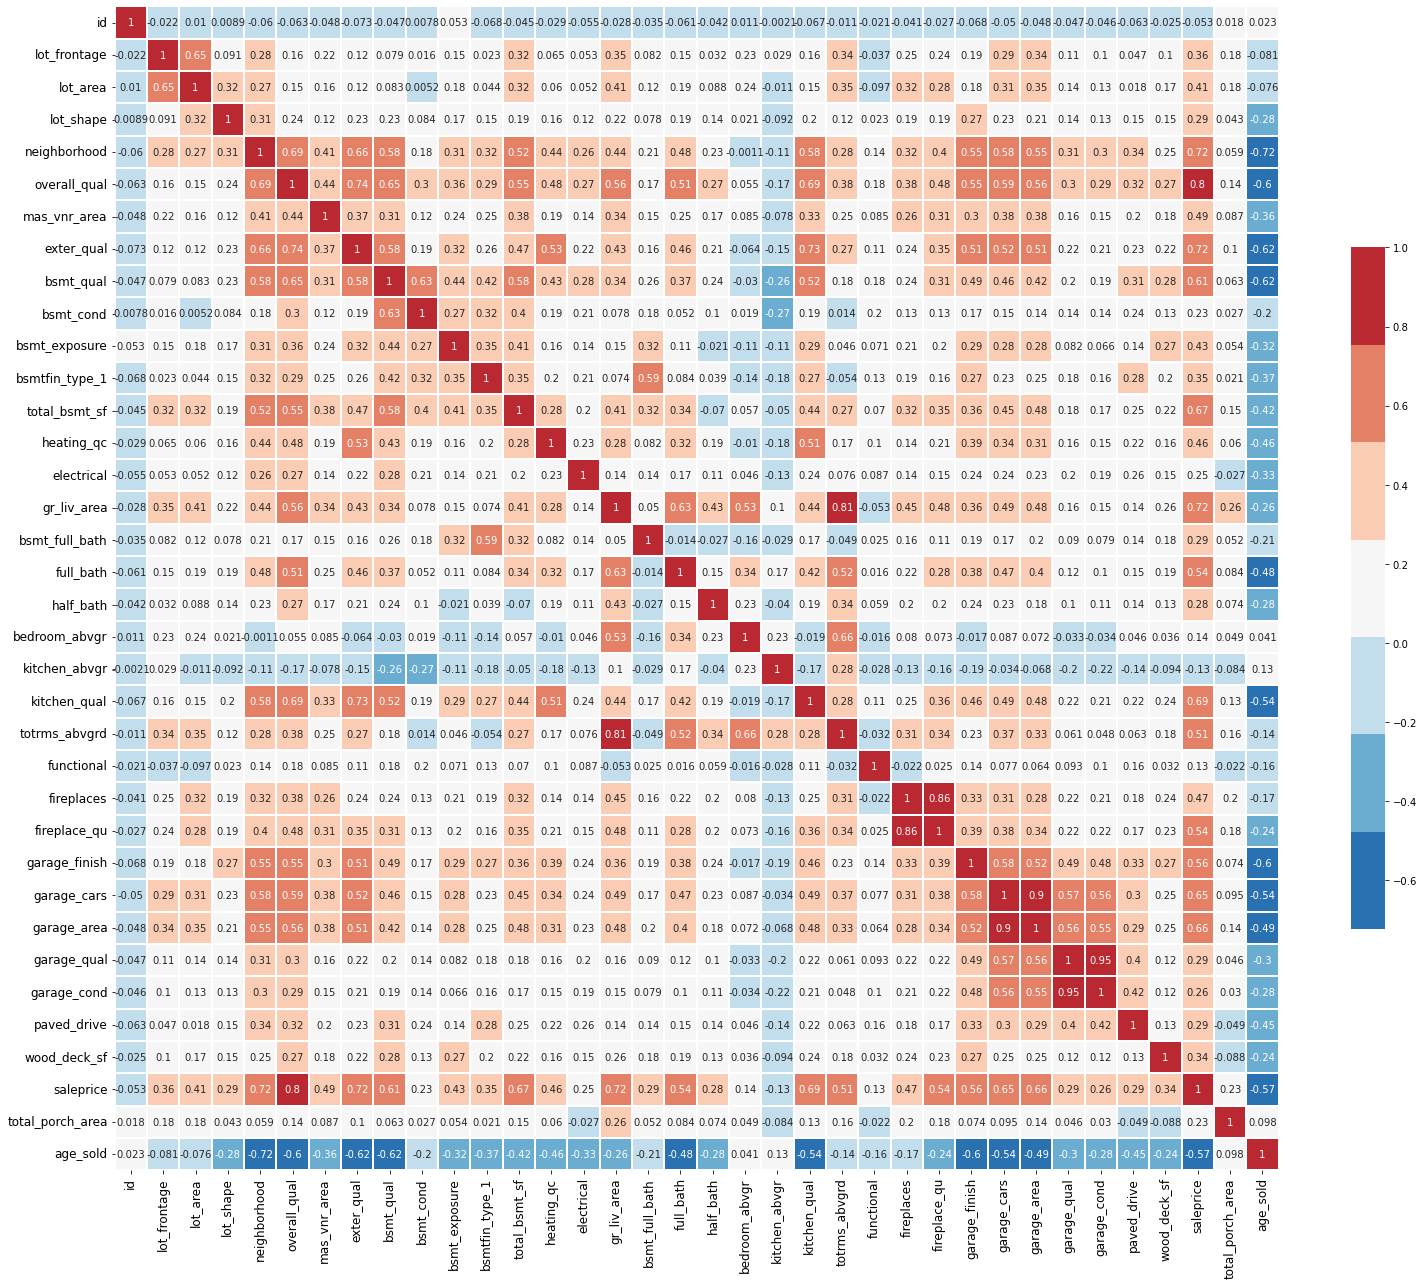

In [277]:
# heatmap to show correlation between numerical features
# most importantly is the correlation of these features with saleprice
mask = np.zeros_like(train.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(22, 20))
sns.heatmap(train.corr(),
            mask = mask,
            square=True,
            linewidth=0.1,
            cbar_kws = {'shrink':0.5},
            cmap=sns.color_palette("RdBu_r", 7),
            annot = True)
ax.tick_params(labelsize=12)
plt.tight_layout()

From this correlation heatmap, we can see some collinearity of some columns:
- `totrms_abvgrd` collinear with `gr_liv_area`
- `garage_cars` collinear with `garage_area`
- `garage_cond` collinear with `garage_qual`

`fireplaces` and `fireplace_qu` may seem collinear too, but they measure very different things, so we will keep them.

Thus we will be dropping `totrms_abvgrd`, `garage_cars` and `garage_cond`.

In [278]:
drop_col(train, ['totrms_abvgrd', 'garage_cars', 'garage_cond'])

## Final Dataframe

This is what our cleaned training dataset would look like.

In [279]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044 entries, 0 to 2043
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2044 non-null   int64  
 1   lot_frontage      2044 non-null   float64
 2   lot_area          2044 non-null   int64  
 3   lot_shape         2044 non-null   int64  
 4   neighborhood      2044 non-null   int64  
 5   overall_qual      2044 non-null   int64  
 6   mas_vnr_area      2044 non-null   float64
 7   exter_qual        2044 non-null   int64  
 8   foundation        2044 non-null   object 
 9   bsmt_qual         2044 non-null   float64
 10  bsmt_cond         2044 non-null   float64
 11  bsmt_exposure     2044 non-null   float64
 12  bsmtfin_type_1    2044 non-null   float64
 13  total_bsmt_sf     2044 non-null   float64
 14  heating_qc        2044 non-null   int64  
 15  electrical        2044 non-null   int64  
 16  gr_liv_area       2044 non-null   int64  


In [280]:
train.describe().T

count           mean           std      min        25%  \
id                2044.0    1472.585616    844.808260      1.0     751.75   
lot_frontage      2044.0      68.797072     19.885482     24.0      58.00   
lot_area          2044.0    9612.018591   3702.426047   2304.0    7500.00   
lot_shape         2044.0       0.399706      0.560766      0.0       0.00   
neighborhood      2044.0      13.036204      7.428475      0.0       6.00   
overall_qual      2044.0       6.107143      1.423104      1.0       5.00   
mas_vnr_area      2044.0      77.405577    112.922159      0.0       0.00   
exter_qual        2044.0       3.404599      0.586350      2.0       3.00   
bsmt_qual         2044.0       3.487280      0.901586      0.0       3.00   
bsmt_cond         2044.0       2.929061      0.572973      0.0       3.00   
bsmt_exposure     2044.0       1.622309      1.073515      0.0       1.00   
bsmtfin_type_1    2044.0       3.558708      2.125752      0.0       1.00   
total_bsmt_sf     2044.0    1052.729452    426.899353      0.0     793.00   
heating_qc        2044.0       4.158023      0.964357      1.0       3.00   
electrical        2044.0       3.885029      0.403109      0.0       4.00   
gr_liv_area       2044.0    1494.640900    485.831450    334.0    1128.00   
bsmt_full_bath    2044.0       0.425147      0.520527      0.0       0.00   
full_bath         2044.0       1.575832      0.549661      0.0       1.00   
half_bath         2044.0       0.370841      0.501052      0.0       0.00   
bedroom_abvgr     2044.0       2.842955      0.826799      0.0       2.00   
kitchen_abvgr     2044.0       1.043053      0.210134      0.0       1.00   
kitchen_qual      2044.0       3.515166      0.664655      2.0       3.00   
functional        2044.0       6.842466      0.684517      0.0       7.00   
fireplaces        2044.0       0.587084      0.634888      0.0       0.00   
fireplace_qu      2044.0       1.757828      1.807301      0.0       0.00   
garage_finish     2044.0       1.720646      0.898546      0.0       1.00   
garage_area       2044.0     472.464775    214.860358      0.0     319.00   
garage_qual       2044.0       2.802348      0.722395      0.0       3.00   
paved_drive       2044.0       1.833170      0.535619      0.0       2.00   
wood_deck_sf      2044.0      90.176614    114.883284      0.0       0.00   
saleprice         2044.0  181312.381605  79298.132064  12789.0  129500.00   
total_porch_area  2044.0      86.717710     96.235166      0.0       0.00   
age_sold          2044.0      36.106164     30.232805      0.0       7.00   

                           50%        75%       max  
id                  1479.50000    2199.25    2930.0  
lot_frontage          68.79227      80.00     117.0  
lot_area            9400.00000   11494.00   19950.0  
lot_shape              0.00000       1.00       3.0  
neighborhood          12.00000      18.00      27.0  
overall_qual           6.00000       7.00      10.0  
mas_vnr_area           0.00000     157.25     309.0  
exter_qual             3.00000       4.00       5.0  
bsmt_qual              4.00000       4.00       5.0  
bsmt_cond              3.00000       3.00       5.0  
bsmt_exposure          1.00000       2.00       4.0  
bsmtfin_type_1         4.00000       6.00       6.0  
total_bsmt_sf        994.00000    1316.25    3206.0  
heating_qc             5.00000       5.00       5.0  
electrical             4.00000       4.00       4.0  
gr_liv_area         1442.00000    1728.00    3820.0  
bsmt_full_bath         0.00000       1.00       3.0  
full_bath              2.00000       2.00       4.0  
half_bath              0.00000       1.00       2.0  
bedroom_abvgr          3.00000       3.00       8.0  
kitchen_abvgr          1.00000       1.00       3.0  
kitchen_qual           3.00000       4.00       5.0  
functional             7.00000       7.00       7.0  
fireplaces             1.00000       1.00       4.0  
fireplace_qu           1.00000       4.00       5.

For the next notebook, we will be building a function that will conveniently preprocess and engineer features that we have explored in this notebook.